## Logistic Regression Summary

Logistic Regression is a classification algorithm that predicts discrete classes based on input features.  
It applies a linear equation to compute a value (*z*), which is then mapped to a probability using the **sigmoid function**.

The sigmoid function outputs values between **0 and 1**, representing the probability of belonging to class 1.  
A threshold (typically **0.5**) is used as the **decision boundary**:

- **p ≥ 0.5** → Class **1**  
- **p < 0.5** → Class **0**  

This probability-based approach helps classify observations confidently, depending on how close *p* is to **1 or 0**.

## Problem Statement:
In this project, I implement Logistic Regression with Python and Scikit-Learn. I build a classifier to predict whether or not it will rain tomorrow in Australia by training a binary classification model using Logistic Regression. I have used the **Rain in Australia** dataset downloaded from the Kaggle website for this project.

## Import Libraries and read dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings

warnings.filterwarnings('ignore')

In [4]:
data = 'weatherAUS.csv'

df = pd.read_csv(data)

In [5]:
# view dimensions of dataset

df.shape

(145460, 23)

We can see that there are 142193 instances and 24 variables in the data set.

In [5]:
# preview the dataset

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [6]:
col_names = df.columns

col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [6]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## **Dataset Insights**  

### **1. Dataset Size & Structure**  
- The dataset contains **145,460 rows** and **23 columns**.  
- It includes both numerical (**16 float64**) and categorical (**7 object**) features.  

### **2. Target Variable**  
- The column **'RainTomorrow'** is the target variable, indicating whether it will rain the next day (**binary classification: 'Yes' or 'No'**).  
- The feature **'RainToday'** could be useful as a predictor for **'RainTomorrow'**.  

### **3. Missing Values**  
- Several columns contain missing values, with **Evaporation (43%), Sunshine (48%), Cloud9am (38%), and Cloud3pm (41%)** having significant gaps.  
- **Pressure9am (10%) and Pressure3pm (10%)** also have a notable number of missing values.  
- Categorical variables like **WindGustDir (7%) and WindDir9am (7%)** also have missing entries.  

### **4. Categorical Variables**  
- The dataset has **7 categorical columns**: **Date, Location, WindGustDir, WindDir9am, WindDir3pm, RainToday, RainTomorrow**.  
- These need to be encoded (e.g., **one-hot encoding** or **label encoding**) before using models like logistic regression.  

### **5. Potentially Important Features**  
- **Temperature (MinTemp, MaxTemp, Temp9am, Temp3pm)** – Could influence rainfall patterns.  
- **Humidity (Humidity9am, Humidity3pm)** – Likely to have a strong impact on precipitation.  
- **Wind Speed & Direction (WindGustDir, WindSpeed9am, WindSpeed3pm)** – May contribute to weather patterns.  
- **Pressure (Pressure9am, Pressure3pm)** – Changes in pressure can indicate weather shifts.  


### Types of variables


In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type float64.


First of all, I will find categorical variables.

In [7]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [8]:
# view the categorical variables

df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


### Summary of categorical variables


- There is a date variable. It is denoted by `Date` column.


- There are 6 categorical variables. These are given by `Location`, `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday` and  `RainTomorrow`.


- There are two binary categorical variables - `RainToday` and  `RainTomorrow`.


- `RainTomorrow` is the target variable.

## Explore problems within categorical variables


First, I will explore the categorical variables.


### Missing values in categorical variables

In [9]:
# check missing values in categorical variables

df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [10]:
# print categorical variables containing missing values

cat1 = [var for var in categorical if df[var].isnull().sum()!=0]

print(df[cat1].isnull().sum())

WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64


We can see that there are only 4 categorical variables in the dataset which contains missing values. These are `WindGustDir`, `WindDir9am`, `WindDir3pm` and `RainToday`.

### Frequency counts of categorical variables


Now, I will check the frequency counts of categorical variables.

In [11]:
# view frequency of categorical variables

for var in categorical: 
    
    print(df[var].value_counts())

Date
2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: count, Length: 3436, dtype: int64
Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAA

In [14]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(df[var].value_counts()/float(len(df)))

Date
2013-11-12    0.000337
2014-09-01    0.000337
2014-08-23    0.000337
2014-08-24    0.000337
2014-08-25    0.000337
                ...   
2007-11-29    0.000007
2007-11-28    0.000007
2007-11-27    0.000007
2007-11-26    0.000007
2008-01-31    0.000007
Name: count, Length: 3436, dtype: float64
Location
Canberra            0.023622
Sydney              0.022989
Darwin              0.021951
Melbourne           0.021951
Brisbane            0.021951
Adelaide            0.021951
Perth               0.021951
Hobart              0.021951
Albany              0.020899
MountGambier        0.020899
Ballarat            0.020899
Townsville          0.020899
GoldCoast           0.020899
Cairns              0.020899
Launceston          0.020899
AliceSprings        0.020899
Bendigo             0.020899
Albury              0.020899
MountGinini         0.020899
Wollongong          0.020899
Newcastle           0.020892
Tuggeranong         0.020892
Penrith             0.020892
Woomera             0.02

### Number of labels: cardinality


The number of labels within a categorical variable is known as **cardinality**. A high number of labels within a variable is known as **high cardinality**. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [16]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  3  labels


We can see that there is a `Date` variable which needs to be preprocessed. I will do preprocessing in the following section.


All the other variables contain relatively smaller number of variables.

### Feature Engineering of Date Variable

In [17]:
df['Date'].dtypes

dtype('O')

We can see that the data type of `Date` variable is object. I will parse the date currently coded as object into datetime format.

In [18]:
# parse the dates, currently coded as strings, into datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [19]:
# extract year from date

df['Year'] = df['Date'].dt.year

df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int32

In [20]:
# extract month from date

df['Month'] = df['Date'].dt.month

df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int32

In [21]:
# extract day from date

df['Day'] = df['Date'].dt.day

df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int32

In [22]:
# again view the summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

We can see that there are three additional columns created from `Date` variable. Now, I will drop the original `Date` variable from the dataset.

In [23]:
# drop the original Date variable

df.drop('Date', axis=1, inplace = True)

In [24]:
# preview the dataset again

df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


Now, we can see that the `Date` variable has been removed from the dataset.


### Explore Categorical Variables


Now, I will explore the categorical variables one by one. 

In [25]:
# find categorical variables

categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


We can see that there are 6 categorical variables in the dataset. The `Date` variable has been removed. First, I will check missing values in categorical variables.

In [26]:
# check for missing values in categorical variables 

df[categorical].isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

We can see that `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday` variables contain missing values. I will explore these variables one by one.

### Explore `Location` variable

In [27]:
# print number of labels in Location variable

print('Location contains', len(df.Location.unique()), 'labels')

Location contains 49 labels


In [28]:
# check labels in location variable

df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [29]:
# check frequency distribution of values in Location variable

df.Location.value_counts()

Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown     

In [30]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding 
# preview the dataset with head() method

pd.get_dummies(df.Location, drop_first=True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Explore `WindGustDir` variable

In [31]:
# print number of labels in WindGustDir variable

print('WindGustDir contains', len(df['WindGustDir'].unique()), 'labels')

WindGustDir contains 17 labels


In [32]:
# check labels in WindGustDir variable

df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [33]:
# check frequency distribution of values in WindGustDir variable

df.WindGustDir.value_counts()

WindGustDir
W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: count, dtype: int64

In [34]:
# let's do One Hot Encoding of WindGustDir variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [35]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)

ENE     8104
ESE     7372
N       9313
NE      7133
NNE     6548
NNW     6620
NW      8122
S       9168
SE      9418
SSE     9216
SSW     8736
SW      8967
W       9915
WNW     8252
WSW     9069
NaN    10326
dtype: int64

We can see that there are 9330 missing values in WindGustDir variable.

### Explore `WindDir9am` variable

In [36]:
# print number of labels in WindDir9am variable

print('WindDir9am contains', len(df['WindDir9am'].unique()), 'labels')

WindDir9am contains 17 labels


In [37]:
# check labels in WindDir9am variable

df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [38]:
# check frequency distribution of values in WindDir9am variable

df['WindDir9am'].value_counts()

WindDir9am
N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: count, dtype: int64

In [39]:
# let's do One Hot Encoding of WindDir9am variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [40]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7836
ESE     7630
N      11758
NE      7671
NNE     8129
NNW     7980
NW      8749
S       8659
SE      9287
SSE     9112
SSW     7587
SW      8423
W       8459
WNW     7414
WSW     7024
NaN    10566
dtype: int64

We can see that there are 10013 missing values in the `WindDir9am` variable.

### Explore `WindDir3pm` variable

In [41]:
# print number of labels in WindDir3pm variable

print('WindDir3pm contains', len(df['WindDir3pm'].unique()), 'labels')

WindDir3pm contains 17 labels


In [42]:
# check labels in WindDir3pm variable

df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [43]:
# check frequency distribution of values in WindDir3pm variable

df['WindDir3pm'].value_counts()

WindDir3pm
SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: count, dtype: int64

In [44]:
# let's do One Hot Encoding of WindDir3pm variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [45]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7857
ESE     8505
N       8890
NE      8263
NNE     6590
NNW     7870
NW      8610
S       9926
SE     10838
SSE     9399
SSW     8156
SW      9354
W      10110
WNW     8874
WSW     9518
NaN     4228
dtype: int64

There are 3778 missing values in the `WindDir3pm` variable.

### Explore `RainToday` variable

In [46]:
# print number of labels in RainToday variable

print('RainToday contains', len(df['RainToday'].unique()), 'labels')

RainToday contains 3 labels


In [47]:
# check labels in WindGustDir variable

df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [48]:
# check frequency distribution of values in WindGustDir variable

df.RainToday.value_counts()

RainToday
No     110319
Yes     31880
Name: count, dtype: int64

In [49]:
# let's do One Hot Encoding of RainToday variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).head()

,Yes,NaN
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


In [50]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category

pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).sum(axis=0)

Yes    31880
NaN     3261
dtype: int64

There are 1406 missing values in the `RainToday` variable.

### Explore Numerical Variables

In [51]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [52]:
# view the numerical variables

df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


### Summary of numerical variables


- There are 16 numerical variables. 


- These are given by `MinTemp`, `MaxTemp`, `Rainfall`, `Evaporation`, `Sunshine`, `WindGustSpeed`, `WindSpeed9am`, `WindSpeed3pm`, `Humidity9am`, `Humidity3pm`, `Pressure9am`, `Pressure3pm`, `Cloud9am`, `Cloud3pm`, `Temp9am` and `Temp3pm`.


- All of the numerical variables are of continuous type.

## Explore problems within numerical variables


Now, I will explore the numerical variables.


### Missing values in numerical variables

In [53]:
# check missing values in numerical variables

df[numerical].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Year                 0
Month                0
Day                  0
dtype: int64

We can see that all the 16 numerical variables contain missing values.

### Outliers in numerical variables

In [54]:
# view summary statistics in numerical variables

print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  143975.0  144199.0  142199.0      82670.0   75625.0       135197.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      143693.0      142398.0     142806.0     140953.0     130395.0   
mean           14.0          19.0         69.0         52.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

On closer inspection, we can see that the `Rainfall`, `Evaporation`, `WindSpeed9am` and `WindSpeed3pm` columns may contain outliers.


I will draw boxplots to visualise outliers in the above variables. 

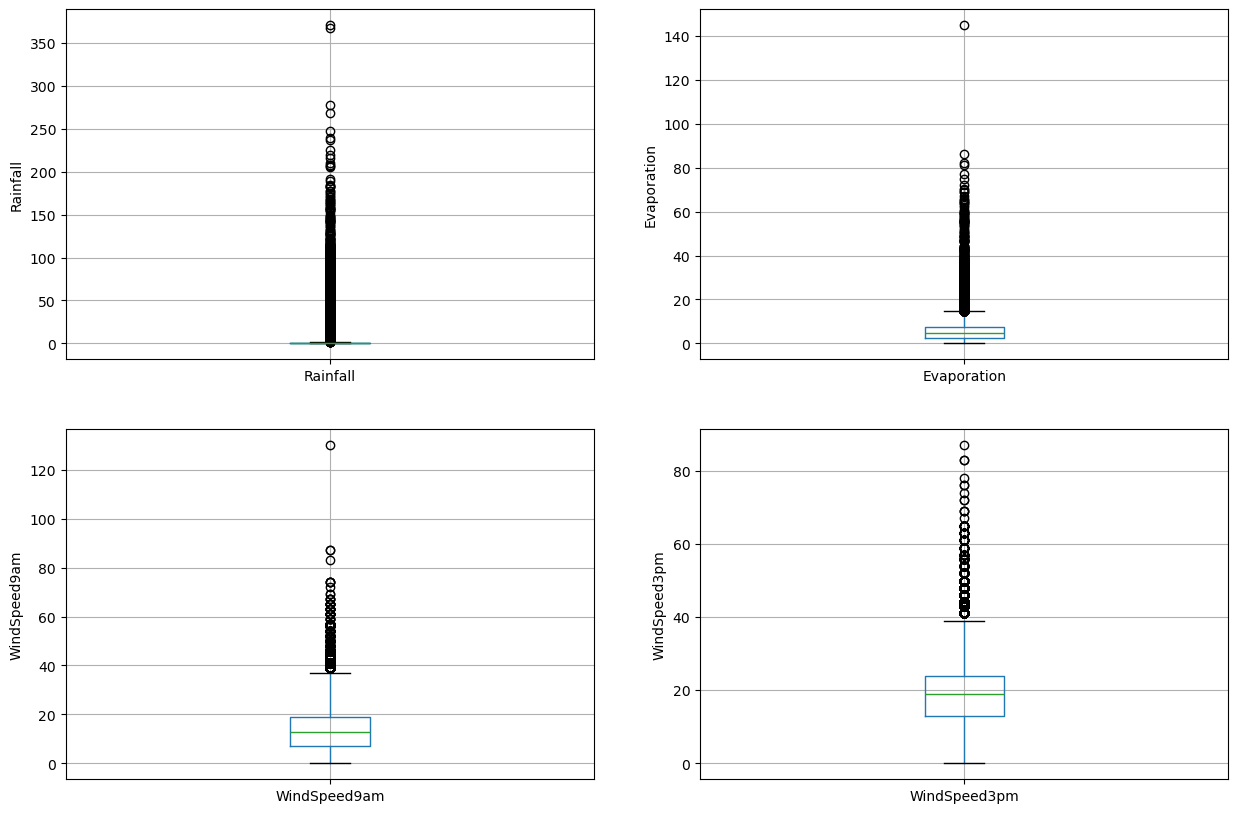

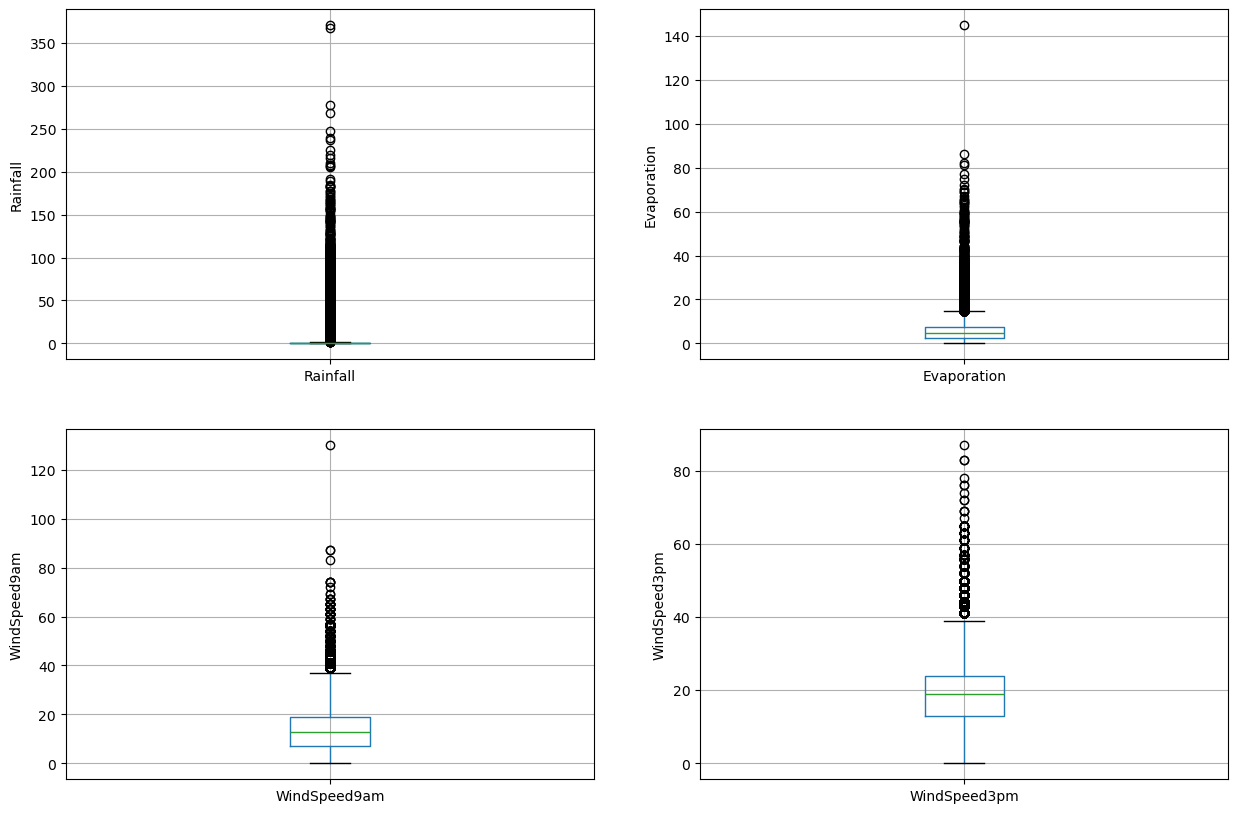

In [56]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')
plt.show()

The above boxplots confirm that there are lot of outliers in these variables.

### Check the distribution of variables


Now, I will plot the histograms to check distributions to find out if they are normal or skewed. If the variable follows normal distribution, then I will do `Extreme Value Analysis` otherwise if they are skewed, I will find IQR (Interquantile range).

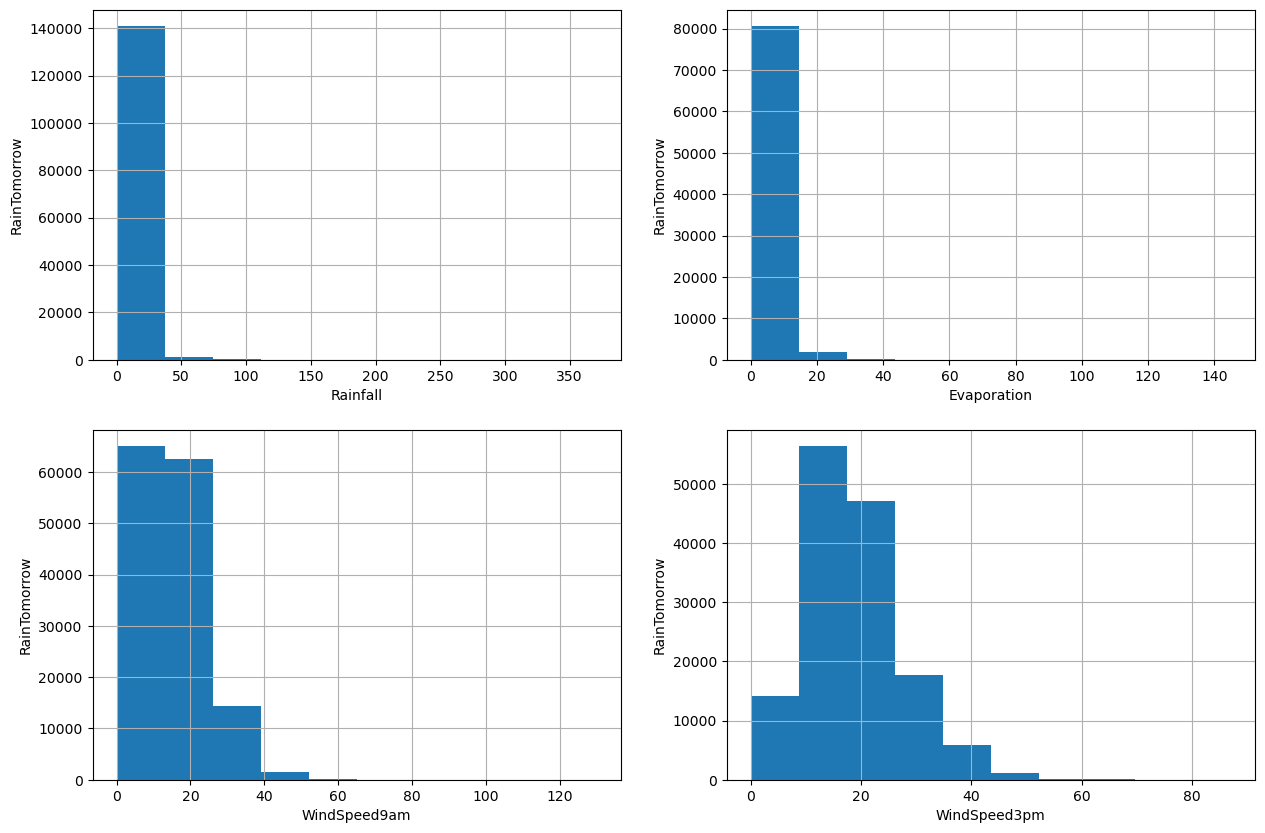

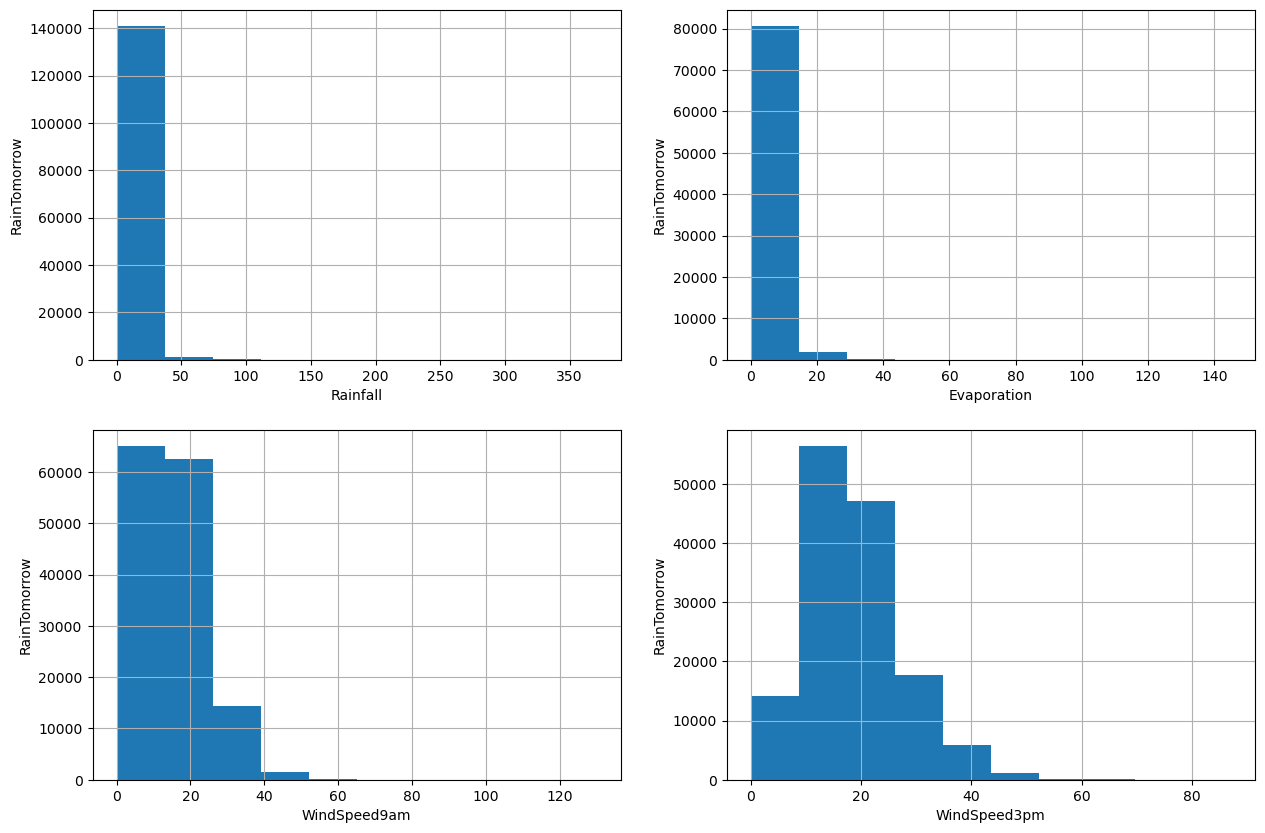

In [58]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')
plt.show()

We can see that all the four variables are skewed. So, I will use interquantile range to find outliers.

In [59]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Rainfall outliers are values < -2.4000000000000004 or > 3.2


For `Rainfall`, the minimum and maximum values are 0.0 and 371.0. So, the outliers are values > 3.2.

In [60]:
# find outliers for Evaporation variable

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004


For `Evaporation`, the minimum and maximum values are 0.0 and 145.0. So, the outliers are values > 21.8.

In [61]:
# find outliers for WindSpeed9am variable

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


WindSpeed9am outliers are values < -29.0 or > 55.0


For `WindSpeed9am`, the minimum and maximum values are 0.0 and 130.0. So, the outliers are values > 55.0.

In [62]:
# find outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


WindSpeed3pm outliers are values < -20.0 or > 57.0


For `WindSpeed3pm`, the minimum and maximum values are 0.0 and 87.0. So, the outliers are values > 57.0.

## 8. Declare feature vector and target variable

In [63]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

## 9. Split data into separate training and test set

In [64]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [65]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((116368, 24), (29092, 24))

## 10. Feature Engineering


**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.


First, I will display the categorical and numerical variables again separately.

In [66]:
# check data types in X_train

X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int32
Month              int32
Day                int32
dtype: object

In [67]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [68]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

### Engineering missing values in numerical variables



In [69]:
# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp           1183
MaxTemp           1019
Rainfall          2617
Evaporation      50355
Sunshine         55899
WindGustSpeed     8218
WindSpeed9am      1409
WindSpeed3pm      2456
Humidity9am       2147
Humidity3pm       3598
Pressure9am      12091
Pressure3pm      12064
Cloud9am         44796
Cloud3pm         47557
Temp9am           1415
Temp3pm           2865
Year                 0
Month                0
Day                  0
dtype: int64

In [70]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

MinTemp            302
MaxTemp            242
Rainfall           644
Evaporation      12435
Sunshine         13936
WindGustSpeed     2045
WindSpeed9am       358
WindSpeed3pm       606
Humidity9am        507
Humidity3pm        909
Pressure9am       2974
Pressure3pm       2964
Cloud9am         11092
Cloud3pm         11801
Temp9am            352
Temp3pm            744
Year                 0
Month                0
Day                  0
dtype: int64

In [71]:
# print percentage of missing values in the numerical variables in training set

for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

MinTemp 0.0102
MaxTemp 0.0088
Rainfall 0.0225
Evaporation 0.4327
Sunshine 0.4804
WindGustSpeed 0.0706
WindSpeed9am 0.0121
WindSpeed3pm 0.0211
Humidity9am 0.0185
Humidity3pm 0.0309
Pressure9am 0.1039
Pressure3pm 0.1037
Cloud9am 0.385
Cloud3pm 0.4087
Temp9am 0.0122
Temp3pm 0.0246


### Assumption


I assume that the data are missing completely at random (MCAR). There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset, we should use median imputation. So, I will use median imputation because median imputation is robust to outliers.


I will impute missing values with the appropriate statistical measures of the data, in this case median. Imputation should be done over the training set, and then propagated to the test set. It means that the statistical measures to be used to fill missing values both in train and test set, should be extracted from the train set only. This is to avoid overfitting.

In [72]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)           
      

In [73]:
# check again missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [74]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

Now, we can see that there are no missing values in the numerical columns of training and test set.

### Engineering missing values in categorical variables

In [75]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

Location       0.000000
WindGustDir    0.071068
WindDir9am     0.072597
WindDir3pm     0.028951
RainToday      0.022489
dtype: float64

In [76]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

WindGustDir 0.07106764746322013
WindDir9am 0.07259727760208992
WindDir3pm 0.028951258077822083
RainToday 0.02248900041248453


In [77]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [78]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [79]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

As a final check, I will check for missing values in X_train and X_test.

In [80]:
# check missing values in X_train

X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [81]:
# check missing values in X_test

X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

We can see that there are no missing values in X_train and X_test.

### Engineering outliers in numerical variables


We have seen that the `Rainfall`, `Evaporation`, `WindSpeed9am` and `WindSpeed3pm` columns contain outliers. I will use top-coding approach to cap maximum values and remove outliers from the above variables.

In [82]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [83]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(3.2, 3.2)

In [84]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(21.8, 21.8)

In [85]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

(55.0, 55.0)

In [86]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

(57.0, 57.0)

In [87]:
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,12.190189,23.203107,0.670800,5.093362,7.982476,39.982091,14.029381,18.687466,68.950691,51.605828,1017.639891,1015.244946,4.664092,4.710728,16.979454,21.657195,2012.767058,6.395091,15.731954
std,6.366893,7.085408,1.181512,2.800200,2.761639,13.127953,8.835596,8.700618,18.811437,20.439999,6.728234,6.661517,2.280687,2.106040,6.449641,6.848293,2.538401,3.425451,8.796931
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.700000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.700000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.200000,8.600000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000,2015.000000,9.000000,23.000000
max,31.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


We can now see that the outliers in `Rainfall`, `Evaporation`, `WindSpeed9am` and `WindSpeed3pm` columns are capped.

### Encode categorical variables

In [88]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [89]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
22926,NorfolkIsland,ESE,ESE,ESE,No
80735,Watsonia,NE,NNW,NNE,No
121764,Perth,SW,N,SW,Yes
139821,Darwin,ESE,ESE,E,No
1867,Albury,E,ESE,E,Yes


In [90]:
# encode RainToday variable

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [91]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
22926,NorfolkIsland,18.8,23.7,0.2,5.0,7.3,ESE,52.0,ESE,ESE,...,1013.9,5.0,7.0,21.4,22.2,0,1,2014,3,12
80735,Watsonia,9.3,24.0,0.2,1.6,10.9,NE,48.0,NNW,NNE,...,1014.6,3.0,5.0,14.3,23.2,0,1,2016,10,6
121764,Perth,10.9,22.2,1.4,1.2,9.6,SW,26.0,N,SW,...,1014.9,1.0,2.0,16.6,21.5,1,0,2011,8,31
139821,Darwin,19.3,29.9,0.0,9.2,11.0,ESE,43.0,ESE,E,...,1012.1,1.0,1.0,23.2,29.1,0,1,2010,6,11
1867,Albury,15.7,17.6,3.2,4.7,8.4,E,20.0,ESE,E,...,1010.5,8.0,8.0,16.5,17.3,1,0,2014,4,10


We can see that two additional variables `RainToday_0` and `RainToday_1` are created from `RainToday` variable.

Now, I will create the `X_train` training set.

In [92]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [93]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
22926,18.8,23.7,0.2,5.0,7.3,52.0,31.0,28.0,74.0,73.0,...,False,False,False,False,False,False,False,False,False,False
80735,9.3,24.0,0.2,1.6,10.9,48.0,13.0,24.0,74.0,55.0,...,False,False,False,False,False,False,False,False,False,False
121764,10.9,22.2,1.4,1.2,9.6,26.0,0.0,11.0,85.0,47.0,...,False,False,False,False,False,False,True,False,False,False
139821,19.3,29.9,0.0,9.2,11.0,43.0,26.0,17.0,44.0,37.0,...,False,False,False,False,False,False,False,False,False,False
1867,15.7,17.6,3.2,4.7,8.4,20.0,11.0,13.0,100.0,100.0,...,False,False,False,False,False,False,False,False,False,False


Similarly, I will create the `X_test` testing set.

In [94]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [95]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
138175,21.9,39.4,1.6,11.2,11.5,57.0,20.0,33.0,50.0,26.0,...,False,False,False,False,False,False,False,False,False,False
38638,20.5,37.5,0.0,9.2,8.4,59.0,17.0,20.0,47.0,22.0,...,False,False,False,False,False,False,False,False,False,False
124058,5.1,17.2,0.2,4.7,8.4,50.0,28.0,22.0,68.0,51.0,...,False,False,False,False,False,False,False,True,False,False
99214,11.9,16.8,1.0,4.7,8.4,28.0,11.0,13.0,80.0,79.0,...,False,False,False,False,False,False,True,False,False,False
25097,7.5,21.3,0.0,4.7,8.4,15.0,2.0,7.0,88.0,52.0,...,False,False,False,False,False,False,False,False,False,False


We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called `feature scaling`. I will do it as follows.

## 11. Feature Scaling

In [96]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day,RainToday_0,RainToday_1
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,...,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,12.190189,23.203107,0.670800,5.093362,7.982476,39.982091,14.029381,18.687466,68.950691,51.605828,...,1015.244946,4.664092,4.710728,16.979454,21.657195,2012.767058,6.395091,15.731954,0.219648,0.780352
std,6.366893,7.085408,1.181512,2.800200,2.761639,13.127953,8.835596,8.700618,18.811437,20.439999,...,6.661517,2.280687,2.106040,6.449641,6.848293,2.538401,3.425451,8.796931,0.414010,0.414010
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000,0.000000,0.000000
25%,7.700000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,...,1011.100000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000,0.000000,1.000000
50%,12.000000,22.600000,0.000000,4.700000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,...,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000,0.000000,1.000000
75%,16.800000,28.200000,0.600000,5.200000,8.600000,46.000000,19.000000,24.000000,83.000000,65.000000,...,1019.400000,6.000000,6.000000,21.500000,26.200000,2015.000000,9.000000,23.000000,0.000000,1.000000
max,31.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,...,1039.600000,9.000000,8.000000,40.200000,46.700000,2017.000000,12.000000,31.000000,1.000000,1.000000


In [97]:
cols = X_train.columns

In [98]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [99]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [100]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [101]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,...,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,0.512133,0.529359,0.209625,0.233640,0.550516,0.263427,0.255080,0.327850,0.689507,0.516058,...,0.054078,0.059123,0.068447,0.103723,0.065224,0.056055,0.064786,0.069323,0.060309,0.064958
std,0.157596,0.133940,0.369223,0.128450,0.190458,0.101767,0.160647,0.152642,0.188114,0.204400,...,0.226173,0.235855,0.252512,0.304902,0.246922,0.230029,0.246149,0.254004,0.238059,0.246452
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400990,0.431002,0.000000,0.183486,0.565517,0.193798,0.127273,0.228070,0.570000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.507426,0.517958,0.000000,0.215596,0.579310,0.255814,0.236364,0.333333,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.626238,0.623819,0.187500,0.238532,0.593103,0.310078,0.345455,0.421053,0.830000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We now have `X_train` dataset ready to be fed into the Logistic Regression classifier. I will do it as follows.

## 12. Model training

In [105]:
print(y_train.isnull().sum())


0


In [104]:
X_train = X_train.dropna()
y_train = y_train.dropna()


In [107]:
print(X_train.shape)  # Should be (n_samples, n_features)
print(y_train.shape)  # Should be (n_samples,)


(116368, 118)
(113745,)


In [108]:
X_train = X_train.loc[y_train.index]


KeyError: '[121764, 139821, 128233, 121286, 127574, 123701, 124226, 133435, 138255, 138705, 122691, 122547, 117050, 134107, 134631, 131945, 117978, 120163, 121620, 143734, 144278, 127849, 123074, 132529, 139285, 121222, 129983, 124827, 127931, 122158, 139074, 121142, 122720, 119294, 123332, 131574, 136724, 122592, 140721, 141004, 129204, 127410, 142083, 138029, 126332, 118162, 131961, 140837, 135068, 123068, 120812, 120247, 129545, 138445, 117587, 124721, 120821, 140932, 135166, 118031, 120636, 145421, 143080, 135993, 125048, 129952, 123127, 140810, 123204, 123671, 140327, 136042, 128094, 139384, 123301, 124246, 144870, 139079, 136129, 139493, 125554, 122470, 127776, 123630, 135503, 124067, 125772, 135462, 132661, 117960, 125284, 117736, 130246, 144953, 131262, 141032, 121846, 123045, 122536, 118098, 137904, 121694, 121687, 134419, 116870, 121005, 135524, 139815, 137801, 142054, 129962, 120176, 124300, 138598, 129543, 132588, 123987, 120092, 139506, 125870, 131772, 140128, 135252, 125230, 127274, 117136, 137805, 135898, 131194, 125844, 127587, 122280, 120289, 119250, 133320, 143545, 117056, 127802, 118867, 131494, 138580, 124454, 140251, 131181, 139955, 127848, 123823, 123758, 132736, 126048, 144660, 128377, 118541, 138624, 125981, 138218, 124882, 138850, 139391, 128625, 139237, 127565, 137480, 118572, 141570, 134487, 124493, 134445, 125460, 116699, 125866, 145127, 138251, 145006, 131569, 136568, 116819, 125318, 145171, 116792, 131572, 123433, 124418, 134748, 141239, 129957, 120837, 144825, 134116, 127599, 143255, 129563, 119569, 122830, 144581, 117401, 142296, 118806, 123971, 124955, 132237, 131462, 145000, 144511, 123232, 145376, 137186, 139717, 137505, 143708, 144751, 137690, 121512, 140083, 119193, 120690, 132491, 132314, 124741, 138286, 116922, 119383, 144730, 144339, 133207, 141157, 119051, 140537, 143378, 138104, 131229, 133735, 134469, 121628, 139654, 121229, 127723, 133117, 117173, 141987, 131314, 129869, 143569, 141969, 119487, 126696, 131364, 141805, 125984, 124490, 139680, 139450, 130792, 137546, 116767, 139170, 118380, 129271, 145010, 140101, 143722, 126231, 119482, 145452, 125487, 145185, 118143, 144276, 136264, 133262, 138994, 135378, 118916, 122047, 142109, 129891, 116546, 135486, 135484, 120268, 136965, 138558, 138841, 123059, 124567, 124941, 127430, 141353, 139866, 117409, 140229, 137167, 126276, 130812, 119485, 133602, 141652, 120637, 117332, 125979, 121560, 135272, 139412, 131049, 120622, 135619, 134627, 125452, 125357, 125868, 138940, 130110, 125752, 133824, 117055, 137552, 128953, 144731, 133920, 131811, 123153, 142953, 119682, 127374, 120736, 135808, 125610, 121825, 144942, 126595, 135297, 127709, 143082, 125993, 129571, 145301, 126194, 130398, 145069, 119059, 117334, 138212, 142010, 116607, 118931, 122988, 117314, 126753, 118978, 134167, 133455, 141484, 121762, 144694, 143903, 130419, 141950, 140515, 138581, 128059, 125086, 144809, 134012, 120519, 144780, 141106, 117577, 145140, 127903, 124495, 138334, 144076, 123660, 145097, 128364, 122243, 135407, 138041, 145167, 144203, 135793, 135741, 118959, 128378, 141013, 132481, 117209, 123336, 125611, 142221, 126656, 139100, 144778, 144177, 134264, 145240, 135828, 129280, 131152, 124548, 140273, 121728, 136944, 132988, 132087, 125433, 137554, 138961, 144154, 127227, 119364, 127165, 142293, 144754, 121386, 129788, 128497, 120365, 143497, 145048, 118203, 125065, 124457, 123383, 119102, 123333, 128791, 125248, 136829, 136294, 123164, 139987, 143424, 131478, 123912, 125937, 132731, 118605, 145160, 137990, 139047, 123003, 122952, 143671, 140167, 117873, 143547, 133926, 136871, 118263, 129232, 128214, 121148, 133749, 136340, 143465, 139415, 137331, 135008, 127265, 130454, 123772, 124782, 120943, 116751, 138918, 134769, 131644, 143822, 121900, 142492, 124018, 127900, 127379, 120782, 134409, 124047, 136434, 138828, 139751, 131248, 135315, 131357, 142600, 124643, 135807, 125581, 143188, 141387, 135216, 132338, 142070, 132737, 141892, 135630, 133025, 131973, 126614, 140750, 121172, 139933, 136079, 126663, 134141, 125448, 132050, 123586, 145398, 124060, 138056, 117650, 136512, 130938, 129076, 136787, 128706, 136342, 142014, 137363, 143394, 133157, 117897, 118979, 138256, 137338, 137687, 144526, 125349, 133798, 133825, 138805, 133713, 144710, 135092, 121863, 129477, 137771, 117033, 137584, 136406, 142158, 123151, 137050, 143805, 121601, 121989, 141612, 134321, 135063, 124262, 127066, 144540, 143979, 116862, 127833, 131746, 134358, 130736, 119599, 139365, 119093, 130801, 127004, 136056, 128636, 120851, 139113, 124909, 126905, 135413, 133865, 143679, 138600, 117913, 123916, 127713, 141860, 138125, 120961, 123140, 122299, 144217, 130901, 125025, 127596, 145388, 127229, 129646, 134151, 126785, 140278, 129721, 131072, 129510, 125219, 116881, 125599, 133596, 129697, 121881, 118015, 140904, 145051, 129884, 133125, 120160, 121495, 120206, 126434, 141132, 144779, 128967, 126851, 128866, 118562, 135501, 135256, 144590, 125648, 140893, 123213, 130852, 127077, 116679, 139572, 139926, 125410, 144926, 142743, 131102, 143813, 134460, 120186, 132178, 142470, 132369, 121098, 136579, 126878, 142676, 125464, 117241, 118675, 127232, 142700, 118957, 129556, 124139, 117017, 134082, 123576, 140002, 133217, 125129, 116791, 121258, 125631, 118364, 116402, 123210, 125045, 122549, 131724, 134047, 144086, 119142, 129761, 136347, 120960, 141490, 117227, 134707, 129092, 135987, 129755, 116369, 119878, 128998, 118786, 136763, 142094, 139343, 123150, 142999, 141723, 127720, 118300, 137888, 129093, 125628, 129701, 126108, 122082, 144517, 129705, 122040, 135860, 144109, 126104, 136313, 133353, 130550, 143036, 118239, 131661, 124577, 143856, 133430, 140307, 125672, 116764, 140111, 121645, 122069, 144846, 134150, 136146, 119527, 130013, 141947, 134048, 119319, 122740, 138836, 132420, 125346, 129440, 119491, 126035, 133289, 133699, 122339, 140357, 129321, 132572, 143274, 121841, 144717, 122284, 127738, 145403, 141845, 122967, 144760, 123878, 126806, 136514, 139241, 125525, 130862, 126311, 128809, 144665, 136173, 131155, 134096, 132579, 120088, 138546, 124195, 132861, 120196, 129913, 139842, 142062, 121656, 132277, 123635, 143754, 119710, 129936, 118093, 116506, 123689, 143186, 137851, 133152, 131300, 133051, 138538, 126566, 137097, 121760, 131725, 128002, 135046, 144057, 127964, 119959, 124485, 140486, 118996, 144358, 128814, 121654, 127293, 142291, 131003, 118644, 129056, 125115, 120849, 141558, 116836, 116808, 136296, 126728, 123883, 132630, 131127, 122441, 120906, 130362, 117022, 118447, 144103, 116587, 118593, 125050, 121395, 141120, 136391, 134001, 136954, 144811, 122033, 130215, 126837, 129203, 133358, 138774, 137867, 138846, 117412, 141284, 124413, 142456, 134289, 139172, 120987, 140582, 126089, 120610, 124463, 132101, 130164, 118036, 132662, 119928, 120172, 133447, 136741, 136907, 130693, 134213, 122878, 140726, 126392, 117551, 120992, 129160, 140945, 133356, 127689, 130943, 135336, 129128, 122735, 135682, 142803, 125294, 138542, 133738, 116496, 130613, 143957, 127942, 131523, 131515, 125837, 127627, 126005, 142415, 121127, 133043, 138874, 134981, 144555, 117298, 125268, 142580, 124823, 126833, 144547, 137759, 137455, 135777, 118672, 121117, 137930, 120568, 123477, 126764, 124406, 139548, 144639, 125763, 132226, 130312, 136484, 129493, 140035, 127777, 131649, 135104, 142538, 124620, 145234, 121353, 121175, 133496, 125253, 139930, 133973, 134300, 130529, 132463, 140746, 142673, 136141, 126044, 145250, 127390, 118828, 126391, 119317, 133720, 127556, 126808, 143723, 125867, 129164, 117477, 125353, 131579, 135113, 131641, 130682, 125160, 119612, 124288, 120153, 131855, 130232, 133989, 124793, 130493, 141281, 122473, 138006, 119892, 124768, 118910, 131611, 132755, 137953, 132006, 145200, 143576, 119909, 137866, 136207, 138365, 141397, 124794, 135101, 119214, 128875, 139528, 126773, 130549, 133905, 126199, 125458, 138601, 122384, 136113, 122804, 130905, 125168, 129566, 133066, 132857, 133704, 141190, 122943, 121471, 137238, 139520, 119978, 128388, 126335, 143205, 127456, 123936, 117673, 131280, 121511, 136508, 125212, 133916, 129211, 136892, 121031, 138197, 143104, 116757, 143611, 131292, 139040, 137763, 128053, 123765, 133574, 127506, 132707, 130282, 118842, 133893, 137126, 140381, 117737, 140262, 140624, 125642, 143319, 145325, 125711, 132690, 127825, 142831, 125808, 134780, 139490, 132367, 125507, 136301, 128808, 136132, 119232, 141538, 119834, 136839, 141085, 121963, 137484, 119233, 143223, 120513, 136390, 130495, 133346, 144629, 128903, 127644, 139878, 128910, 140953, 133877, 125586, 136483, 128684, 129757, 129643, 129986, 131693, 122904, 119641, 136384, 129064, 133733, 119414, 140409, 123895, 131824, 133815, 117867, 131483, 138227, 126323, 130666, 133235, 142271, 124125, 125196, 121932, 139822, 132211, 135871, 138280, 122593, 120770, 144530, 120766, 124958, 132879, 117457, 123813, 127558, 136081, 118443, 136403, 144921, 124054, 129003, 140922, 120056, 126148, 128389, 139409, 128663, 131967, 126534, 132673, 124697, 132982, 136538, 144882, 134768, 136678, 141011, 120296, 143221, 119906, 131927, 130898, 123257, 136405, 121394, 130625, 123781, 116878, 126540, 133979, 116841, 131276, 136189, 137265, 144747, 137253, 123341, 135709, 120292, 125478, 141908, 120806, 137814, 123674, 145395, 126230, 141031, 125834, 143000, 121921, 124665, 140371, 131888, 143481, 121459, 124428, 117541, 133030, 118772, 137286, 120555, 125291, 140470, 130064, 126799, 142540, 133071, 136580, 141345, 139794, 123488, 119691, 129516, 133373, 131108, 144375, 135067, 129119, 117459, 135763, 131663, 119066, 128318, 129027, 118999, 120320, 133901, 138648, 129630, 126287, 116939, 130545, 140706, 119867, 120111, 143843, 121853, 143970, 121069, 120621, 136463, 125034, 123309, 125018, 118711, 129800, 119082, 123920, 139198, 143935, 119345, 127378, 130543, 142672, 124394, 131710, 133300, 131596, 119448, 144194, 141428, 128315, 136713, 144473, 133745, 123876, 137892, 135712, 137798, 133761, 127950, 129939, 118657, 118435, 122695, 124014, 121400, 128514, 117617, 126587, 130304, 121268, 125426, 130847, 135634, 127764, 142366, 131192, 119078, 145271, 132950, 127926, 127519, 134734, 121769, 141356, 134544, 144681, 116452, 132593, 120122, 120483, 139802, 135575, 137914, 132311, 118817, 137617, 134280, 136225, 119645, 122825, 139568, 134413, 121986, 127700, 128074, 128056, 121004, 140926, 117355, 120727, 135669, 141657, 136431, 133091, 117382, 123702, 117200, 134672, 135036, 144915, 145057, 122190, 130926, 133253, 144666, 125427, 129035, 128973, 121378, 128415, 121578, 120835, 125566, 139107, 134312, 129179, 140655, 133429, 118500, 131774, 127325, 128639, 127138, 140700, 124010, 119322, 121133, 131349, 125634, 131408, 122871, 141460, 131894, 120465, 141258, 118769, 138463, 136143, 138036, 130515, 128884, 134147, 144148, 120768, 136559, 121987, 118954, 142297, 118879, 116451, 140897, 140291, 126795, 136086, 143682, 134306, 144976, 133407, 130378, 140654, 126122, 127575, 130306, 141907, 145413, 126037, 122913, 137164, 135670, 129925, 137762, 130984, 140057, 137308, 119034, 124776, 118530, 116943, 133762, 120108, 134942, 141773, 134870, 126701, 117349, 144462, 134124, 139449, 125189, 117881, 125116, 141432, 137384, 140427, 141769, 119068, 133968, 125805, 136842, 139653, 128649, 133420, 136584, 140727, 127298, 122127, 138544, 131269, 117219, 130286, 134681, 130776, 122770, 145350, 123742, 140098, 134084, 143294, 130450, 131420, 126732, 121782, 141847, 133929, 131243, 140129, 123018, 135373, 145115, 117842, 120233, 123212, 129490, 130259, 121278, 135797, 136630, 137875, 139690, 127385, 138324, 137673, 122726, 121371, 140768, 128589, 138425, 116568, 132964, 133947, 122203, 142871, 139531, 134192, 128583, 139433, 138397, 139175, 126523, 145034, 138343, 120901, 129911, 117922, 142544, 118302, 130160, 123648, 118552, 131573, 134523, 141792, 144604, 121618, 138049, 145060, 135571, 131136, 139114, 129114, 126341, 126384, 121854, 135360, 122223, 144477, 122259, 144132, 140799, 135483, 144636, 138092, 131506, 144011, 140712, 141699, 134922, 141049, 126744, 116523, 131624, 118176, 139042, 125503, 138222, 123574, 120489, 136472, 124165, 133004, 128909, 124484, 119190, 133936, 124268, 125052, 117718, 139715, 135165, 139618, 135414, 121640, 126830, 136008, 140855, 127789, 130993, 136545, 120894, 140436, 117558, 134020, 138204, 129348, 138374, 119388, 143829, 140281, 130511, 138308, 141829, 140883, 132741, 143831, 140377, 142246, 138533, 138889, 131119, 134692, 122837, 130274, 132131, 117657, 119133, 145179, 136645, 122704, 119990, 119451, 122672, 125939, 141273, 132443, 121364, 136267, 125354, 138132, 143060, 126737, 138228, 128633, 143361, 137729, 119225, 133667, 126885, 130704, 122716, 145004, 125411, 121993, 130630, 121424, 132495, 116377, 125734, 126268, 136338, 140681, 118583, 134398, 128829, 124778, 121792, 122148, 127817, 120018, 144201, 137872, 126124, 142208, 117841, 132456, 126855, 129648, 121356, 132142, 116498, 117308, 129156, 130832, 118056, 119958, 137427, 135445, 125110, 120896, 130889, 140230, 130436, 124677, 133270, 132873, 129481, 143818, 140504, 144835, 142724, 136581, 138468, 139564, 126740, 126829, 132355, 129530, 142306, 142783, 126077, 129447, 124108, 121904, 132126, 119695, 130050, 139474, 143126, 117744, 139829, 131941, 136136, 116872, 142541, 123314, 133419, 130646, 137397, 116786, 123158, 134862, 131126, 128213, 124170, 130771, 127255, 144771, 144693, 137983, 140224, 121237, 136043, 122164, 129781, 128812, 120899, 142800, 126632, 123316, 130167, 118228, 126029, 116621, 123481, 124441, 117030, 141783, 135474, 131056, 130352, 137078, 125472, 132704, 126479, 125456, 137395, 123184, 131665, 124550, 131738, 124156, 132653, 131183, 116920, 131682, 134362, 121613, 122513, 122601, 122106, 122477, 135356, 123205, 123529, 120217, 122123, 122139, 118528, 118527, 119471, 139087, 137185, 122654, 127156, 126190, 144850, 119149, 118230, 144245, 137986, 126171, 145202, 133302, 130809, 120446, 119457, 118284, 134934, 138232, 127016, 122111, 118705, 121833, 144873, 144618, 138410, 120604, 139639, 139968, 139316, 135644, 133645, 126161, 126250, 133581, 136358, 140830, 119749, 126536, 128492, 133786, 118968, 121294, 135911, 141021, 119246, 129473, 120572, 125405, 136311, 118001, 130168, 134554, 139791, 119530, 119536, 121063, 141629, 116677, 122998, 123330, 138568, 138571, 140615, 143216, 122303, 142788, 118440, 142465, 141159, 143882, 127600, 129032, 133053, 124993, 129644, 129384, 117245, 125087, 140004, 118166, 127214, 124478, 133105, 131514, 134493, 145054, 120126, 123033, 138904, 121285, 124020, 135774, 140382, 136423, 141955, 128850, 143181, 124570, 133491, 119411, 118326, 119983, 131188, 135452, 133329, 129956, 121753, 143780, 132503, 134572, 124233, 121056, 125643, 116759, 123678, 138283, 141513, 140488, 142753, 135039, 131614, 139084, 144234, 143538, 140478, 132218, 138764, 134939, 142755, 134744, 141035, 120757, 144457, 142735, 134686, 134214, 125953, 120279, 118475, 116996, 122643, 131196, 131848, 123402, 137365, 123882, 138488, 141618, 145458, 121893, 141064, 119946, 120282, 133935, 132916, 141421, 138970, 130224, 121968, 120040, 130299, 142270, 139778, 143131, 125461, 134619, 129390, 133840, 131457, 131752, 142078, 143428, 126046, 140150, 138577, 123896, 142512, 135765, 128271, 123176, 134180, 134369, 135756, 117667, 117089, 143918, 131351, 119403, 126254, 124913, 138955, 125337, 117121, 129819, 140842, 117712, 136653, 143435, 129317, 141696, 129224, 120517, 118836, 137421, 131600, 127480, 130178, 132070, 141136, 117500, 120187, 120910, 137334, 132924, 119772, 145246, 124979, 143625, 119338, 123168, 125493, 124252, 121162, 123709, 118278, 126607, 137998, 132505, 121874, 126154, 137726, 118113, 134458, 129514, 131994, 135683, 143664, 121787, 116489, 123879, 129537, 142327, 133395, 144503, 130868, 116813, 143079, 126140, 137475, 134909, 122312, 129049, 127786, 121937, 132955, 124257, 133313, 136562, 142278, 142665, 137895, 141137, 142595, 135521, 133087, 116655, 132130, 119702, 137873, 118173, 118234, 122911, 139773, 127178, 134998, 131938, 145043, 125534, 122142, 137757, 132804, 119129, 127663, 130290, 126075, 134794, 138086, 118092, 139210, 138114, 117410, 132612, 123959, 127912, 125142, 145198, 137020, 117049, 128210, 117900, 144165, 136150, 116768, 131132, 143571, 143989, 125398, 123900, 127152, 129054, 131761, 140542, 122852, 144482, 135198, 132528, 125028, 141842, 132801, 132975, 129898, 120615, 125694, 134665, 125666, 137710, 117226, 120407, 127257, 128216, 127944, 142497, 123392, 121561, 139683, 116738, 138883, 121510, 141072, 126381, 126159, 138048, 143980, 127448, 123555, 143234, 133524, 130185, 145377, 133615, 135842, 116926, 140724, 130888, 135740, 117722, 119069, 119090, 141674, 132622, 129176, 122200, 129122, 128823, 121021, 125302, 120020, 120071, 140663, 120017, 138502, 134719, 127813, 124051, 132160, 129418, 144053, 139492, 131058, 126251, 117879, 133517, 139913, 125877, 140408, 122239, 120829, 124189, 124638, 122414, 119643, 134900, 134800, 138832, 125958, 123428, 119763, 136596, 134995, 122795, 116441, 141156, 134451, 121325, 145044, 144579, 118623, 135174, 130410, 122692, 117747, 124324, 139053, 132865, 129118, 144476, 117361, 127688, 144663, 135694, 119842, 133200, 143296, 128239, 139282, 122942, 126550, 117850, 145326, 137472, 142100, 128039, 124057, 128303, 137131, 118545, 144598, 122568, 138762, 118145, 124978, 140453, 121293, 132900, 136899, 116623, 141415, 132147, 131311, 132717, 121243, 126160, 137578, 136960, 134871, 127866, 124775, 122228, 134064, 126675, 133194, 123440, 140621, 144714, 122790, 142499, 135513, 144157, 135639, 124765, 136795, 134243, 145235, 144936, 120266, 141227, 144836, 131707, 121790, 119859, 134577, 118790, 133528, 129503, 140872, 132824, 128835, 131864, 127478, 117993, 129134, 128277, 116371, 140477, 132710, 124809, 133482, 116724, 141560, 125820, 139617, 138032, 127462, 119581, 123130, 130883, 118109, 123388, 136096, 142166, 139377, 120590, 126239, 132157, 134159, 131731, 143469, 120497, 138293, 135819, 136302, 143261, 124637, 124648, 138548, 120325, 135510, 138949, 133903, 123048, 122087, 116774, 126455, 140112, 131006, 126407, 138169, 119134, 138401, 124655, 135556, 118148, 132564, 145457, 118904, 127037, 139997, 141283, 134181, 139460, 142011, 126135, 131318, 129582, 130715, 126708, 144461, 145046, 122289, 140306, 125773, 133464, 127345, 124934, 132409, 128275, 124462, 121562, 140347, 134832, 119933, 136329, 128805, 132096, 129998, 137785, 145384, 144543, 144008, 140585, 138858, 117169, 122984, 137259, 127547, 122618, 143484, 137147, 127495, 138545, 127069, 144111, 119173, 117687, 119458, 136754, 129539, 130942, 118839, 117192, 119781, 142230, 123717, 141897, 124922, 127174, 139099, 124425, 133286, 135349, 129740, 142061, 121911, 122971, 136488, 131538, 118827, 141093, 135460, 135861, 141561, 126328, 138467, 138792, 129250, 118250, 131820, 124298, 123547, 119639, 119607, 128555, 139245, 137596, 128729, 119519, 143501, 145424, 124386, 116947, 121457, 117084, 116538, 120951, 131867, 130472, 131133, 135168, 123506, 131139, 119436, 127251, 121614, 142184, 142701, 140632, 137705, 124812, 132537, 134984, 132067, 140445, 143364, 128564, 128543, 135989, 136091, 120596, 117664, 127309, 135620, 133083, 137912, 128701, 140787, 132654, 131913, 118342, 128482, 140723, 118123, 134169, 125092, 130441, 143451, 123468, 131647, 142810, 120839, 139732, 140766, 118974, 128960, 129501, 142768, 134917, 126922, 116565, 129937, 122270, 119112, 118731, 128801, 127521, 135290, 133020, 120304, 124217, 135498, 129052, 125565, 123891, 127204, 136989, 130955, 125962, 137010, 118739, 141894, 125502, 144214, 133742, 141252, 117411, 118829, 123067, 126071, 136722, 140523, 117644, 131105, 136158, 127226, 116586, 133592, 126762, 126868, 125822, 125157, 136612, 135324, 136381, 121551, 130835, 142084, 119268, 136084, 120711, 140864, 141628, 131149, 130664, 140405, 124134, 132781, 138811, 143153, 135058, 126508, 126847, 129285, 122025, 134203, 121300, 122803, 121969, 141870, 133317, 133999, 137991, 128968, 135962, 131976, 141762, 116831, 130910, 119708, 122939, 125919, 128723, 135369, 120459, 120277, 129896, 118132, 137090, 120348, 137803, 141691, 143466, 126641, 130386, 122021, 129227, 139380, 131556, 129573, 143994, 130372, 144123, 133084, 132052, 118885, 121073, 118512, 131622, 136737, 124296, 130092, 120016, 137129, 122916, 133939, 117291, 136949, 137049, 139197, 142772, 129835, 134903, 136037, 140934, 116431, 131323, 134030, 144007, 130541, 139239, 138373, 135196, 141350, 120719, 125667, 124537, 119731, 125369, 138652, 127083, 122031, 119337, 124753, 134553, 123884, 142956, 125070, 118946, 125327, 137264, 120077, 121747, 130709, 121442, 117628, 117670, 130163, 136803, 133109, 130365, 130764, 128834, 131249, 127646, 134424, 131715, 141895, 141537, 130243, 141700, 132511, 138191, 140557, 118231, 141162, 139367, 128750, 145322, 128495, 118389, 120116, 123032, 140056, 138959, 116412, 145012, 122358, 127988, 128241, 144820, 118181, 125104, 124278, 118463, 133990, 127100, 127991, 136987, 132771, 136039, 133950, 123478, 126904, 136694, 125972, 121537, 141997, 121503, 137282, 124187, 129793, 133165, 120053, 136166, 132180, 124161, 130981, 140482, 123530, 116430, 135629, 134126, 132701, 116552, 128508, 126775, 145083, 122366, 125190, 120451, 120723, 133311, 135917, 135749, 119297, 131966, 133631, 133684, 136940, 125977, 128054, 134448, 138691, 126000, 122590, 120892, 129535, 136151, 140020, 125250, 128646, 134040, 142259, 128523, 141715, 145285, 139405, 128964, 130589, 136119, 133529, 143228, 135516, 131463, 138932, 139484, 128515, 145379, 120583, 128218, 124858, 118719, 138069, 137399, 127168, 133754, 121642, 145136, 125321, 142162, 139516, 126509, 119101, 142656, 140568, 117941, 136492, 135461, 131529, 129198, 143256, 130903, 126694, 128383, 131304, 125748, 118079, 142522, 140456, 134028, 131654, 142746, 136588, 125860, 121990, 128081, 121190, 144637, 138418, 125280, 125365, 117040, 145025, 127333, 122026, 139853, 121340, 140059, 121610, 118709, 139190, 133411, 130445, 133480, 126556, 136353, 122532, 132837, 142521, 116532, 142407, 132100, 125779, 141373, 123050, 145196, 132170, 126956, 133228, 139071, 143544, 138570, 116967, 140340, 143397, 143352, 119746, 121646, 135424, 143389, 116639, 141041, 135970, 116392, 141198, 123044, 120333, 121359, 142717, 120263, 142432, 145135, 119236, 135548, 116378, 118041, 120758, 129950, 129580, 132939, 118229, 124153, 143819, 117340, 124155, 129283, 118177, 117685, 130284, 119889, 121651, 136453, 120831, 140460, 143145, 141191, 128476, 118837, 117063, 126972, 119542, 129260, 139685, 142568, 124729, 140279, 137815, 142790, 131905, 139678, 137661, 133458, 135693, 140525, 140708, 142725, 135626, 118186, 126593, 131112, 139013, 131771, 142766, 136258, 134626, 132911, 136689, 138384, 139139, 121816, 118086, 142488, 121509, 121121, 125421, 122308, 127576, 141692, 143531, 119544, 135417, 143217, 136375, 135768, 142876, 144752, 138160, 138623, 134642, 124651, 116903, 145332, 136328, 142240, 128417, 116950, 139707, 129546, 144158, 137849, 130628, 133522, 124074, 127914, 120717, 141886, 117363, 133826, 143705, 127888, 139345, 126788, 117810, 125088, 118457, 131522, 123627, 125143, 118249, 142657, 136593, 123349, 138746, 133389, 126730, 128281, 135724, 130086, 122992, 118612, 118600, 125574, 123572, 132027, 142396, 140546, 120347, 124656, 125499, 145439, 144688, 141413, 134492, 136889, 125091, 118824, 140138, 140688, 138894, 129940, 117931, 133803, 136623, 129450, 143797, 129262, 138161, 118723, 135210, 145316, 132313, 126538, 135735, 134093, 119870, 138669, 119729, 127258, 137462, 134429, 125880, 119529, 127230, 129021, 136878, 131237, 140342, 135810, 125359, 120244, 125967, 124455, 144854, 120518, 143894, 136550, 142180, 127705, 126013, 142131, 131106, 141616, 130501, 126099, 124518, 130619, 142896, 126420, 137485, 129153, 131882, 116851, 121849, 136644, 133006, 122006, 123377, 136223, 128519, 123637, 130769, 138512, 143262, 144038, 123889, 141549, 138767, 118580, 143947, 133192, 133729, 123408, 124815, 136913, 122052, 122756, 127612, 127252, 138147, 122993, 131992, 119117, 144878, 127885, 132580, 134003, 138715, 136928, 139309, 141266, 129305, 133705, 129978, 144701, 134988, 144448, 123632, 133732, 118782, 127607, 132182, 136456, 140794, 140695, 118464, 121808, 123227, 124653, 130213, 118555, 145220, 126792, 140360, 136631, 134621, 125441, 141721, 133296, 138126, 129265, 139718, 116689, 134253, 134552, 127024, 144195, 138371, 122306, 132570, 133015, 126954, 132791, 133755, 127101, 118406, 135907, 142560, 134899, 121623, 124039, 131189, 131178, 132931, 128453, 125901, 130250, 129199, 128296, 126685, 134154, 136074, 128091, 135475, 142378, 134787, 121996, 131561, 126791, 143893, 142458, 145359, 128063, 121719, 145121, 145212, 134546, 122379, 117755, 128421, 133681, 134417, 119610, 139585, 129931, 142813, 126374, 128312, 135241, 130850, 125475, 120409, 119488, 143245, 124006, 123010, 118514, 138890, 121180, 116801, 127266, 141038, 119647, 120234, 142384, 132195, 117013, 141519, 131409, 138527, 117351, 141678, 139327, 134537, 132075, 127724, 133037, 122521, 119664, 141152, 120934, 120067, 134980, 118898, 127120, 116983, 122841, 139781, 117458, 134945, 141534, 129723, 136454, 122836, 128659, 125396, 121950, 127163, 125384, 123233, 125596, 126238, 130925, 122100, 123458, 122114, 139393, 140063, 117259, 118393, 130183, 144410, 130294, 123927, 117282, 119456, 131347, 133327, 123613, 124387, 122714, 116726, 118735, 135340, 125789, 116445, 137660, 143719, 143478, 139859, 135186, 143783, 141108, 120781, 135596, 121221, 120841, 139663, 134964, 131425, 126906, 139984, 132851, 116805, 117632, 117730, 136240, 126565, 134472, 141944, 119343, 118553, 124088, 120607, 129708, 122387, 138443, 139200, 120133, 135719, 138954, 123080, 129794, 119654, 122889, 132651, 116670, 135949, 144619, 144986, 127634, 132421, 121594, 125548, 119920, 125245, 136239, 137416, 131729, 119023, 129102, 136188, 128859, 138687, 120269, 125882, 142946, 136618, 122895, 137165, 134335, 144080, 130569, 135191, 121007, 121435, 120833, 137478, 116424, 125836, 133787, 126881, 138103, 129769, 127189, 126866, 134174, 134480, 130052, 123101, 143998, 133370, 128961, 120856, 125130, 140151, 130361, 122609, 138380, 135271, 133318, 127290, 123835, 123907, 137029, 138322, 121240, 118692, 129000, 117281, 131476, 137976, 135590, 131293, 133079, 117753, 144003, 138201, 131177, 127710, 127394, 117392, 132585, 122231, 144431, 124584, 117814, 132733, 126439, 145333, 139651, 130034, 133173, 125884, 117905, 132032, 136964, 129529, 118033, 134869, 136439, 117234, 123535, 121868, 133828, 140070, 144353, 133997, 127435, 122557, 142046, 119590, 137881, 133554, 119290, 124328, 126047, 130582, 117180, 140575, 121241, 143119, 140092, 139767, 124341, 140680, 127734, 137511, 139270, 132475, 131692, 139195, 117048, 133917, 126879, 120879, 140951, 142793, 140877, 117634, 118826, 142709, 139596, 118714, 123503, 124986, 116531, 143524, 132238, 120936, 135388, 137663, 126569, 136712, 126794, 141585, 144978, 130033, 137827, 136707, 129657, 133170, 126354, 140309, 124880, 140630, 130004, 121680, 132375, 123963, 143440, 121582, 145188, 133021, 145276, 118226, 139999, 129677, 116470, 125046, 143363, 121832, 138107, 120551, 144296, 141710, 142507, 121547, 129711, 139207, 125251, 141381, 127873, 135986, 136385, 121177, 116935, 134345, 138171, 133224, 145262, 143535, 132727, 144750, 145257, 137443, 134555, 131251, 133205, 132300, 130733, 140130, 119964, 134230, 118490, 120342, 134519, 125516, 144006, 125673, 144359, 132357, 132719, 137044, 127960, 121213, 137179, 130252, 131241, 135602, 138472, 124818, 124728, 120290, 125550, 116514, 128794, 124259, 133305, 118649, 117178, 133009, 125442, 116744, 137351, 131411, 138393, 123531, 135795, 134178, 123515, 123688, 120049, 127975, 125171, 138423, 127534, 123231, 142039, 123295, 123411, 134187, 137018, 117330, 143608, 120114, 120472, 136801, 119049, 138215, 128715, 122137, 129060, 124520, 134842, 133965, 134599, 117007, 137319, 138058, 117656, 126946, 141204, 144769, 124437, 134953, 142965, 120101, 144712, 133868, 135472, 126823, 117529, 135964, 117289, 126370, 137645, 125061, 136194, 144281, 132077, 126138, 129475, 132671, 134702, 117796, 137722, 129434, 132198, 124613, 119492, 140462, 142030, 134013, 139167, 121408, 142972, 134317, 135184, 129435, 127718, 118035, 124704, 140748, 123779, 138596, 136304, 118615, 136325, 131922, 129274, 138593, 143374, 136619, 138452, 144352, 116663, 117597, 129470, 126935, 126179, 141945, 135562, 140947, 126911, 121976, 118473, 124849, 126100, 126454, 123211, 143479, 134535, 117025, 127708, 133671, 123687, 141938, 132243, 142951, 127019, 142301, 133112, 140127, 140455, 124851, 120788, 120811, 133657, 139772, 132224, 133179, 137915, 138529, 121667, 133595, 116476, 131730, 140790, 135240, 121797, 132629, 136205, 144506, 134857, 132351, 137487, 123700, 139485, 121262, 130622, 124377, 128065, 119858, 123014, 144992, 119898, 127814, 135025, 123582, 129424, 119240, 134026, 122432, 139920, 134101, 134637, 142269, 120318, 141262, 129736, 117321, 116753, 132190, 137354, 121516, 119175, 121845, 136942, 133867, 130000, 143525, 124482, 132726, 133984, 123023, 120867, 129448, 132148, 131544, 125646, 136500, 139288, 135139, 117784, 137280, 125697, 121515, 129169, 119982, 143429, 131175, 132853, 123684, 128608, 143067, 116874, 129148, 127446, 122818, 120669, 120769, 140463, 131946, 131706, 133583, 124157, 127191, 132312, 122869, 127109, 120080, 140320, 144115, 118834, 117797, 139800, 135374, 144847, 128086, 135593, 138556, 143208, 124822, 132093, 137175, 129042, 132745, 136958, 136809, 137696, 140658, 117507, 122565, 117440, 129229, 126757, 127023, 129499, 117095, 130571, 120949, 144632, 134423, 132930, 119381, 132252, 132992, 137559, 123356, 122639, 119402, 142969, 118233, 119454, 118240, 126032, 129661, 130054, 137350, 143180, 130255, 143997, 119162, 141988, 120585, 121850, 120990, 130694, 127904, 133014, 139019, 131461, 139851, 130102, 121718, 133206, 126417, 133097, 136651, 126518, 118198, 135661, 144905, 143587, 119328, 140236, 145053, 122394, 137225, 125544, 136413, 137619, 142627, 125931, 116977, 128880, 119951, 120262, 136159, 139189, 138611, 145258, 134288, 120876, 143908, 134092, 137882, 121612, 134866, 141586, 120078, 137222, 144720, 129527, 141592, 133533, 141010, 135827, 132405, 139291, 144775, 144219, 128917, 130195, 121481, 128029, 124379, 127418, 133940, 141820, 131309, 131169, 122300, 125220, 133018, 124456, 131866, 140811, 143543, 129895, 141389, 142216, 128751, 125645, 128865, 145078, 135338, 138803, 137104, 140898, 144514, 116409, 134506, 120399, 120112, 142004, 126453, 121568, 119596, 136879, 121054, 125208, 135769, 139054, 123237, 117788, 128643, 133607, 127778, 129511, 143961, 124280, 121525, 121672, 122853, 117600, 126861, 117058, 123897, 141178, 130360, 133814, 121739, 122402, 124316, 118008, 131745, 143494, 139558, 139601, 122320, 126929, 135066, 140345, 117583, 127902, 124228, 135268, 127195, 122663, 145040, 132490, 141420, 135529, 142866, 130793, 130084, 136574, 137298, 142359, 138726, 124910, 139708, 117647, 126345, 144081, 128680, 127196, 122708, 144171, 139535, 122371, 126297, 145081, 122267, 134606, 135588, 129594, 132740, 129538, 127828, 117302, 141599, 138848, 143878, 129638, 140213, 136372, 132885, 142132, 136534, 140656, 121290, 142637, 131559, 132225, 117254, 138622, 135790, 120480, 143077, 126027, 134796, 123839, 136071, 123782, 121093, 137218, 128300, 121281, 139169, 118077, 119948, 141935, 132427, 137166, 119873, 119635, 131891, 145255, 131740, 143053, 142639, 133002, 131156, 138051, 135421, 129709, 132696, 131790, 134022, 131187, 135197, 129415, 140054, 118550, 121057, 124407, 125892, 125563, 143471, 140841, 140036, 122370, 136420, 126909, 118330, 128224, 134097, 125164, 138192, 134520, 119850, 144520, 122680, 137157, 126248, 131435, 138966, 137058, 137880, 130424, 126957, 145079, 135988, 132153, 119594, 134333, 140232, 138642, 140005, 136553, 119226, 145075, 122675, 132855, 140321, 142513, 128311, 135075, 142214, 132165, 135238, 139782, 119483, 123507, 142067, 120815, 132442, 126130, 138446, 142471, 120433, 123288, 120627, 137571, 143512, 138575, 116746, 126942, 133188, 143382, 128530, 141780, 139533, 122269, 117120, 145102, 122129, 126252, 135249, 144652, 130018, 142128, 135787, 141757, 133892, 122698, 138367, 136632, 136934, 124237, 135572, 138475, 120957, 126619, 136572, 143102, 142362, 135940, 127517, 134586, 131607, 137263, 130817, 133839, 117119, 123847, 137140, 139615, 124576, 122732, 130632, 117067, 143273, 119888, 125571, 119803, 132254, 130431, 136252, 139333, 139981, 133001, 142402, 133186, 121248, 134739, 126114, 143953, 143220, 138146, 118387, 126106, 135200, 132215, 126591, 133988, 119689, 131881, 128538, 119096, 129113, 132508, 145425, 138505, 138939, 119800, 144695, 118619, 141939, 141291, 133405, 142782, 137861, 130010, 134284, 124327, 145281, 122799, 124415, 143055, 134738, 118595, 116898, 130128, 119804, 121134, 116650, 141319, 129631, 126339, 131432, 117495, 142795, 134618, 118932, 135380, 120253, 117946, 130787, 118185, 120955, 131629, 137435, 139584, 124383, 130819, 141399, 135096, 121382, 140729, 124504, 126778, 127283, 141426, 124546, 130744, 136089, 125625, 117150, 134168, 125244, 116915, 126713, 144293, 117870, 144597, 123815, 132192, 131749, 127759, 135846, 130416, 132665, 117061, 117151, 118445, 141351, 131258, 143281, 137382, 118891, 126688, 122481, 134425, 141821, 123343, 126620, 130738, 122634, 123367, 122907, 123324, 145278, 119360, 121938, 132139, 123149, 130773, 143248, 123943, 128376, 139817, 144393, 131722, 133964, 128894, 142263, 128724, 132453, 126822, 141340, 121049, 125616, 128568, 117663, 117092, 131315, 122499, 132632, 136571, 117487, 118537, 142761, 139819, 120492, 134363, 122065, 127771, 144469, 135990, 136416, 134926, 129137, 120606, 120635, 128911, 119617, 138676, 133885, 138688, 143519, 130667, 132438, 136070, 116376, 124207, 129314, 129961, 141917, 134641, 118054, 123672, 118491, 129117, 127957, 130171, 140507, 133622, 128250, 130608, 133266, 122766, 119177, 129621, 121458, 122622, 144944, 122883, 119058, 127285, 118764, 139514, 144227, 127212, 132728, 137345, 131797, 119203, 117899, 124263, 135994, 144620, 135265, 120228, 128057, 142222, 135318, 120317, 130783, 130647, 142599, 142784, 143542, 138262, 125956, 138268, 127403, 139473, 119636, 124322, 136701, 144189, 134228, 120311, 137668, 130345, 122124, 129034, 128616, 133049, 117986, 118688, 123019, 136284, 126481, 127493, 119985, 140188, 126645, 131558, 132840, 143789, 122141, 136477, 118347, 143012, 128024, 134505, 137624, 144342, 128338, 142633, 119624, 130616, 118539, 116742, 124675, 133812, 133587, 139591, 126522, 135727, 135010, 136250, 130208, 142352, 141330, 137641, 138791, 143589, 139989, 117917, 123989, 129497, 126270, 116592, 126690, 129534, 116512, 121664, 124094, 123937, 120982, 118993, 117651, 143476, 119192, 120688, 135914, 138140, 119514, 116750, 135597, 143073, 132984, 125386, 131255, 118915, 120963, 136686, 123827, 129142, 117519, 123419, 141240, 123148, 144593, 142461, 144647, 116913, 119744, 139523, 131744, 122368, 144669, 144659, 116611, 140801, 126912, 118317, 124617, 137074, 135372, 141408, 130917, 133128, 135393, 138897, 130711, 138419, 131193, 123667, 123160, 122745, 142613, 116550, 134149, 129288, 140052, 126681, 124779, 136774, 139328, 132822, 136435, 139780, 133873, 140522, 134845, 135328, 137271, 133012, 139401, 128190, 131424, 125105, 136818, 135502, 140034, 145357, 140620, 141323, 121698, 144924, 131396, 123046, 129696, 135729, 136186, 122173, 118698, 141020, 124284, 126229, 125692, 144113, 129813, 121018, 123677, 144528, 124563, 125042, 136916, 117222, 117026, 119291, 141223, 134120, 123838, 120538, 138208, 127510, 132140, 138239, 133937, 117278, 136299, 123929, 124668, 138686, 122991, 125361, 117689, 139583, 141418, 131793, 129207, 141596, 122439, 122488, 118614, 124534, 130563, 127685, 124309, 128674, 133281, 124055, 138242, 123280, 142548, 141940, 124281, 139915, 141980, 138625, 138448, 130108, 136421, 142547, 122776, 124024, 129780, 119076, 138302, 139641, 138887, 128384, 133444, 133290, 124137, 140992, 144518, 126864, 139890, 116804, 142186, 117179, 130842, 136946, 134135, 138551, 121205, 133780, 122791, 130038, 117815, 138091, 125699, 138248, 119062, 134585, 129924, 124160, 129192, 129863, 138387, 116403, 143830, 145401, 129183, 129987, 117676, 131713, 128947, 143078, 121733, 132368, 130818, 121563, 118142, 136364, 143606, 120652, 136638, 119106, 133467, 141315, 142526, 130928, 142960, 133561, 137818, 142785, 143628, 131375, 135205, 121727, 136247, 136392, 145361, 126217, 137321, 141884, 132430, 143706, 120252, 125490, 136078, 136161, 119000, 135894, 144690, 125403, 144757, 116730, 135062, 131345, 123248, 126359, 123597, 138470, 128448, 123036, 125423, 128018, 124720, 127046, 121879, 118131, 121410, 136851, 132085, 135613, 135074, 119606, 118973, 128049, 127408, 132925, 117348, 121292, 135681, 140084, 137883, 130663, 125252, 116656, 136094, 139303, 141793, 117390, 129190, 140265, 127550, 133957, 123340, 116975, 132825, 122906, 143910, 134380, 133802, 125942, 134711, 127854, 120105, 123761, 120448, 140740, 142847, 126169, 123691, 126742, 126336, 138252, 133096, 125345, 124270, 140815, 126542, 135370, 123187, 120055, 139502, 141480, 120384, 125470, 136658, 128671, 123461, 128527, 135300, 144912, 138476, 136806, 139320, 142535, 129094, 142160, 141737, 143707, 124712, 138807, 135343, 126990, 142587, 121606, 127071, 141758, 141962, 139597, 130239, 119993, 133349, 123591, 131265, 129577, 127507, 141037, 122041, 124040, 121701, 127785, 133000, 129923, 140282, 130672, 127439, 133485, 120588, 136415, 125339, 131704, 131145, 136041, 137761, 125735, 132599, 133966, 125929, 116734, 135467, 130798, 121824, 141507, 117999, 133556, 140888, 137499, 128359, 122247, 127801, 142433, 135352, 141726, 125375, 119937, 144562, 120743, 130055, 141800, 143318, 135744, 131382, 137117, 127677, 143951, 143886, 124693, 143952, 135223, 117522, 123994, 139183, 143700, 127127, 118139, 140758, 130858, 121756, 125609, 117499, 121276, 120124, 118752, 133432, 145337, 118853, 129220, 143669, 118332, 140041, 131497, 136068, 125678, 131853, 134008, 121307, 144927, 126039, 143209, 138706, 119150, 123567, 121750, 118597, 142002, 144961, 125864, 133771, 137495, 119121, 137598, 139760, 145277, 143309, 122099, 126218, 127000, 131239, 144524, 140784, 117511, 138506, 117613, 116477, 136558, 141550, 128267, 138060, 121155, 123608, 119660, 123986, 128867, 143266, 122880, 130337, 130298, 116560, 117844, 135642, 125417, 132275, 139701, 127112, 134646, 137618, 131486, 140988, 124927, 140683, 132110, 119895, 124114, 121204, 124781, 118984, 125617, 123145, 120014, 129616, 143560, 134614, 121123, 134175, 122430, 122849, 143237, 143452, 126441, 121927, 133750, 130592, 126363, 133120, 138247, 125635, 116973, 129453, 133972, 140173, 129866, 131350, 145158, 125199, 141547, 120050, 141808, 143678, 135347, 133683, 121864, 144728, 130327, 122867, 141968, 117132, 142171, 118733, 124158, 118267, 141669, 141994, 144985, 138258, 121941, 134735, 137448, 120908, 124976, 131310, 128070, 139330, 130605, 122444, 120887, 119902, 140676, 130871, 128783, 128687, 143573, 141202, 125708, 140497, 138543, 127407, 136108, 121570, 126300, 138644, 121681, 125429, 126515, 130199, 136204, 135494, 131068, 134865, 131762, 144700, 132414, 130375, 137979, 130588, 122030, 132444, 141975, 133794, 120226, 135939, 119263, 134478, 128822, 124769, 135311, 118433, 128339, 122135, 131990, 139347, 119443, 128895, 139018, 138945, 129565, 143515, 126610, 136529, 134837, 128860, 125484, 116761, 139268, 124759, 123546, 139461, 120911, 131985, 144749, 120218, 142191, 138024, 125175, 137048, 127971, 117189, 138123, 125435, 121231, 125121, 125575, 128507, 132465, 135221, 117661, 137543, 122174, 142144, 145070, 142703, 121665, 125216, 126997, 134232, 133465, 144999, 118081, 129853, 129478, 133459, 123954, 132103, 136979, 131099, 132723, 121025, 120537, 128954, 127458, 121417, 120395, 136939, 141435, 132606, 130567, 118152, 142252, 141967, 140362, 124397, 130070, 133504, 134886, 124435, 139164, 136887, 119890, 143731, 129625, 135151, 143557, 118869, 121871, 142026, 126284, 135711, 145209, 145106, 119380, 117581, 129201, 135382, 117778, 120254, 135673, 118646, 141916, 127401, 129077, 137434, 119631, 125862, 126219, 119152, 144904, 145356, 143025, 143169, 119835, 140689, 117485, 119871, 140852, 117337, 127716, 139946, 127952, 116798, 133795, 134963, 119265, 132318, 121771, 143017, 121523, 144376, 144830, 124464, 125119, 126343, 124912, 138635, 143839, 140520, 126676, 123615, 142285, 119219, 132951, 116599, 132043, 123473, 137594, 121055, 121302, 145311, 116961, 127150, 143158, 127179, 135169, 141636, 135117, 133164, 134237, 144966, 140387, 126189, 117971, 118482, 126422, 132028, 124918, 117088, 120360, 129512, 143985, 132424, 124562, 125543, 124050, 123102, 140553, 138588, 134041, 135705, 124242, 126900, 138346, 122032, 130566, 129057, 145455, 122586, 143417, 139646, 119532, 129395, 138748, 129335, 123704, 123249, 141066, 128800, 123538, 143511, 122632, 124505, 136393, 122981, 126379, 133739, 122896, 139757, 121401, 143853, 143548, 139128, 136691, 140823, 124005, 144651, 138348, 123810, 124000, 135280, 137772, 131348, 121965, 130519, 124875, 129046, 121341, 119420, 118892, 126739, 129368, 122422, 124623, 143184, 134821, 133692, 140182, 122117, 142207, 127994, 142212, 122516, 142730, 132806, 120742, 122034, 126654, 122029, 134550, 127400, 137551, 132540, 118792, 140896, 134714, 120454, 131206, 129143, 122118, 123526, 144389, 129838, 139845, 126608, 120015, 137084, 142133, 130971, 141589, 135725, 129753, 137381, 142890, 144879, 134603, 134395, 143896, 134817, 142289, 138641, 136190, 127169, 129933, 117077, 119719, 138682, 120981, 145189, 121348, 127080, 134242, 139247, 135812, 128878, 140399, 126898, 120355, 140365, 142430, 131606, 127121, 127373, 139193, 130935, 135580, 135671, 127690, 119455, 121163, 125688, 135403, 142231, 143206, 141583, 129095, 127809, 142933, 139749, 125827, 129452, 117415, 137228, 120403, 132796, 133371, 129748, 145287, 119063, 128923, 126948, 132785, 130624, 133028, 117385, 137753, 122839, 121145, 145208, 120239, 123172, 120795, 121448, 132889, 127509, 118392, 121296, 143845, 136516, 130766, 143565, 142339, 140255, 137717, 117461, 118970, 120945, 118444, 138866, 124321, 144605, 131161, 120764, 132878, 130420, 144035, 122785, 131997, 121236, 138148, 127275, 121376, 122779, 141380, 125674, 134464, 138515, 125797, 118155, 141964, 118907, 129214, 127557, 124911, 125526, 120274, 120577, 132278, 126233, 131720, 124671, 117527, 124269, 119921, 137309, 122887, 122724, 133546, 130886, 119377, 119215, 131863, 130029, 141454, 138219, 123398, 136705, 127215, 124803, 141646, 136765, 136659, 125915, 135134, 124133, 141296, 119406, 141881, 132499, 127989, 136945, 139174, 125418, 133306, 145367, 124645, 141292, 127579, 133775, 128405, 133624, 134326, 134647, 138956, 138127, 141901, 139711, 117964, 135775, 142651, 133843, 119979, 142734, 117697, 129426, 123995, 122355, 136425, 117279, 133569, 136771, 119168, 130105, 122910, 133682, 137461, 143637, 127103, 133994, 139436, 124999, 121766, 142197, 130313, 128481, 129030, 135296, 137324, 144093, 132643, 125352, 120814, 117859, 127419, 130708, 137211, 120882, 120730, 125202, 140418, 122613, 118318, 135309, 117070, 135090, 127908, 126069, 138236, 120550, 142072, 135365, 116812, 124943, 121633, 130874, 125258, 117750, 138038, 126157, 136303, 124317, 124037, 126539, 133658, 128592, 118789, 135946, 132472, 142204, 122644, 118840, 125906, 125047, 134352, 138351, 128559, 122729, 121994, 135728, 125830, 117268, 124426, 141505, 128052, 141472, 129275, 138912, 122448, 131098, 128014, 143837, 134239, 140833, 137297, 132384, 137658, 128882, 133229, 141541, 142163, 121272, 141707, 119677, 145125, 119994, 136256, 136915, 116897, 138683, 119806, 131134, 135491, 136840, 125709, 127560, 120539, 126726, 124829, 128550, 137388, 126937, 133773, 116965, 137789, 118241, 120089, 138332, 122706, 124173, 137213, 126137, 139694, 118640, 125332, 117122, 140678, 139586, 133366, 129903, 143596, 142124, 133223, 138518, 118005, 117805, 138278, 128676, 118661, 130422, 116988, 127353, 124188, 119680, 117654, 133646, 121414, 130658, 142945, 135147, 119853, 145073, 140647, 130604, 123844, 135194, 128471, 137066, 129618, 145072, 141684, 121421, 123363, 124688, 123683, 120952, 136268, 120522, 140203, 120043, 129645, 125693, 130967, 142113, 132688, 131253, 117925, 143347, 137631, 122188, 142064, 131101, 129150, 139966, 118029, 143577, 120412, 125665, 135489, 138260, 133016, 126836, 118905, 124748, 144954, 128668, 124026, 139023, 126844, 117665, 117721, 130542, 119223, 134790, 123580, 120965, 122011, 134123, 125647, 142961, 132926, 120738, 141361, 136464, 125368, 133660, 144248, 130949, 121159, 143045, 142420, 137886, 133250, 123504, 122602, 121710, 138150, 138718, 119541, 136999, 145313, 125366, 121630, 144982, 140754, 119911, 118507, 118599, 118535, 139672, 134943, 126930, 125649, 130785, 138595, 141398, 128532, 126292, 121867, 119385, 134017, 138587, 123604, 144934, 124380, 131533, 136510, 123347, 121724, 128534, 126150, 117646, 121160, 124975, 127815, 142767, 137944, 140014, 130671, 123287, 135447, 136511, 144744, 136026, 119160, 136657, 134728, 137860, 129155, 138451, 130729, 124804, 138660, 131052, 118377, 119276, 130772, 144531, 129422, 140862, 121374, 131883, 139891, 138730, 121758, 120830, 144467, 143305, 142034, 125323, 142238, 132714, 116487, 130899, 144603, 117137, 121370, 122709, 117910, 142079, 144742, 127466, 138183, 135487, 140867, 134755, 143835, 118468, 142748, 133958, 140906, 137857, 144916, 118862, 126874, 117746, 125737, 141348, 139124, 128913, 143114, 116382, 138050, 143905, 136917, 117400, 142086, 127618, 143668, 117343, 129694, 126098, 143398, 136326, 143842, 117512, 132506, 125053, 144251, 123138, 137923, 136695, 142382, 127880, 136794, 125434, 128446, 141143, 131487, 143812, 123078, 135005, 118190, 124203, 137430, 126670, 143794, 137415, 142559, 138040, 125921, 123207, 126828, 130023, 137758, 145005, 133635, 123736, 128493, 137120, 120832, 130082, 121587, 143938, 137193, 120654, 141759, 137636, 127295, 133438, 139206, 132316, 135409, 137850, 131712, 119354, 142082, 140581, 116930, 141133, 128619, 118432, 132763, 130789, 126360, 126145, 140366, 141683, 142399, 134430, 116981, 128630, 140328, 142315, 126241, 122605, 131509, 118439, 131195, 130354, 135567, 134924, 126659, 129837, 135929, 130747, 116960, 118960, 128058, 138493, 141576, 125875, 135900, 141983, 131776, 125638, 121192, 126337, 136036, 131021, 117244, 142440, 120475, 141299, 134596, 123942, 139624, 119655, 123602, 129970, 132839, 140843, 140093, 130191, 122780, 133639, 123707, 143824, 141500, 130088, 138311, 128255, 130025, 135783, 117407, 135072, 126531, 137560, 139513, 143446, 122293, 132558, 132439, 127636, 125889, 143345, 126408, 117698, 118582, 137864, 125010, 125655, 126399, 138458, 127656, 128874, 132739, 120508, 127863, 119307, 140302, 126661, 123762, 140023, 144108, 120139, 119151, 137894, 124635, 136931, 138489, 125428, 141271, 128329, 122607, 119591, 117002, 138097, 134723, 138226, 130182, 120314, 132173, 120662, 136491, 137380, 120286, 138385, 118268, 127029, 143803, 135100, 117384, 139790, 128974, 124838, 138408, 142125, 129627, 142658, 139141, 136548, 144013, 140569, 128664, 123122, 136273, 138921, 145108, 119270, 134656, 120659, 141097, 121132, 143891, 126459, 132966, 116588, 118713, 130373, 135305, 125093, 130939, 140364, 122219, 119765, 132547, 135997, 122596, 129905, 142496, 127328, 141752, 121658, 144344, 138541, 136011, 141153, 141960, 119856, 142503, 137659, 126356, 119342, 131658, 140544, 138559, 125512, 132145, 139007, 119074, 139064, 131103, 144770, 118292, 120180, 143303, 134109, 137450, 125876, 119478, 132899, 123344, 130534, 122258, 144450, 125224, 137423, 124384, 131302, 134708, 125102, 135890, 129928, 133505, 122013, 120434, 140858, 122502, 140930, 126925, 127003, 129598, 138088, 140715, 116465, 127961, 121498, 142279, 139632, 137270, 124714, 142596, 128356, 120861, 125843, 121242, 142762, 138052, 140673, 136886, 139978, 124396, 132686, 132507, 136448, 144995, 136906, 122823, 121959, 140671, 134593, 132363, 144118, 141858, 131666, 120634, 125382, 143355, 138245, 135361, 135589, 119863, 121434, 127999, 122377, 130002, 116860, 124734, 123872, 122154, 126975, 121870, 131365, 137161, 124180, 119132, 139440, 120731, 130065, 137422, 141437, 126293, 139280, 130778, 132898, 125193, 130823, 131372, 126242, 144465, 137824, 128685, 138838, 140447, 133547, 122498, 131354, 132046, 120694, 122213, 136521, 142841, 123043, 116916, 135972, 130670, 141654, 138662, 137362, 129072, 132001, 119908, 119584, 144492, 119197, 135189, 128266, 119094, 143584, 125320, 127413, 119073, 118295, 143602, 120478, 132320, 134653, 133844, 140428, 141182, 144640, 125350, 123558, 136541, 143117, 139479, 131963, 135465, 128575, 139171, 136872, 119866, 126411, 133507, 132344, 122734, 123201, 122677, 127047, 127139, 124056, 134838, 138508, 132260, 116725, 120619, 130560, 139811, 125766, 130266, 127995, 119144, 130297, 132913, 122396, 127539, 125569, 127181, 120850, 141604, 120843, 127105, 126682, 134843, 137133, 123361, 122480, 128597, 133184, 132538, 137210, 135511, 120371, 140443, 145352, 124388, 121254, 117552, 119025, 137470, 118693, 130363, 120298, 130385, 124045, 140073, 140155, 120440, 128013, 139704, 135057, 118144, 141385, 143581, 133260, 140124, 129002, 126996, 140402, 138666, 121625, 120120, 121836, 133734, 134894, 123885, 138979, 140540, 138336, 118888, 138012, 131721, 130662, 130779, 134772, 134657, 118956, 130948, 133226, 125932, 141269, 121567, 126247, 133659, 126634, 128644, 124266, 144347, 125511, 118236, 136312, 140317, 128468, 130377, 123816, 126208, 145310, 136798, 134683, 134639, 131395, 126066, 120994, 135021, 136758, 120265, 127867, 139226, 117672, 117297, 130631, 117062, 123323, 117201, 124147, 128426, 129790, 119321, 139706, 128477, 117725, 138621, 127461, 137022, 145211, 127436, 138162, 117399, 139577, 118129, 129320, 139857, 118306, 144946, 139286, 130335, 126400, 125725, 135171, 116887, 137127, 128819, 132559, 134156, 137405, 122434, 124801, 118210, 140156, 117992, 117024, 131765, 122912, 133715, 122551, 140528, 130870, 133962, 118045, 130123, 137261, 122955, 134598, 137158, 129048, 138528, 126526, 120623, 144866, 134893, 134195, 117669, 118224, 137565, 144965, 121249, 117380, 122152, 130513, 136552, 130262, 130615, 136137, 129958, 118648, 125315, 135269, 131143, 141849, 130459, 139470, 123180, 130572, 135499, 145203, 136024, 128034, 144335, 140100, 137602, 132786, 126394, 143940, 122128, 117039, 140266, 117138, 138199, 117360, 116818, 143403, 134233, 135823, 118334, 116885, 125236, 136775, 132843, 118289, 119623, 142581, 117866, 144697, 132372, 121011, 135144, 121957, 135848, 130937, 123659, 129144, 127780, 144933, 122163, 117528, 122995, 119087, 142664, 144546, 136956, 136635, 142439, 137588, 118628, 136782, 139556, 121266, 124470, 136494, 139358, 128682, 145063, 137023, 134433, 124717, 132976, 121677, 138395, 125514, 126310, 136893, 142383, 135383, 136177, 120271, 125111, 134173, 121168, 125891, 145243, 129876, 139092, 131128, 129356, 142852, 142593, 144584, 121592, 127887, 135697, 142944, 141365, 143516, 135127, 145042, 138849, 134085, 136727, 120345, 139962, 120439, 123297, 135395, 121220, 145152, 134864, 117262, 142564, 131900, 118738, 137094, 131623, 132810, 121210, 139157, 117467, 124247, 124539, 134399, 126914, 142846, 140246, 141993, 119071, 137558, 116463, 129329, 134142, 127766, 139106, 126651, 124833, 121060, 140640, 139765, 137655, 142424, 124071, 131039, 121033, 118055, 137855, 142055, 116994, 118958, 144843, 122091, 136369, 124104, 141002, 134761, 128748, 132765, 126790, 123479, 141794, 137756, 138739, 128302, 144975, 117258, 129651, 117619, 120823, 128815, 137526, 118378, 124422, 121776, 135553, 135965, 125819, 144112, 117378, 117187, 120600, 134662, 128919, 138513, 123137, 137572, 123740, 127658, 136524, 132734, 145283, 127485, 134475, 126097, 145206, 123862, 118242, 133725, 145435, 116984, 132754, 118880, 136663, 126064, 132730, 117865, 126944, 124172, 133355, 129151, 121524, 127270, 143641, 137995, 140940, 136777, 134337, 145184, 142558, 125317, 133776, 119723, 118245, 132033, 139864, 144509, 136473, 134876, 140415, 137685, 120871, 145003, 133149, 117832, 121080, 131266, 142237, 144146, 129854, 129332, 127491, 117249, 118487, 137411, 132761, 122788, 136452, 142455, 124032, 130815, 124744, 145126, 137328, 129908, 144075, 131338, 125719, 141077, 138392, 119452, 127211, 137144, 120415, 122428, 138524, 124853, 124022, 125351, 129620, 126473, 124073, 145187, 136742, 134103, 143539, 128265, 142699, 138090, 119081, 141662, 119305, 129678, 121689, 131447, 123950, 136350, 123760, 144529, 122079, 137623, 117763, 117490, 123242, 145372, 116681, 130966, 140531, 121915, 123539, 123541, 128688, 130887, 124987, 124705, 142250, 120004, 132817, 126797, 122458, 121469, 122868, 122392, 117704, 127344, 137070, 125237, 141090, 125012, 137524, 125385, 125288, 130745, 138574, 119184, 140223, 119614, 118108, 141253, 128358, 123925, 133995, 142806, 138037, 131950, 131097, 129849, 122230, 127655, 123703, 118730, 127650, 138382, 118064, 126042, 119123, 141487, 139165, 137214, 121734, 141313, 122530, 117889, 122819, 117714, 140884, 124496, 130291, 141060, 135621, 136868, 144370, 142309, 128541, 125810, 135628, 137486, 138434, 139557, 121298, 136017, 140761, 139908, 131981, 128270, 137630, 117126, 130782, 125407, 123352, 125557, 122333, 129071, 142141, 121818, 133566, 136779, 138864, 138430, 134525, 119070, 130333, 126709, 137667, 127220, 130384, 141259, 131568, 137859, 122843, 132299, 130264, 120350, 130978, 123665, 125551, 124814, 135480, 116613, 134957, 130911, 129044, 132902, 128273, 126525, 139998, 135212, 142643, 137128, 133158, 136083, 140719, 140397, 137885, 120181, 142157, 144890, 123161, 137315, 123107, 134277, 117203, 127811, 120086, 135145, 137369, 132811, 131741, 138298, 135754, 137065, 126129, 121920, 131734, 116614, 132382, 127868, 123406, 140637, 117987, 134898, 129298, 131296, 127415, 137173, 141058, 133392, 139390, 139575, 130158, 140570, 116993, 132245, 137799, 122891, 129273, 136611, 136520, 120578, 128286, 119085, 121449, 123139, 133906, 134000, 139446, 120840, 120516, 125620, 135888, 138740, 145369, 121030, 131418, 129245, 134246, 139746, 121320, 130892, 123588, 129555, 128817, 117961, 139545, 135346, 116928, 135674, 135759, 120972, 141844, 123921, 142555, 116576, 118485, 141083, 124795, 136873, 119874, 143142, 118314, 127223, 118438, 133397, 119362, 133039, 120205, 126776, 125139, 144655, 119326, 137725, 118617, 126862, 129759, 140805, 144229, 133838, 140669, 130401, 117884, 139101, 127940, 134285, 131528, 119764, 142038, 121599, 116901, 131081, 133378, 137123, 120195, 118523, 128896, 128282, 128035, 124788, 122721, 131980, 141215, 133673, 117060, 143226, 143914, 144487, 131343, 124614, 145036, 132845, 139625, 128408, 126754, 131381, 130813, 118727, 137508, 119912, 119533, 135845, 140541, 117570, 131789, 130349, 132815, 137125, 133708, 137657, 141903, 143360, 133752, 121530, 126819, 135436, 131669, 140248, 119301, 132886, 131861, 123261, 139623, 138984, 124662, 125149, 131282, 122594, 121598, 132605, 128433, 117288, 131806, 138323, 140187, 122774, 118858, 139138, 125261, 130565, 137406, 142417, 126410, 142116, 118427, 125660, 120816, 126255, 127816, 124532, 126801, 144181, 135267, 124202, 129293, 140270, 120523, 136135, 128490, 140924, 142236, 125682, 117073, 140181, 131387, 142153, 122606, 130413, 135152, 122191, 124666, 141512, 136184, 128463, 143987, 128529, 138855, 132352, 125927, 125714, 135022, 130035, 136995, 117562, 132141, 138839, 136480, 144196, 133345, 139562, 137985, 125377, 117742, 131226, 134327, 124206, 137733, 119953, 132890, 122917, 117719, 130849, 119945, 130226, 137949, 134765, 133108, 134547, 122275, 126945, 129043, 129806, 138590, 142358, 136446, 136824, 129766, 139406, 142114, 128260, 139344, 136709, 118253, 137835, 122015, 124166, 117883, 122341, 139647, 121201, 125562, 130248, 125146, 120028, 133024, 140948, 123759, 116748, 139334, 140165, 118178, 132742, 116955, 139532, 128333, 144741, 132576, 121479, 135932, 120807, 141779, 143933, 144067, 130329, 137563, 143874, 138053, 140422, 131919, 135654, 138725, 133402, 126745, 125588, 145431, 138578, 144837, 139904, 144484, 141494, 121571, 132864, 131465, 117887, 127184, 118215, 136289, 125239, 127588, 130953, 125902, 136120, 122863, 129070, 143709, 133577, 134635, 127033, 123626, 125329, 124392, 118668, 135500, 144844, 124068, 127421, 140601, 125800, 131223, 118310, 141212, 119851, 124080, 120552, 138822, 124826, 136937, 139885, 128934, 129341, 138307, 128489, 118637, 125703, 144507, 122016, 136732, 127638, 134742, 120216, 131088, 125639, 120100, 133560, 129264, 142807, 129357, 118429, 140293, 121013, 130209, 119253, 120675, 126600, 127143, 136467, 117553, 123775, 129611, 117966, 140253, 136007, 132292, 142170, 130933, 117319, 122598, 130674, 124169, 124063, 138973, 145150, 120970, 136010, 136901, 136726, 135244, 116729, 137081, 123850, 126445, 118437, 129363, 132447, 140449, 140574, 144239, 134809, 119238, 125298, 132419, 141341, 123192, 127665, 135464, 120003, 136025, 128235, 120707, 117106, 136038, 120740, 132501, 142572, 143111, 135766, 125451, 139036, 135870, 138142, 135444, 130393, 132284, 136819, 119222, 118794, 132074, 117692, 130130, 116669, 118800, 121580, 143202, 123353, 129078, 120920, 117616, 123979, 116573, 129353, 129091, 117116, 130270, 117057, 134393, 136022, 121413, 122080, 138547, 122095, 135291, 142815, 120281, 116778, 121232, 139250, 119846, 128928, 144711, 134518, 133094, 126387, 129352, 119891, 121256, 136040, 130277, 139733, 132882, 138296, 135967, 122202, 130805, 132635, 143537, 134925, 140438, 131947, 132628, 116429, 142040, 144198, 134712, 116502, 117800, 129261, 129391, 132391, 143166, 138778, 142085, 139573, 133652, 126286, 134873, 128666, 136254, 124715, 118133, 131179, 133233, 119586, 118356, 128258, 125416, 142102, 123514, 143031, 129550, 135107, 131613, 140075, 141331, 130618, 120775, 144360, 122113, 134111, 117396, 131577, 126372, 142308, 133408, 124901, 134694, 116857, 121917, 120356, 119512, 138422, 134906, 131897, 123135, 125532, 126580, 135086, 122811, 129624, 121829, 125636, 128963, 140351, 129945, 136156, 139554, 130460, 132574, 142827, 120057, 138261, 126689, 137337, 135080, 117579, 133571, 140562, 128703, 137922, 138388, 135933, 139939, 118411, 135044, 120064, 133088, 129882, 130358, 127578, 121962, 139027, 137311, 122866, 141263, 143047, 142135, 143733, 117892, 119147, 117770, 137773, 141210, 129504, 134912, 120308, 135950, 128331, 132542, 133240, 130154, 121906, 139468, 121106, 126919, 142904, 138681, 126810, 120671, 127102, 127938, 127797, 124938, 132633, 129828, 143861, 124792, 135935, 125037, 142451, 124798, 137694, 140136, 117659, 122081, 135043, 136032, 125627, 134799, 144383, 143109, 144273, 125312, 120558, 129899, 134042, 125186, 134236, 127113, 127352, 136050, 136601, 119119, 118355, 131319, 140350, 145214, 123224, 117108, 145450, 133718, 134993, 131281, 125307, 143084, 116601, 136973, 119028, 141896, 122097, 143686, 130471, 125552, 120926, 140145, 125811, 119489, 117257, 140985, 125774, 135312, 143699, 129885, 142845, 133558, 120543, 117695, 142069, 131495, 138002, 135622, 128816, 121722, 137797, 139227, 127110, 139960, 129787, 144224, 127114, 131889, 129258, 120677, 130062, 130434, 130380, 123865, 125761, 138363, 131879, 120197, 143439, 125058, 123298, 145183, 140425, 118441, 140419, 130090, 141368, 125067, 142425, 134974, 117827, 130940, 117082, 141016, 141392, 143321, 125167, 117130, 142608, 141702, 117706, 132206, 131553, 145392, 142119, 128832, 120479, 130462, 122319, 133760, 136502, 130994, 122145, 130919, 133527, 133059, 118783, 125295, 136602, 122020, 143725, 128857, 123185, 139031, 124710, 117599, 128632, 123373, 122850, 119831, 133089, 136566, 127830, 117242, 125278, 121184, 118969, 127122, 117421, 118927, 123803, 134640, 117759, 117967, 133382, 127770, 122996, 129839, 142436, 143357, 136990, 141196, 132557, 130233, 122165, 137372, 123247, 130584, 124733, 144641, 123410, 135829, 118884, 132385, 120612, 132172, 134600, 120275, 122881, 139841, 118686, 136971, 130559, 131027, 137016, 145317, 143127, 138460, 134568, 122684, 134587, 119373, 143844, 135863, 119205, 116745, 125758, 120554, 125161, 117835, 142719, 137720, 118655, 131896, 132387, 141086, 145343, 120190, 122343, 130533, 140773, 137691, 138723, 134241, 130251, 124465, 145275, 137577, 140702, 126430, 133086, 124209, 145238, 136847, 122769, 126307, 128921, 125177, 139421, 129706, 138714, 130626, 130188, 143965, 125662, 127280, 138193, 120673, 126303, 143211, 144608, 142313, 129334, 143447, 144901, 133778, 142653, 129389, 140561, 135015, 127036, 122362, 130447, 143433, 139788, 124998, 141406, 144173, 139455, 140778, 119673, 135792, 130525, 127372, 139541, 135698, 139442, 122771, 144010, 137197, 130003, 140929, 119463, 140661, 126128, 126460, 129671, 136049, 129650, 131384, 131518, 117953, 129693, 134594, 124473, 122898, 132214, 126921, 137971, 118327, 132337, 144743, 124609, 126563, 126852, 126750, 119651, 142941, 133585, 132985, 138155, 125597, 117594, 139127, 142152, 133912, 123621, 124627, 130963, 120359, 121347, 139816, 128863, 130465, 144026, 118329, 142393, 136418, 126660, 122457, 127584, 139463, 119275, 138005, 125094, 122640, 140757, 130189, 142235, 135915, 126278, 128327, 145368, 138983, 123729, 120199, 121245, 117756, 129602, 123519, 139346, 119988, 130197, 124181, 138554, 130063, 132377, 139017, 119397, 123476, 123182, 129205, 125491, 138902, 137015, 136622, 123811, 117218, 134588, 117240, 122437, 118474, 121777, 132265, 136014, 143244, 117575, 127262, 124253, 130085, 123259, 119267, 126883, 118976, 127593, 144993, 120322, 140512, 117636, 127856, 131173, 120875, 139243, 135641, 119825, 130376, 125029, 132176, 142603, 125468, 140649, 124971, 129992, 128572, 125510, 139659, 134303, 121058, 123738, 135081, 125851, 119703, 130946, 124123, 137068, 137704, 136720, 132525, 133162, 133011, 127125, 126041, 128263, 123024, 117159, 129235, 127449, 144464, 119371, 122472, 120246, 127794, 133398, 141688, 143662, 143028, 138700, 117858, 122315, 138349, 140398, 122249, 141184, 126894, 139091, 140797, 133827, 123274, 127937, 116458, 137680, 117215, 116636, 124318, 136422, 118266, 136715, 119814, 124900, 124695, 142822, 124271, 136594, 138456, 123200, 142853, 117948, 117311, 140588, 124019, 126308, 126081, 128563, 139602, 121548, 145270, 120458, 125074, 133203, 144262, 132374, 118529, 123693, 117703, 135653, 122485, 140294, 142088, 125730, 141963, 132591, 120470, 118120, 129413, 122678, 133487, 118206, 127460, 119751, 124041, 142534, 134661, 124028, 119088, 136610, 134459, 126301, 125968, 132106, 117535, 123250, 143165, 131887, 124049, 121653, 117436, 128509, 116491, 140286, 124471, 124772, 116942, 124561, 130553, 120242, 120904, 121869, 121866, 134234, 121146, 129161, 126991, 132702, 134852, 133116, 123559, 135073, 144612, 139340, 132531, 134105, 131164, 143124, 123438, 119353, 145456, 140113, 128938, 129178, 121539, 119670, 139546, 127045, 122272, 124086, 132334, 121740, 141872, 120732, 132060, 117868, 124220, 140556, 117621, 131125, 119159, 117489, 119248, 128956, 124515, 143943, 118322, 141918, 144929, 120484, 123623, 126562, 137457, 132979, 124427, 144470, 120978, 129737, 119281, 136412, 116828, 135278, 137527, 133991, 142584, 116856, 131517, 129408, 138532, 123141, 134720, 123123, 129067, 125412, 129212, 120231, 131543, 143550, 128279, 126998, 145362, 121161, 123178, 138200, 124806, 122316, 132967, 130307, 139392, 136047, 116754, 133241, 126054, 136145, 127927, 124599, 125305, 145155, 132011, 122508, 134783, 138341, 145022, 144696, 140276, 131245, 143599, 143410, 131256, 128229, 140498, 144117, 122690, 140429, 143033, 134145, 133616, 118949, 143816, 132092, 128995, 120207, 130504, 135173, 134713, 143343, 120309, 135054, 132082, 122758, 119826, 126172, 120655, 122112, 142194, 141043, 139673, 134258, 137182, 138741, 125753, 141697, 138034, 128321, 144447, 125778, 127082, 132779, 125308, 126004, 129251, 134227, 129315, 130220, 132286, 135287, 118835, 140303, 130371, 142916, 135767, 126344, 125227, 139256, 134351, 121149, 139801, 141594, 128231, 118115, 118587, 119182, 125722, 142408, 144246, 139510, 132448, 135901, 130235, 123235, 131598, 139385, 142531, 135251, 145133, 141379, 126680, 133896, 142076, 133621, 129612, 120630, 124023, 132457, 142877, 141492, 122281, 132229, 134282, 142885, 136316, 134835, 141055, 116386, 142050, 129393, 132621, 124856, 123735, 125242, 133792, 128754, 137301, 138424, 119131, 138539, 118102, 135976, 140426, 135425, 136213, 144333, 121332, 135663, 136643, 126700, 120759, 143724, 144630, 145272, 118679, 127117, 143924, 141027, 137122, 127426, 117391, 141548, 117372, 130169, 140373, 121182, 118085, 117765, 122256, 124944, 125444, 136260, 145080, 139342, 116578, 133835, 117818, 119174, 122064, 123913, 134392, 121431, 125467, 128868, 145061, 126063, 144512, 120929, 133676, 125523, 129457, 144980, 120763, 122746, 124294, 126639, 128001, 144452, 116986, 117403, 132000, 128660, 143071, 138019, 139835, 130896, 135979, 130114, 132849, 139315, 117766, 126872, 122138, 143936, 122330, 145400, 134218, 121308, 123992, 126787, 120425, 135941, 139435, 123651, 119642, 140718, 135857, 128749, 118750, 123126, 119947, 123856, 116389, 136428, 131795, 135260, 137952, 116602, 119204, 118260, 141245, 120189, 119561, 131260, 142504, 127131, 132674, 124297, 124009, 119944, 129431, 136920, 122964, 143566, 123369, 120313, 127721, 145263, 125326, 131709, 126185, 126941, 137555, 129695, 127216, 139921, 120117, 121253, 144202, 121556, 140086, 124566, 133027, 137436, 116439, 119220, 132158, 144272, 134791, 132017, 137994, 131363, 129461, 122870, 122411, 117514, 123337, 132816, 124592, 135598, 139725, 127503, 141401, 125746, 137274, 120044, 141529, 117838, 140467, 136499, 126256, 143889, 135856, 131591, 143324, 143836, 135912, 136450, 119952, 143793, 127697, 125401, 125632, 137184, 129926, 129943, 119615, 139219, 140026, 123752, 129124, 130794, 125716, 137310, 144645, 129079, 124608, 140668, 121369, 121970, 119304, 131957, 132053, 131560, 130144, 138413, 140116, 139889, 126594, 140335, 122548, 134370, 123566, 143884, 122465, 117516, 135954, 127846, 136396, 125987, 130995, 133678, 116628, 123069, 140989, 135274, 128248, 134281, 134771, 120834, 126529, 125593, 143243, 118423, 125848, 139118, 144178, 130260, 133046, 122796, 127286, 139061, 121663, 133591, 143129, 122914, 128050, 120506, 134060, 125293, 128981, 126817, 141868, 137444, 117775, 135314, 140990, 116515, 139102, 121354, 139951, 141295, 132800, 134709, 128803, 138284, 122253, 122941, 140611, 136279, 121666, 134442, 124085, 134511, 141919, 127963, 133221, 121476, 133261, 116497, 121151, 138072, 126485, 119679, 124525, 130014, 128483, 128856, 120324, 126123, 131984, 145294, 124646, 127013, 130837, 142722, 142907, 124770, 127577, 121827, 142242, 125990, 127395, 126319, 124254, 127859, 134578, 119313, 134436, 118009, 131581, 137240, 119137, 126826, 139388, 131921, 121423, 136306, 138360, 131501, 127043, 124703, 135919, 137698, 122882, 126867, 118812, 122386, 126498, 126665, 129914, 124126, 127967, 132959, 139729, 126612, 122042, 138141, 133381, 131000, 139956, 143921, 129889, 120173, 130829, 128202, 117681, 126113, 134878, 134560, 131723, 132376, 121494, 138420, 121834, 139002, 123451, 121444, 123119, 144658, 119739, 137988, 128886, 128927, 123465, 124914, 124440, 130916, 126835, 119886, 141465, 123601, 120580, 133628, 121905, 129588, 126784, 118165, 126324, 120424, 128496, 126644, 129392, 130400, 127038, 132782, 121295, 128206, 125229, 133710, 125228, 117428, 130285, 124810, 127457, 143313, 129662, 130656, 127878, 120784, 137356, 117292, 141653, 121357, 142257, 117054, 132619, 137786, 141174, 125912, 140514, 145023, 118556, 140185, 127913, 118039, 117000, 129378, 140152, 118291, 117152, 134129, 131727, 135153, 131904, 122226, 134390, 131952, 132658, 136371, 129432, 140218, 138357, 126939, 139735, 118938, 126706, 120394, 127761, 133063, 132509, 133332, 140991, 136130, 118561, 127573, 137353, 139217, 144106, 135560, 132034, 126149, 126447, 143655, 119967, 127443, 132545, 123796, 141817, 127799, 122055, 142710, 117371, 126967, 118394, 129875, 139848, 118282, 140082, 119409, 145024, 144254, 122364, 117857, 132735, 139508, 133549, 135882, 140414, 134207, 135408, 144668, 141326, 123028, 122947, 136932, 122808, 141372, 138820, 128764, 119507, 131390, 141875, 128095, 128427, 127044, 144237, 144602, 140840, 128016, 138759, 126298, 134819, 122538, 131217, 144624, 135781, 143016, 130702, 118777, 144015, 128246, 133636, 136648, 132293, 130753, 135614, 120651, 123643, 129745, 117166, 134112, 129284, 131369, 131954, 119105, 134034, 126519, 121223, 118574, 120525, 133974, 134638, 140508, 138766, 133793, 133272, 145279, 134840, 135353, 139458, 129637, 117367, 119442, 130463, 139637, 139696, 138198, 128215, 118520, 126544, 138337, 137003, 142863, 126487, 116692, 123846, 136246, 125879, 120229, 137014, 123471, 118654, 133544, 130786, 121115, 119194, 118577, 130421, 143450, 119977, 123222, 132711, 123898, 125951, 133510, 137075, 140848, 141782, 141930, 135527, 134931, 143890, 117124, 132759, 128223, 133136, 132181, 128638, 122544, 131670, 129254, 132595, 120462, 138120, 127649, 122252, 139667, 132246, 118372, 117911, 134983, 132530, 137150, 142117, 131361, 116990, 123088, 136606, 134226, 142561, 130725, 128245, 119683, 133545, 143023, 127020, 138977, 122682, 128588, 120041, 129717, 143527, 140494, 143430, 120966, 127918, 123265, 130718, 131534, 128795, 142968, 116495, 145397, 119292, 116676, 132004, 121052, 125623, 120473, 124862, 129675, 119970, 124121, 142811, 120490, 117168, 124644, 144745, 144199, 124672, 144168, 131413, 135515, 145390, 131939, 144756, 134671, 144625, 138567, 143526, 118014, 140745, 122008, 120070, 131454, 137038, 134456, 135813, 136327, 124064, 135453, 135576, 131507, 133589, 138834, 131340, 128827, 130932, 119795, 141539, 141766, 118753, 136869, 122503, 117331, 123809, 142881, 122554, 120549, 143510, 126933, 145312, 132418, 133256, 142333, 131197, 140652, 124329, 143857, 130087, 120593, 139297, 120504, 134584, 137561, 131860, 133098, 134816, 136721, 119935, 137100, 132061, 131794, 140045, 132693, 133211, 118027, 122398, 119249, 120710, 143967, 137784, 130418, 140143, 123560, 135230, 131826, 139093, 117480, 126727, 132948, 123822, 136496, 122750, 124477, 122854, 136772, 145336, 133830, 134222, 132901, 120486, 136298, 131270, 144004, 127973, 133627, 121086, 137858, 119030, 138589, 136367, 130028, 118339, 142670, 142406, 117170, 117693, 135228, 140714, 119900, 129397, 118663, 135423, 127079, 132835, 135587, 144082, 142611, 145047, 119576, 118908, 141851, 140802, 127725, 127477, 145440, 128737, 120331, 121649, 144502, 133770, 140391, 144814, 129282, 120293, 128387, 116522, 120696, 132514, 140029, 139068, 135755, 137021, 116879, 121227, 127218, 127154, 132856, 140662, 125393, 139496, 139364, 140913, 129139, 136749, 132767, 117710, 134484, 142697, 140459, 123773, 141267, 141188, 144571, 132266, 119470, 124351, 132960, 121334, 131047, 119901, 126683, 116875, 118038, 122022, 135868, 141830, 132274, 119508, 137330, 126448, 120178, 144412, 141336, 142862, 135376, 138421, 122697, 125935, 119505, 142472, 120976, 134548, 141250, 117071, 127978, 132330, 131510, 132132, 132227, 120297, 136023, 126093, 140469, 137648, 117134, 145020, 122582, 129981, 142939, 117548, 129351, 133143, 117503, 140571, 123540, 143286, 128413, 117212, 122528, 131747, 137439, 145245, 117177, 116771, 131388, 125771, 140730, 122359, 141835, 136734, 123997, 132729, 140941, 131368, 116752, 140664, 119306, 141127, 140076, 143369, 145406, 117823, 124194, 135316, 117146, 132062, 132940, 141115, 120922, 139644, 131819, 128445, 123114, 133582, 131736, 142043, 136291, 116839, 134368, 144672, 126076, 130456, 137387, 125818, 137692, 130719, 127594, 135406, 132285, 134408, 135125, 143972, 137606, 120159, 142855, 135975, 127136, 137136, 123208, 144577, 142376, 120705, 127284, 128561, 128021, 125661, 127862, 128612, 123583, 124929, 136140, 119693, 117225, 121918, 127580, 144019, 143946, 133259, 126668, 134677, 127217, 134767, 142253, 124952, 133288, 134077, 118886, 125602, 141904, 133181, 139551, 123832, 121903, 139262, 138315, 122162, 121731, 131073, 119135, 140545, 140287, 124035, 140628, 129744, 128351, 137317, 130347, 119907, 124736, 133928, 135040, 142390, 133641, 122167, 132751, 132163, 129893, 128781, 135826, 133764, 130069, 131917, 120505, 135288, 119340, 124587, 132426, 133871, 136858, 132687, 124224, 133123, 118290, 129679, 129785, 118729, 129429, 135026, 143930, 143177, 142467, 128841, 139517, 140384, 126979, 144014, 134634, 124138, 123034, 139361, 128959, 127459, 120545, 136321, 131540, 122101, 141468, 125303, 138474, 129173, 125998, 123365, 131871, 145334, 129382, 137514, 139830, 128792, 142051, 143710, 142350, 116868, 138482, 126209, 132802, 118034, 119932, 137390, 117093, 140589, 138085, 124450, 117515, 134615, 125089, 120827, 140001, 134624, 124164, 125394, 126858, 131567, 136991, 145052, 127572, 138924, 126062, 121545, 138087, 138919, 132483, 132807, 145448, 121683, 139880, 137852, 124819, 136883, 133103, 136900, 126214, 135490, 141362, 138896, 138499, 128340, 144384, 119668, 131290, 134388, 122970, 117333, 117383, 135624, 139634, 132581, 123522, 142936, 133282, 129005, 135284, 136789, 117131, 124498, 124739, 132498, 131708, 128342, 121036, 139849, 123037, 125270, 134075, 145420, 121217, 138978, 137754, 119395, 131817, 143152, 127540, 117001, 116883, 135947, 138277, 130443, 121759, 140610, 127005, 136578, 132554, 119548, 129975, 134291, 123784, 140097, 126361, 129734, 123757, 122847, 140450, 129754, 121389, 119883, 129146, 121140, 123098, 142203, 136236, 132935, 134625, 126574, 136792, 140269, 122078, 119520, 140126, 121137, 124611, 121880, 145434, 131247, 131410, 118745, 119709, 132860, 130712, 129518, 130446, 144386, 140380, 133874, 142256, 134940, 130675, 127261, 127180, 123676, 116909, 141297, 126887, 132958, 129572, 134965, 141574, 116859, 130895, 133846, 131916, 122807, 132510, 140600, 137083, 136752, 118846, 119426, 125590, 121179, 126365, 144570, 127392, 122531, 144894, 124096, 144034, 139095, 120748, 138898, 141383, 130099, 141199, 144437, 136408, 144232, 144440, 118469, 127601, 130751, 122832, 121890, 137604, 127026, 135748, 131843, 144220, 122072, 118604, 135236, 141854, 132177, 122036, 142661, 136896, 125893, 132752, 125934, 139982, 133148, 140226, 128506, 136827, 124891, 136401, 128291, 117149, 123682, 130338, 117981, 137769, 127775, 125341, 122944, 121501, 139351, 137426, 132652, 119493, 126449, 135157, 123072, 125063, 118246, 141795, 142518, 126768, 128843, 126686, 137223, 121929, 123748, 144709, 142630, 144458, 134792, 135814, 144373, 144284, 117789, 117826, 117735, 124572, 138629, 130929, 121279, 144600, 139660, 140153, 124527, 120432, 124535, 131213, 129786, 120460, 137069, 144028, 123841, 133387, 144607, 132748, 121139, 134901, 120241, 134897, 116415, 130836, 144987, 124758, 142543, 117296, 138773, 132520, 118373, 124001, 142498, 126698, 116375, 131147, 128004, 137232, 125424, 122835, 121373, 132221, 116672, 137909, 130244, 118685, 136286, 134549, 134089, 120097, 138843, 130964, 123136, 142925, 132235, 120573, 119084, 143289, 144499, 139642, 130720, 129085, 120449, 125582, 143250, 124393, 132846, 145178, 135549, 136811, 137296, 135416, 119126, 138055, 139096, 136436, 140851, 143684, 131801, 129586, 120854, 141900, 134841, 127492, 137130, 135059, 139134, 131087, 126409, 138361, 118850, 144267, 119511, 126510, 131898, 123590, 139814, 136424, 124847, 136095, 142926, 142381, 123329, 132997, 140053, 133816, 141973, 123303, 125664, 142774, 143392, 137212, 137992, 127585, 122687, 121675, 134658, 121671, 122651, 140517, 131630, 118037, 122407, 138188, 121195, 119630, 139677, 138047, 142129, 139909, 131035, 144884, 125589, 144422, 130439, 135363, 142776, 126050, 133744, 134967, 124948, 130037, 136475, 130466, 122562, 120090, 129802, 129297, 132241, 131079, 135398, 127145, 123435, 130016, 142824, 139698, 127049, 132513, 135451, 144206, 138591, 130551, 120914, 142779, 124924, 120650, 138962, 119375, 135231, 134248, 133463, 130295, 132883, 136015, 135345, 137009, 123499, 133131, 144970, 126494, 140174, 131604, 131502, 125038, 126693, 128227, 141544, 123708, 128937, 122773, 128007, 144121, 144567, 143421, 133294, 120912, 120147, 142175, 133124, 120739, 135983, 116721, 140313, 141607, 121558, 129270, 125724, 117916, 140326, 138144, 126870, 118985, 121648, 132413, 140250, 144213, 131983, 141864, 134752, 132746, 140243, 145039, 142178, 135402, 126779, 141869, 118068, 142437, 143726, 139808, 143485, 129683, 116379, 133026, 118218, 134004, 123214, 139445, 139199, 125132, 141022, 128759, 127164, 118830, 143912, 120895, 116796, 119957, 122861, 139709, 122597, 119065, 137428, 125489, 137412, 131236, 144972, 119283, 130124, 138915, 144622, 131625, 118852, 120038, 135053, 126749, 143230, 117135, 118818, 121409, 134287, 117445, 126631, 116436, 130988, 141956, 134062, 136178, 143411, 135193, 123401, 138330, 133161, 133694, 141645, 131524, 118762, 136211, 145315, 141957, 126295, 118571, 127762, 138900, 132716, 122130, 130548, 139048, 138840, 137776, 120332, 117238, 126026, 121755, 117825, 133047, 136533, 142115, 119379, 139931, 136641, 121514, 129231, 118939, 126463, 130180, 130610, 145058, 125197, 140189, 132325, 119296, 143278, 121513, 125222, 136122, 134828, 137445, 134422, 128571, 130022, 144390, 122802, 123947, 130659, 123581, 124722, 128985, 134073, 131297, 132790, 127822, 142375, 135000, 129196, 143020, 121951, 140252, 122903, 117977, 127969, 133333, 144371, 117819, 117930, 132961, 129892, 138007, 129867, 129141, 129886, 137285, 132037, 119285, 133516, 129822, 121251, 143996, 124848, 124995, 144073, 135427, 134117, 135686, 121875, 125162, 121861, 122518, 130698, 141478, 141767, 129246, 135434, 119260, 125301, 117176, 132264, 143541, 120019, 124295, 139538, 127320, 127065, 117439, 141382, 121507, 117902, 138062, 145085, 140942, 134134, 122433, 117972, 122287, 143426, 132347, 140090, 121998, 125273, 123743, 128900, 123592, 132290, 125841, 145190, 132048, 118804, 133800, 133427, 131991, 120646, 124171, 140263, 140375, 131485, 135706, 141712, 126191, 121788, 119122, 128872, 119785, 134904, 129649, 122005, 132461, 130444, 136687, 131040, 138102, 137453, 132455, 142264, 127501, 122897, 116850, 117087, 125112, 140813, 129778, 124197, 121632, 131885, 126167, 133383, 138309, 139459, 123556, 143983, 143035, 145264, 124404, 142110, 134645, 143362, 125084, 144406, 122840, 123589, 134216, 116807, 144855, 133364, 130617, 125607, 132646, 144616, 118323, 120783, 134256, 125723, 125335, 119466, 116884, 140067, 141679, 145231, 141520, 137260, 140735, 140437, 139633, 130642, 132998, 121872, 129832, 138992, 139759, 118101, 119981, 138075, 123436, 120680, 134401, 143556, 145249, 143926, 128412, 127060, 133230, 127176, 142155, 127953, 121773, 131868, 123052, 128335, 116789, 142744, 118980, 119408, 134094, 128419, 116645, 118301, 133599, 122214, 121067, 137837, 131426, 136740, 118450, 120143, 127693, 142742, 121486, 144020, 139747, 121125, 133050, 127172, 134011, 126091, 129561, 139795, 133258, 117118, 128096, 144887, 137115, 139289, 118340, 143304, 145100, 138795, 119031, 123193, 133783, 141147, 122352, 118972, 117310, 129308, 137490, 117588, 141909, 134033, 140177, 141582, 140010, 142992, 128988, 119593, 135149, 144930, 129111, 119358, 127486, 134119, 123836, 126638, 137246, 133852, 136027, 136767, 145165, 118021, 141495, 144451, 128199, 116820, 131619, 144443, 120140, 130425, 117080, 138479, 122650, 143746, 117717, 139825, 140776, 116640, 127296, 123730, 130954, 117733, 130653, 139687, 120639, 144413, 137420, 126316, 124098, 134341, 141491, 135485, 135948, 142452, 131379, 123945, 127268, 125235, 140725, 144538, 116847, 126606, 135902, 141433, 116662, 138377, 118232, 127129, 124033, 133985, 142012, 122646, 116520, 132691, 141150, 131492, 119339, 139993, 118770, 142574, 136888, 133338, 125334, 138378, 125257, 133400, 120494, 142937, 120238, 118385, 144500, 144585, 136513, 145113, 138265, 118981, 137456, 122278, 143310, 138923, 139236, 124319, 138453, 119113, 120045, 123029, 130821, 128487, 129932, 117031, 117021, 145193, 119003, 132449, 118271, 121502, 128073, 139600, 120684, 144425, 131601, 139443, 123492, 144176, 122962, 119927, 120312, 117320, 143015, 142021, 137336, 144951, 119167, 141325, 129110, 130027, 138253, 134098, 120303, 138809, 120138, 125409, 131441, 124467, 140965, 130612, 135850, 138356, 123167, 131742, 133076, 120984, 132589, 138026, 120398, 140109, 120773, 137796, 138016, 128591, 138230, 134888, 134880, 121259, 127324, 123041, 126986, 139973, 134061, 128287, 135155, 134357, 127424, 134489, 122166, 142441, 145124, 123469, 122086, 120285, 122711, 129641, 139142, 141690, 125319, 144909, 137152, 145436, 135048, 130275, 125705, 117749, 140106, 135114, 118971, 121852, 144017, 143110, 122197, 116462, 118243, 138905, 143232, 130127, 116932, 118099, 127167, 130547, 135656, 124335, 141972, 139898, 141637, 131043, 117433, 117937, 132672, 137627, 135161, 144236, 125608, 141621, 125406, 122431, 132780, 131975, 139456, 129774, 133970, 126575, 123155, 128662, 133797, 132650, 131301, 141761, 120301, 133501, 116989, 127402, 124436, 123350, 128931, 125826, 132390, 122800, 140760, 137183, 117052, 121191, 136595, 134323, 142721, 143703, 139526, 136875, 142579, 134081, 143633, 140472, 133384, 124870, 129725, 144221, 119053, 116630, 138369, 123664, 130623, 125796, 127058, 127851, 116953, 140064, 136237, 125513, 133295, 122858, 126533, 118726, 132187, 120011, 131227, 130212, 118328, 142370, 118381, 142404, 143283, 139893, 118868, 143108, 136366, 117171, 119099, 144250, 131678, 144527, 134372, 140614, 116680, 124118, 135469, 126578, 134620, 119913, 122351, 124719, 133246, 143636, 134763, 135974, 120641, 144200, 124947, 133784, 122616, 143800, 120947, 145021, 120464, 124225, 122399, 133644, 141747, 123228, 136269, 117260, 135085, 122918, 131066, 124658, 137580, 122787, 143594, 117358, 129797, 142821, 118563, 131547, 131455, 138823, 125995, 130808, 121899, 139153, 144378, 142874, 138728, 130775, 136927, 119206, 128733, 132071, 119277, 145116, 143617, 119963, 132724, 143740, 135209, 130806, 121006, 134322, 116830, 118128, 127148, 121518, 126121, 142281, 134820, 125522, 133428, 124081, 144611, 117493, 119239, 129263, 140144, 128785, 145353, 136876, 142386, 135569, 129050, 132914, 143913, 119302, 119060, 131113, 117453, 120436, 143387, 128455, 139408, 144282, 134569, 120010, 137080, 133791, 129362, 118554, 139413, 128456, 136704, 120170, 117891, 120579, 122265, 136300, 120419, 132388, 117611, 122178, 125371, 125517, 121271, 144551, 141801, 142888, 137187, 135696, 129065, 121555, 133712, 143838, 131764, 129427, 118660, 134674, 131235, 129100, 125950, 141192, 123217, 119195, 144444, 143034, 117565, 120110, 129230, 120423, 116810, 116561, 140827, 127717, 137477, 139052, 136030, 124959, 131100, 142092, 122395, 133948, 118091, 126655, 126832, 143683, 123880, 138243, 136547, 135879, 124378, 130902, 143342, 117774, 131909, 121713, 143143, 136676, 136532, 141189, 143750, 127207, 137488, 138250, 135354, 132327, 120932, 119943, 124926, 141532, 137506, 135612, 132271, 129605, 144685, 125347, 118135, 120310, 119013, 121930, 131527, 143958, 119571, 142416, 139006, 128466, 133122, 134268, 116437, 116413, 119046, 126729, 126662, 120481, 138429, 118922, 129873, 137714, 125209, 136221, 144338, 143448, 142771, 125201, 139714, 124689, 120222, 143960, 143042, 129833, 141254, 144047, 133557, 118384, 136341, 117239, 134219, 120491, 117792, 143449, 138042, 138636, 136125, 119931, 144233, 137586, 141995, 121102, 127535, 131023, 134265, 137024, 140693, 127633, 142589, 141741, 135897, 117530, 125054, 127302, 127696, 118899, 122668, 143258, 134758, 137441, 122350, 121419, 133714, 132058, 143358, 144806, 117786, 116992, 130449, 145082, 127149, 117795, 125941, 143583, 135996, 123533, 136926, 141979, 137826, 145139, 128839, 119743, 125101, 119271, 133422, 127737, 119961, 133008, 126165, 134332, 144435, 137307, 142571, 135998, 122693, 119939, 136182, 144515, 137031, 139299, 135306, 121355, 137706, 119496, 136227, 141391, 138886, 137332, 143772, 136654, 145404, 119261, 120575, 131067, 144379, 140526, 142320, 138305, 121508, 122752, 127514, 144554, 126188, 134479, 116688, 141436, 119153, 135488, 133888, 143190, 134495, 124602, 131996, 127241, 143528, 127272, 130599, 138627, 143459, 121593, 122543, 119143, 125218, 116784, 131993, 140204, 124256, 141008, 141990, 117190, 117356, 131268, 142791, 140579, 117666, 130627, 127667, 138295, 140691, 138274, 123491, 136976, 123030, 137454, 126396, 138189, 128972, 140765, 137643, 141207, 116393, 126338, 138964, 116440, 128502, 136101, 141948, 118683, 143870, 118712, 125791, 143875, 135295, 117777, 138018, 130958, 134014, 124626, 142777, 139609, 127197, 144588, 136337, 134778, 142108, 137209, 139137, 130281, 118784, 122140, 126415, 142666, 143344, 140190, 143295, 119344, 122529, 123079, 130228, 137542, 138684, 130673, 125587, 138869, 136307, 137497, 135895, 116484, 130947, 142702, 121565, 119006, 144896, 137716, 118313, 138732, 117699, 140008, 143993, 135545, 131802, 137124, 133499, 143981, 135412, 126421, 120251, 132095, 130688, 143159, 140653, 134987, 123694, 120802, 121203, 129830, 133481, 138372, 136105, 122497, 128025, 121022, 123785, 136228, 124831, 119348, 142798, 140513, 119258, 141169, 119390, 131626, 123015, 130344, 122537, 139397, 137383, 126769, 127839, 125982, 137266, 130860, 122210, 143160, 133642, 137828, 137958, 141109, 127030, 142533, 122447, 121691, 144091, 119447, 128558, 134371, 120316, 130024, 129171, 128319, 135866, 129058, 129338, 144124, 127281, 139366, 117787, 127869, 121111, 129361, 134531, 120202, 144911, 129843, 131346, 122014, 124232, 138288, 132669, 120223, 137834, 143112, 129864, 144803, 130356, 126183, 141069, 128499, 144120, 122934, 145093, 126949, 136697, 126260, 129519, 133550, 138881, 139318, 123238, 139294, 140701, 142484, 123393, 119041, 141370, 131214, 143826, 129730, 120685, 120794, 125263, 139376, 131140, 124090, 136914, 137419, 120640, 124556, 133899, 124258, 126068, 138632, 118324, 139188, 143407, 138673, 125343, 122587, 121857, 128811, 124079, 144692, 138437, 135024, 126527, 128914, 123893, 120154, 143687, 136112, 117901, 137192, 144183, 138985, 131585, 130001, 124430, 139477, 134892, 141545, 131513, 128382, 137929, 122331, 143339, 133243, 138989, 125438, 131804, 142323, 124931, 140363, 118962, 124747, 126283, 143788, 135070, 132291, 137662, 124240, 136822, 122215, 125520, 135600, 130202, 128667, 122653, 127404, 134438, 144960, 118547, 118074, 135722, 137626, 118744, 118316, 125992, 140836, 138796, 118935, 130726, 143395, 125399, 133872, 117604, 123307, 133151, 123266, 125971, 137370, 136368, 130287, 123820, 123253, 125777, 127282, 129131, 136844, 118963, 127254, 123517, 145146, 140485, 126178, 140779, 123966, 116782, 124837, 117933, 124250, 125195, 133555, 134747, 119595, 119535, 119621, 117183, 118781, 138270, 125057, 116794, 120924, 145349, 142305, 118671, 119976, 143249, 125750, 127115, 140785, 145156, 143138, 134612, 129337, 144045, 143522, 134426, 126018, 142668, 128915, 121657, 123445, 140916, 129922, 116513, 133080, 136187, 132107, 131924, 127536, 141776, 139693, 137278, 122004, 122153, 136894, 141414, 135203, 120548, 145256, 137101, 125903, 135263, 123294, 126162, 129409, 142922, 130387, 143546, 127504, 125630, 118863, 134944, 119666, 144357, 126500, 139464, 127643, 125573, 125731, 135764, 128756, 131643, 129202, 128042, 123188, 131618, 123934, 123279, 142314, 131244, 120587, 120272, 143677, 117630, 132489, 141200, 127810, 136943, 139154, 133061, 135342, 141705, 128068, 131417, 133169, 131796, 132185, 143976, 118987, 130289, 136148, 137869, 129097, 121113, 131603, 116455, 131286, 130147, 143065, 133350, 124787, 122674, 120913, 142312, 127626, 118257, 141508, 136744, 128547, 133685, 132183, 120860, 117276, 144060, 143247, 124989, 118089, 125536, 128079, 119366, 122699, 126452, 133620, 125476, 140873, 133065, 128600, 120093, 117023, 129425, 137188, 137906, 133426, 138364, 123427, 140158, 116949, 140198, 127387, 141563, 119440, 127061, 136345, 133719, 131185, 119854, 125823, 129200, 118044, 137644, 142915, 133649, 131640, 121000, 119805, 132073, 129186, 125907, 137233, 117197, 129920, 142391, 133564, 123840, 127335, 139465, 120697, 139990, 135094, 120131, 120967, 118798, 132240, 120118, 123799, 132090, 119311, 137553, 132234, 126961, 118921, 126724, 137550, 123459, 132708, 122569, 129055, 122604, 122949, 138818, 122612, 124330, 126653, 126133, 124784, 139196, 135049, 137291, 138504, 121953, 144346, 136060, 132064, 141970, 119372, 131873, 140536, 117764, 132417, 128077, 134171, 139417, 142412, 125486, 140424, 128352, 120594, 144988, 125556, 143297, 136996, 123284, 123320, 143013, 141857, 136616, 116921, 144671, 133598, 122957, 139065, 124883, 145321, 145396, 144328, 142681, 131631, 129549, 127853, 123144, 133068, 132088, 142617, 134823, 133279, 143267, 127067, 142527, 131393, 119266, 140747, 136348, 123370, 145223, 144906, 139855, 144996, 140770, 128278, 126056, 124639, 139349, 141068, 118926, 127292, 140179, 142258, 137806, 144863, 130759, 138390, 129640, 128010, 143704, 123792, 120499, 139534, 128987, 129255, 137237, 127315, 142202, 140803, 117139, 131198, 129145, 121504, 122187, 126649, 139073, 143259, 141255, 123595, 126008, 126950, 127316, 140245, 134977, 123026, 127874, 122838, 122420, 127440, 128693, 137700, 125898, 122088, 129300, 137844, 140439, 120397, 121978, 119024, 122661, 121061, 124492, 121936, 123783, 122084, 119685, 117658, 119011, 118684, 135806, 139537, 129299, 118900, 129465, 137108, 119960, 122630, 124506, 140370, 138856, 125205, 126164, 133239, 122760, 119830, 128611, 139635, 118451, 124304, 129020, 126926, 131089, 144914, 118163, 138727, 123039, 118196, 117481, 117595, 137903, 127605, 135381, 145031, 144180, 142884, 126767, 139209, 129379, 133863, 117140, 134884, 137096, 137775, 136147, 124168, 122107, 123322, 143742, 130573, 119191, 134200, 123842, 127269, 117185, 139225, 127647, 124871, 123998, 141225, 117221, 125113, 132094, 138530, 134504, 124196, 128040, 141515, 140123, 135937, 126589, 126419, 127956, 141155, 136102, 118937, 129373, 132944, 124517, 118428, 126970, 143771, 119504, 140012, 132521, 141879, 124221, 121029, 119919, 129404, 119941, 143693, 133322, 122509, 141803, 129670, 133883, 143848, 142217, 128898, 144427, 118172, 119432, 130487, 118697, 132712, 134240, 127875, 122816, 137393, 120447, 122603, 129107, 123553, 123134, 126224, 139120, 141293, 126235, 131716, 138952, 135699, 139263, 141238, 137037, 129248, 139941, 139372, 143074, 136376, 134947, 130438, 139936, 128459, 127569, 124145, 133236, 124486, 133924, 138354, 127680, 125191, 117853, 138640, 122983, 116728, 138965, 129976, 136034, 130036, 117216, 144880, 133578, 130292, 130587, 140171, 132394, 125849, 137943, 140551, 135259, 140844, 132965, 133576, 141640, 125799, 134580, 137235, 136085, 123173, 126936, 123005, 126204, 135375, 138184, 126825, 132429, 132623, 124152, 142421, 119843, 129888, 119378, 117416, 139745, 143578, 136290, 142266, 129500, 130952, 122577, 145364, 138920, 118543, 142552, 120752, 139058, 118607, 130057, 142680, 138658, 120224, 138465, 130268, 138391, 124419, 122899, 130030, 132123, 137447, 140783, 128037, 143787, 122418, 140081, 125658, 127906, 131111, 141101, 121673, 127427, 139884, 123169, 142714, 139016, 131063, 144216, 140356, 121928, 143808, 134786, 141122, 123215, 122754, 127267, 140343, 123418, 141007, 129127, 119166, 128970, 144138, 140535, 141333, 132783, 118114, 125075, 134313, 143115, 123218, 125505, 117208, 137300, 144920, 130157, 143506, 137996, 137269, 138094, 118426, 130828, 122956, 121819, 122220, 141551, 139768, 134298, 118708, 123282, 139186, 126834, 118544, 124554, 125541, 137512, 142052, 136903, 143413, 124732, 140645, 138406, 138694, 135816, 137629, 121169, 132078, 123429, 132772, 144092, 133443, 131680, 116519, 140960, 133177, 118161, 142006, 139991, 129551, 131141, 136259, 137139, 143468, 130531, 132732, 144649, 137781, 132994, 143613, 125013, 127205, 140598, 120069, 124200, 117626, 123791, 119528, 123575, 127497, 117886, 140121, 119107, 133048, 120993, 134676, 138464, 131974, 121208, 140800, 140135, 140323, 127554, 139274, 141822, 138407, 135051, 120638, 119202, 128739, 135482, 127301, 120422, 134576, 137198, 129444, 120980, 117840, 142591, 134664, 117455, 131182, 138907, 121748, 118658, 140920, 138958, 138503, 143859, 138241, 145447, 131234, 132031, 117904, 137640, 133197, 142405, 124199, 144490, 122450, 133163, 144361, 116918, 139503, 135233, 128647, 137040, 123191, 119674, 127760, 118873, 126605, 117711, 135737, 116426, 135418, 134266, 128686, 145331, 140558, 133946, 133813, 143141, 133142, 131788, 131120, 140979, 126765, 143336, 138957, 139950, 123584, 118717, 132113, 117954, 134882, 128789, 143105, 117683, 128511, 145360, 145094, 127935, 121116, 122404, 128188, 131687, 142823, 138196, 140239, 137739, 118718, 122309, 143866, 128526, 118477, 127158, 140077, 123712, 142553, 118223, 120060, 120391, 118650, 123093, 122372, 142619, 123755, 122520, 133902, 136961, 139846, 118202, 141571, 121702, 119389, 136608, 144486, 127277, 121631, 144298, 121415, 133588, 139826, 144085, 118408, 138736, 129768, 131084, 132323, 122168, 139428, 127765, 123359, 140228, 125994, 139205, 123870, 125413, 122994, 137400, 127231, 118626, 118504, 126947, 124500, 127371, 144552, 136487, 142464, 128997, 135064, 123081, 127116, 127308, 116948, 126495, 128742, 128406, 136810, 141722, 137465, 123605, 135525, 126397, 119036, 122479, 135968, 124004, 129682, 140071, 141866, 132360, 140200, 128864, 143817, 137779, 123275, 133606, 116741, 119640, 139030, 124011, 120666, 120142, 126412, 144768, 126220, 140634, 131061, 129243, 133495, 118335, 119974, 132946, 118320, 140050, 118126, 140315, 127591, 145286, 121655, 117011, 134861, 137135, 135218, 129012, 139803, 136349, 140420, 141764, 141748, 127108, 125277, 125275, 129982, 141355, 133726, 126805, 140933, 132797, 142364, 122710, 140413, 138001, 138473, 137940, 125976, 128893, 119264, 139478, 124932, 136283, 136770, 140042, 116653, 128264, 132035, 128818, 142377, 134090, 122986, 131675, 116785, 117474, 119733, 129742, 118814, 134717, 137329, 141130, 120220, 142514, 131906, 124585, 116919, 141359, 123022, 142098, 145049, 131612, 120777, 128830, 116829, 141241, 135220, 131781, 140923, 121380, 135550, 132076, 121543, 120227, 143293, 122793, 137275, 131930, 123548, 123485, 128725, 142287, 128391, 133695, 142749, 121206, 121375, 132725, 130660, 133283, 134956, 144263, 122884, 141005, 122783, 144456, 131466, 121596, 143879, 134678, 132319, 139447, 121211, 125938, 131732, 144420, 143968, 129894, 130639, 132596, 117601, 145244, 142609, 137868, 135936, 143405, 132627, 117767, 125450, 133220, 139222, 143317, 137181, 126367, 140412, 120287, 129977, 141431, 142120, 144534, 130240, 132881, 124796, 123931, 137862, 126559, 131977, 132519, 132713, 117772, 144989, 139682, 135308, 134514, 134741, 121913, 142878, 142477, 125256, 139785, 145013, 138405, 122206, 134400, 124334, 137889, 137145, 121526, 135734, 139302, 122492, 128436, 137955, 134879, 129098, 129584, 123807, 140206, 120137, 116854, 143442, 127304, 131841, 140406, 142220, 126658, 144037, 132516, 120037, 133807, 139812, 119072, 120928, 130878, 122459, 133273, 133691, 145261, 129242, 141526, 116936, 130242, 126272, 142737, 125126, 141236, 142519, 120725, 143517, 127728, 139112, 127520, 141335, 128746, 123132, 137479, 141846, 125695, 128411, 144959, 117462, 122834, 123563, 130691, 127144, 116846, 129664, 118175, 140214, 137402, 118299, 119092, 134605, 124503, 132380, 141277, 130053, 132668, 126489, 145308, 131590, 123725, 139530, 140011, 136828, 135394, 137056, 122390, 128634, 138089, 125016, 127966, 117317, 134805, 133858, 117781, 133575, 130859, 128410, 119327, 130644, 126395, 145430, 131002, 118678, 123143, 141602, 121041, 141610, 124908, 126016, 139766, 129610, 139924, 129175, 126334, 142894, 130007, 133821, 134839, 126195, 143774, 132332, 135876, 141458, 131171, 126524, 140334, 142728, 134365, 131254, 144938, 141493, 127683, 138757, 138618, 131333, 142921, 124443, 134567, 121607, 123549, 119430, 137063, 128566, 128268, 132647, 143906, 123570, 135091, 125068, 141861, 121810, 123006, 128704, 127190, 129313, 116937, 143586, 140762, 116873, 121902, 143601, 118816, 134812, 140915, 128084, 144061, 131690, 140466, 122778, 139135, 139905, 127993, 119600, 123814, 128475, 140919, 122963, 135508, 126484, 142794, 126630, 117856, 133757, 136031, 136711, 119515, 143464, 132023, 143191, 126789, 124243, 121283, 141825, 117694, 125170, 121299, 139122, 119161, 131199, 128579, 139168, 124077, 141374, 144147, 141462, 116929, 139360, 139148, 140859, 120570, 121037, 125260, 140795, 122490, 128253, 123536, 142009, 134255, 142678, 144889, 131862, 116683, 134114, 117037, 125482, 120989, 127871, 127562, 122304, 121566, 142343, 127128, 134245, 119179, 120542, 133590, 136126, 140918, 137341, 123710, 127476, 125449, 119230, 125122, 127219, 117975, 136387, 129918, 143227, 139293, 137682, 120081, 129963, 116809, 127377, 145307, 138074, 118843, 128661, 124003, 125854, 119180, 120461, 123454, 126285, 116684, 117876, 139258, 124752, 140638, 117413, 120083, 138333, 126302, 123308, 125739, 132578, 138651, 124431, 132010, 129480, 129686, 133535, 136388, 141749, 120927, 142127, 135955, 129735, 118032, 126667, 121933, 141167, 142797, 128341, 136417, 138780, 126583, 116731, 125156, 122784, 123505, 142508, 125988, 131858, 121855, 117341, 141483, 141112, 129498, 124110, 142592, 122464, 116659, 126290, 130115, 129862, 141327, 134177, 130181, 142844, 123128, 118548, 142261, 138347, 125313, 137966, 131902, 143069, 136560, 125537, 134069, 139723, 126427, 134850, 121446, 132917, 141364, 119067, 124699, 118421, 141110, 125173, 136693, 140987, 139374, 144964, 132858, 143393, 135537, 132307, 116894, 127686, 118749, 127468, 141046, 131074, 125733, 142357, 127531, 132644, 134679, 117389, 127882, 120336, 143231, 131703, 142032, 119346, 120335, 128778, 140191, 132354, 135830, 142586, 136210, 116931, 135599, 135225, 143500, 137371, 134815, 139518, 123268, 131673, 137028, 128727, 123321, 121553, 142198, 133341, 141999, 125959, 119531, 127631, 119323, 120136, 132009, 138825, 118060, 140667, 133354, 134836, 124204, 127484, 132888, 123705, 131535, 129856, 136248, 125498, 131488, 120584, 134804, 134083, 119769, 122806, 138801, 121690, 128191, 117205, 129147, 117878, 139529, 124692, 139779, 140977, 118413, 144587, 116917, 130159, 119525, 142820, 124764, 120367, 138633, 129710, 133856, 119632, 125567, 123716, 124405, 118889, 121742, 133331, 127031, 138531, 134386, 123967, 131662, 138735, 133804, 121826, 135717, 141332, 143135, 129437, 140162, 119435, 129692, 139279, 131380, 118929, 142641, 139032, 129105, 144241, 138285, 122155, 123798, 130177, 142601, 134551, 129017, 130790, 130834, 133805, 139656, 127056, 126243, 116400, 142738, 117846, 141728, 119760, 122631, 139887, 140300, 141718, 124423, 126425, 125948, 136975, 133249, 135390, 125060, 122060, 141388, 136661, 129750, 140826, 134853, 128899, 133357, 135913, 132353, 127479, 134561, 133042, 116982, 138287, 134223, 125206, 127194, 120774, 121001, 124881, 139563, 133971, 122685, 119486, 128757, 129999, 138935, 123932, 137708, 136656, 139854, 139339, 144783, 118877, 143810, 121310, 123915, 135078, 142248, 124101, 121291, 131159, 131397, 136287, 130897, 127841, 122977, 122744, 142093, 118700, 119183, 129036, 136361, 133822, 120810, 125555, 128876, 124956, 139587, 118418, 122533, 122954, 124690, 120257, 137854, 123733, 132415, 119050, 141476, 129991, 124791, 128596, 116861, 122730, 128423, 140675, 118274, 142099, 117181, 141416, 130668, 117965, 135478, 123794, 134616, 135726, 133709, 128195, 126553, 119502, 126023, 128842, 137229, 132474, 137295, 140132, 123617, 121949, 125082, 136751, 138944, 130091, 132660, 130200, 121321, 139619, 144340, 135391, 120937, 139284, 136117, 120039, 141982, 133605, 125187, 137928, 124589, 138719, 119284, 134188, 117217, 118511, 138911, 144404, 131238, 124489, 117129, 136791, 137325, 134210, 129307, 117926, 118860, 125782, 121851, 134050, 117263, 123071, 142290, 135878, 117053, 126221, 125760, 122999, 144957, 118630, 139359, 123818, 123061, 140195, 128722, 129290, 136128, 133106, 129714, 126903, 131090, 118602, 127475, 123561, 122271, 126917, 140322, 142304, 141670, 142682, 124530, 130134, 127314, 121781, 131650, 118526, 126176, 129075, 142275, 131004, 143416, 145237, 117091, 138110, 145129, 141145, 117078, 141129, 123083, 122755, 131526, 124048, 134663, 131294, 137103, 121935, 131856, 138760, 143667, 118359, 140018, 133189, 118319, 137884, 134629, 119100, 134991, 125681, 127327, 134715, 123042, 125076, 134467, 118404, 123860, 130075, 132244, 134068, 116698, 119833, 127616, 132933, 127142, 136266, 133055, 121828, 125669, 133661, 120917, 131324, 141440, 135130, 129411, 141989, 141843, 116682, 123302, 132601, 128542, 133410, 122717, 143962, 122489, 126437, 139246, 125740, 126340, 131571, 123090, 141449, 131773, 127954, 139357, 125770, 124919, 129713, 143043, 124667, 132269, 135286, 130451, 133474, 117768, 119032, 124453, 130482, 119282, 118219, 124264, 144122, 117584, 127608, 129259, 144365, 118538, 120761, 118629, 142529, 134721, 119494, 143148, 126786, 140284, 139116, 127347, 137373, 138612, 118653, 128443, 132120, 132678, 121198, 124315, 137206, 142747, 127434, 120616, 130703, 142169, 130141, 137582, 145393, 121284, 138209, 131054, 139104, 117438, 141076, 141386, 138028, 124774, 126597, 127106, 117265, 142066, 131008, 120058, 116952, 126993, 142044, 143828, 132834, 125815, 133321, 127883, 134877, 142260, 123692, 122261, 133090, 126291, 139383, 127271, 136778, 145409, 132406, 137738, 143271, 125883, 133612, 136826, 143672, 118569, 142274, 136582, 117821, 122211, 133171, 119758, 121743, 121026, 121685, 141543, 129269, 116589, 143799, 139486, 129459, 119165, 144795, 136688, 134730, 141581, 122575, 122327, 145290, 122761, 145015, 130528, 137224, 129277, 135273, 125272, 142148, 116815, 129365, 117560, 126461, 122781, 130081, 144179, 117572, 138370, 117557, 135889, 116433, 125290, 142414, 142759, 125192, 137500, 130485, 117496, 142966, 137925, 117855, 134035, 139033, 138987, 135952, 140713, 124607, 123292, 128776, 126971, 127483, 127028, 143872, 123644, 128992, 123532, 119845, 137843, 134387, 128207, 126109, 142493, 144786, 143175, 121158, 125521, 133674, 117386, 133500, 140157, 135923, 134452, 124836, 130205, 130869, 134777, 125706, 121467, 138930, 137957, 119008, 134271, 123108, 142927, 143383, 122207, 122369, 144391, 119773, 134432, 124583, 136682, 120888, 138569, 140874, 141784, 145414, 127684, 142460, 118248, 126735, 138722, 143149, 125814, 137879, 125183, 126958, 132210, 142648, 125466, 141996, 127886, 126854, 137842, 133656, 136503, 133460, 129125, 124142, 130353, 137615, 122588, 144725, 130611, 123154, 117741, 133409, 145339, 126432, 119413, 138731, 132891, 128320, 122452, 139056, 119697, 128200, 139278, 136051, 135177, 134608, 135229, 130402, 137054, 141565, 143154, 135633, 130026, 138752, 134471, 141430, 127791, 142625, 119376, 133617, 128225, 123593, 136111, 141542, 116978, 119130, 132582, 122126, 123537, 144687, 124820, 121652, 120361, 130922, 129743, 121483, 140348, 122323, 124634, 138876, 117743, 142025, 122679, 127256, 144841, 119045, 143194, 125710, 141039, 126205, 125181, 123049, 143386, 119540, 120633, 123616, 134797, 130407, 137306, 122361, 128031, 122262, 134269, 142842, 140043, 126246, 130900, 116447, 144159, 122667, 129189, 116567, 118386, 134701, 127383, 128828, 144186, 140146, 144460, 122224, 142536, 133817, 139613, 138165, 144721, 136639, 139899, 119716, 122075, 124529, 122286, 132502, 145066, 123021, 133540, 126897, 118803, 141736, 135355, 123305, 122419, 144853, 139712, 134875, 136270, 126299, 122846, 139607, 116959, 135818, 123825, 139063, 126820, 143050, 145426, 140821, 145062, 123420, 126282, 132614, 122348, 131784, 135463, 141279, 129215, 122890, 121533, 129394, 133515, 124735, 144185, 124177, 126320, 144489, 132200, 125221, 131038, 121635, 119007, 136465, 141941, 132459, 130305, 134099, 139452, 128957, 117357, 131443, 144466, 136823, 129195, 124186, 125615, 131910, 133914, 140452, 127852, 134610, 124936, 119394, 118832, 130999, 130453, 130904, 127010, 120192, 119700, 123675, 124122, 133594, 133044, 127915, 135799, 137802, 136490, 119837, 129851, 144589, 134133, 143514, 121488, 120597, 118893, 133881, 128652, 131516, 138210, 118505, 134279, 127996, 124025, 117277, 129997, 137593, 133737, 121429, 126978, 141855, 120007, 129855, 119368, 128257, 141070, 120528, 119216, 128425, 119146, 120601, 140134, 132069, 132553, 140471, 141580, 122217, 119480, 136262, 140310, 129241, 135563, 136449, 141448, 139235, 123741, 132789, 139796, 140643, 120075, 117959, 119875, 136172, 120323, 144557, 130336, 145138, 116665, 130701, 141832, 139555, 116863, 133374, 140648, 142142, 137176, 130654, 140518, 139295, 142397, 131031, 137047, 141300, 141052, 133980, 141317, 127433, 117041, 123110, 131077, 117306, 122966, 116739, 134019, 127334, 136251, 121770, 140593, 139469, 120964, 132020, 129872, 144670, 132876, 140694, 144436, 125506, 133475, 137503, 126691, 131210, 120938, 137838, 123008, 142924, 125684, 135167, 134697, 144372, 139818, 144193, 122017, 131829, 131880, 138180, 125289, 142942, 139078, 134779, 145241, 137417, 134896, 120175, 139212, 130509, 143760, 143832, 138342, 137425, 121721, 127147, 132389, 118195, 120890, 145001, 126679, 119333, 133216, 129665, 144998, 117444, 136757, 134198, 129607, 138610, 144184, 119178, 134966, 133472, 136356, 137483, 117256, 144917, 118207, 120248, 139136, 137871, 145387, 131064, 128370, 134833, 139522, 120068, 141048, 129622, 124600, 141675, 121066, 120378, 126060, 138046, 139072, 133952, 138667, 119740, 144533, 126486, 138389, 124876, 142598, 120925, 128873, 116833, 134299, 122169, 120873, 124622, 118269, 140372, 144071, 144945, 143056, 132054, 120306, 137013, 130811, 130781, 123855, 139420, 121889, 136243, 127681, 117287, 120232, 127847, 118943, 144099, 143513, 141318, 123360, 119227, 143470, 144865, 131912, 134074, 137042, 136718, 142272, 124219, 137603, 117016, 119021, 141237, 121324, 123434, 117578, 139026, 119382, 140722, 137562, 132341, 124709, 128244, 141740, 119575, 136075, 134650, 135293, 124508, 133299, 119718, 142931, 133765, 135957, 140475, 130203, 142047, 135496, 123175, 138492, 127553, 137703, 120962, 138070, 137132, 141600, 129699, 140068, 133895, 141094, 130201, 141015, 123391, 142268, 117327, 119461, 135584, 133369, 123113, 124403, 126351, 120215, 123446, 138427, 135625, 121214, 137138, 142723, 126969, 118519, 123654, 138837, 118881, 140771, 134360, 118558, 129633, 122071, 141221, 122510, 140946, 118070, 120103, 133653, 123562, 145114, 140510, 119251, 119438, 136590, 129502, 136332, 119351, 126423, 128802, 121638, 133135, 136426, 121590, 127498, 143969, 139977, 138335, 125999, 117988, 135703, 139699, 118831, 138014, 123384, 138459, 142016, 138616, 118345, 121554, 134106, 130915, 124899, 128870, 142792, 133072, 130856, 137959, 118400, 136845, 140446, 144380, 123230, 140737, 133633, 136133, 133543, 123412, 121390, 140789, 135201, 140395, 126480, 134122, 125033, 119925, 138799, 137589, 135891, 126626, 135615, 124391, 137468, 125640, 135708, 142805, 121411, 134788, 120410, 126609, 144900, 129268, 144707, 119598, 134184, 144150, 128247, 117758, 117123, 142356, 131589, 134270, 135873, 138599, 143282, 119374, 130521, 132434, 138981, 142923, 141082, 142809, 117996, 131376, 145230, 127965, 121044, 144583, 124282, 129810, 121786, 145428, 141228, 140062, 140502, 135371, 137752, 127250, 131542, 144152, 145386, 126014, 144000, 143823, 139953, 121207, 130175, 129729, 120825, 134377, 142985, 136232, 125203, 131798, 118397, 131769, 123057, 125026, 124790, 131070, 128838, 127472, 144727, 135695, 129690, 121385, 134951, 141280, 117318, 130546, 120617, 120562, 145217, 135093, 142058, 143563, 144411, 124509, 116467, 127546, 145306, 131834, 132826, 123152, 138121, 134324, 138708, 120385, 136650, 117660, 128301, 132493, 132938, 118259, 136016, 120969, 134161, 119500, 118383, 119335, 143483, 128942, 144277, 124066, 129281, 116908, 125051, 137792, 142620, 121199, 119667, 118669, 136797, 142996, 123930, 126629, 123483, 124679, 129104, 128075, 123918, 143290, 140201, 121715, 122702, 134304, 134486, 125983, 137451, 117934, 137093, 130271, 116399, 126873, 125043, 124698, 134847, 136162, 122712, 134798, 118254, 136598, 126426, 118859, 138416, 139675, 136152, 117848, 121817, 131389, 124846, 133104, 135213, 140595, 140703, 131552, 118455, 137583, 122786, 138553, 116494, 135672, 125654, 128314, 133137, 141681, 144805, 135667, 137091, 139126, 127393, 138325, 134541, 143474, 119847, 133367, 144542, 131431, 130475, 132575, 133537, 137585, 132257, 141177, 122442, 117044, 130288, 119819, 141642, 117090, 133664, 117642, 128745, 119517, 126352, 129791, 135440, 116398, 133801, 138664, 138003, 121463, 138679, 142829, 125314, 139774, 130389, 119771, 138865, 126702, 131532, 124459, 137745, 123631, 119868, 122440, 131998, 127307, 133650, 133093, 135700, 116727, 118912, 144644, 121923, 127155, 132386, 123385, 117299, 128767, 124238, 143621, 142955, 135283, 129990, 134247, 135704, 143508, 145104, 130265, 125049, 143748, 129827, 140227, 144513, 120428, 122546, 122742, 138579, 118281, 135077, 131202, 141625, 119786, 139994, 119968, 135542, 138137, 120798, 123861, 136733, 122205, 130822, 141578, 144907, 123940, 124513, 143986, 135896, 128537, 132991, 126758, 141290, 123636, 122061, 120733, 145194, 120512, 129096, 132682, 144419, 124694, 129406, 132515, 134753, 134704, 144776, 132289, 133702, 119852, 135995, 117376, 137268, 137699, 122817, 118341, 126257, 136848, 131336, 144139, 129388, 132203, 126995, 120059, 126501, 117224, 129331, 141081, 124213, 137011, 125821, 122859, 121314, 144187, 121595, 121712, 124683, 136919, 142984, 138143, 128653, 119212, 124070, 139336, 137171, 132484, 135677, 123053, 122648, 138061, 121273, 123203, 132446, 116888, 130830, 139228, 116572, 142318, 126532, 131979, 119995, 136820, 142532, 132396, 124674, 136229, 130009, 141611, 135544, 119210, 139370, 135956, 126428, 120883, 145067, 128027, 127792, 137045, 137755, 125578, 135243, 139244, 141823, 117214, 141154, 121154, 135925, 130824, 121346, 123251, 134532, 139684, 138238, 130355, 127773, 135862, 142909, 142294, 135276, 135592, 125485, 126131, 121894, 121326, 117228, 127319, 119962, 141246, 145132, 121943, 143487, 134046, 139820, 122403, 132228, 138138, 125696, 123955, 127772, 140432, 121187, 138079, 137243, 126674, 133304, 134745, 145076, 144101, 135470, 117655, 121716, 141540, 132556, 128883, 117898, 125712, 129532, 118914, 123508, 140943, 133531, 126103, 124950, 119127, 125036, 118634, 137821, 120456, 116619, 143170, 117968, 133054, 120386, 120416, 118130, 133489, 134348, 116991, 141025, 143685, 117610, 141186, 125044, 126212, 120402, 125954, 133314, 127469, 141282, 117269, 142886, 131118, 129120, 136058, 144367, 118083, 123009, 141307, 143973, 129558, 130339, 144703, 116610, 130241, 141201, 123300, 140677, 116763, 139668, 145192, 116858, 130067, 137518, 128464, 125358, 116380, 135568, 130276, 125207, 136497, 131433, 140215, 116900, 120270, 124994, 120134, 135821, 142444, 143592, 131726, 121453, 143385, 117303, 131329, 116956, 129433, 142998, 134318, 128941, 137689, 119828, 142295, 144800, 123086, 132795, 118138, 139418, 131060, 119473, 119653, 121531, 117029, 123981, 132331, 118613, 127380, 139475, 129871, 130476, 128337, 131259, 132025, 139611, 124148, 119955, 138269, 120643, 126552, 134353, 143204, 135926, 132272, 124402, 131032, 142340, 138747, 130490, 145348, 134582, 119103, 116475, 133727, 140900, 124647, 141123, 142174, 130111, 133600, 143966, 122077, 127664, 140576, 122246, 121131, 119676, 126840, 129596, 142760, 125686, 135156, 125109, 129921, 145304, 128023, 143579, 141826, 125150, 139307, 131545, 124857, 141071, 122989, 121621, 122626, 121120, 134359, 118525, 122196, 129590, 120564, 126074, 136830, 132296, 135282, 117156, 131392, 127160, 126390, 137189, 141724, 124483, 123939, 123642, 126666, 138057, 131050, 130692, 120667, 140389, 122193, 138119, 130705, 120624, 122535, 133818, 132664, 120009, 133183, 138495, 129218, 129747, 141434, 141360, 119827, 135396, 125027, 139894, 136275, 117652, 142445, 119356, 128011, 132381, 124082, 130399, 134613, 122922, 117979, 144289, 119490, 133941, 145441, 144979, 129279, 125704, 131499, 142612, 117393, 118780, 134592, 141352, 119404, 138540, 139162, 130015, 142122, 121964, 120283, 143311, 136660, 127571, 140066, 138584, 137713, 137557, 126504, 127924, 131423, 134910, 134283, 132370, 121608, 125663, 144066, 131701, 124884, 128221, 126132, 134890, 140367, 139679, 145282, 140950, 123641, 144472, 140390, 118815, 128449, 118920, 131104, 138606, 133031, 120921, 121196, 122874, 117582, 137650, 116723, 123917, 140468, 120408, 142489, 139108, 119450, 140533, 127239, 125910, 122221, 120714, 126678, 135745, 125863, 134803, 136677, 128996, 131007, 133129, 138597, 142913, 124988, 118585, 142903, 133414, 117104, 139090, 121919, 125021, 126073, 134002, 132533, 126492, 130629, 144626, 123276, 142573, 140832, 128577, 125232, 132799, 136109, 126166, 121585, 144170, 124497, 123579, 119198, 134217, 127414, 127188, 132199, 116635, 122924, 133689, 117006, 118294, 142758, 129821, 128786, 130760, 136293, 138917, 133126, 130890, 117141, 122662, 138368, 134690, 129286, 140878, 118911, 134935, 116644, 134185, 127381, 120498, 131303, 122809, 132339, 121946, 134773, 136021, 142342, 116877, 133081, 142351, 122797, 141620, 127032, 138980, 133038, 118125, 130494, 131964, 126902, 122768, 132552, 130864, 137947, 140440, 141079, 129816, 123432, 144595, 139180, 122965, 141627, 127053, 136564, 128015, 127934, 143322, 134364, 136583, 128348, 120746, 141104, 117042, 116547, 137303, 141959, 121306, 122374, 134006, 129090, 141791, 129879, 128438, 135310, 129370, 131059, 126236, 120642, 117172, 117547, 134524, 130678, 117705, 142838, 126793, 135578, 136171, 136780, 121600, 120376, 118704, 140527, 130734, 141623, 132021, 142528, 143120, 141777, 124877, 138345, 137609, 116980, 136389, 119669, 135966, 130722, 144729, 118371, 126803, 124799, 130429, 122665, 132488, 131627, 142963, 122405, 142669, 142524, 129574, 121925, 118067, 127234, 138815, 117264, 121402, 142233, 118667, 122427, 130706, 120620, 141639, 132018, 131005, 140186, 139777, 126038, 123802, 132571, 116838, 136947, 124115, 128991, 122953, 127042, 145019, 127339, 132348, 137476, 119559, 136528, 123853, 142932, 135435, 121549, 134319, 126330, 122486, 139542, 138025, 117464, 127055, 144405, 137378, 127201, 135982, 119589, 140122, 116945, 116970, 144005, 117534, 126710, 130648, 132813, 125518, 117982, 134952, 134754, 136410, 139271, 119213, 133424, 130826, 122045, 125005, 127224, 138031, 133248, 131969, 120935, 125246, 118370, 141924, 129910, 128048, 125945, 128332, 129463, 129668, 142879, 136153, 117790, 124786, 132555, 123718, 137900, 116634, 135776, 141644, 124029, 136821, 122990, 122311, 120177, 144758, 140030, 137937, 121472, 118331, 142545, 142850, 141161, 140728, 124965, 120865, 140964, 125184, 141786, 118456, 142363, 124107, 120701, 136655, 121461, 118627, 122291, 134278, 140464, 116940, 129132, 140863, 133497, 129568, 124260, 119848, 138073, 118590, 123714, 138768, 131989, 127610, 131220, 144656, 129811, 124002, 129210, 118948, 116736, 121439, 138267, 135089, 120370, 135739, 130225, 142986, 126590, 124762, 116454, 136459, 136925, 125700, 133769, 132026, 127890, 143328, 141095, 124544, 136980, 129485, 131456, 132342, 131639, 139368, 144549, 119587, 142073, 140376, 134976, 142562, 143064, 126850, 138115, 120846, 131353, 119424, 144022, 123425, 135002, 137202, 139177, 118778, 138906, 117526, 120681, 128922, 143999, 139173, 136668, 133036, 143681, 127787, 119644, 134827, 135350, 135675, 119757, 116488, 129955, 144481, 136185, 123624, 129163, 134949, 127200, 118042, 119782, 119661, 144485, 134305, 143182, 135710, 129953, 119257, 133820, 116649, 127702, 133790, 130777, 144496, 117107, 133479, 144423, 123291, 134933, 133202, 130300, 122232, 128261, 123864, 143897, 118217, 123801, 116803, 125653, 123272, 121186, 122170, 121239, 143312, 138095, 118430, 128916, 137697, 125920, 143246, 135108, 130721, 126289, 117352, 130536, 144748, 117596, 130415, 131377, 136169, 138654, 139214, 119923, 129564, 129994, 142469, 121796, 131999, 138813, 125817, 138153, 120328, 127637, 137893, 141771, 127586, 131422, 133819, 122058, 129256, 128022, 131696, 134465, 117142, 139324, 128006, 122976, 130595, 128009, 127025, 127970, 127222, 119481, 132784, 119557, 135195, 130735, 137343, 142928, 118124, 134710, 130218, 134793, 121805, 145089, 136281, 129909, 143022, 141655, 116790, 127826, 136333, 138339, 136738, 144801, 122408, 117133, 129752, 119255, 129688, 131163, 125138, 116603, 124185, 117991, 132186, 142017, 139741, 121814, 124713, 141477, 134907, 122810, 145032, 136107, 127021, 118020, 128061, 135721, 141787, 143265, 137333, 118802, 131847, 117336, 140868, 119637, 130665, 129366, 140954, 136950, 138179, 116442, 134764, 141971, 128186, 128525, 139578, 134382, 124167, 122257, 139021, 123544, 121138, 119608, 118592, 116525, 139944, 135573, 119231, 121428, 133643, 131400, 140732, 118620, 140022, 122719, 128545, 141175, 127338, 139865, 144922, 138827, 119620, 132663, 123599, 129376, 124940, 131808, 124395, 134262, 123888, 125776, 125795, 117843, 123424, 120273, 136983, 141898, 117631, 140361, 137043, 117970, 122161, 141584, 125108, 123618, 145260, 141251, 129066, 144755, 138145, 142087, 120749, 121059, 124215, 133342, 142479, 122185, 141173, 118774, 128510, 134374, 134948, 117094, 123534, 122526, 134343, 139335, 144415, 131511, 125964, 116732, 123020, 137366, 125679, 134043, 117154, 117323, 124223, 136106, 139265, 138063, 139581, 125073, 121660, 143438, 119004, 134421, 134795, 132189, 137364, 119347, 142967, 127388, 126838, 132236, 137168, 122738, 136191, 130770, 120405, 141890, 122540, 117625, 132233, 144559, 128528, 134165, 119720, 124636, 141966, 141128, 134411, 136909, 120804, 117627, 135865, 144459, 141187, 143795, 123378, 140635, 135736, 137155, 125801, 122749, 128618, 127187, 134732, 123255, 134201, 141754, 122474, 144826, 131870, 123467, 117624, 138229, 119320, 141913, 137836, 129756, 135128, 121477, 120429, 140967, 136220, 124756, 131786, 116428, 133101, 125690, 140769, 122345, 143790, 141899, 126722, 129666, 128770, 141619, 116826, 119648, 144230, 139969, 118405, 120051, 129084, 120366, 134356, 122279, 125019, 136667, 131684, 134844, 139298, 126067, 134691, 141727, 121629, 125501, 140672, 121335, 143646, 118189, 141051, 123118, 130684, 125857, 124902, 117397, 137951, 141135, 132171, 137379, 125561, 117103, 127755, 140999, 126086, 144817, 121837, 134078, 123875, 125900, 125535, 134503, 130381, 131505, 144902, 126516, 123951, 122892, 139547, 118662, 139833, 138438, 137522, 121050, 137595, 131135, 144009, 139952, 133747, 118090, 136831, 136592, 125370, 132454, 143653, 129267, 130982, 137200, 124785, 135420, 127807, 120063, 118894, 135264, 121763, 136523, 143949, 116890, 139661, 141243, 144828, 124661, 130593, 127928, 125963, 124446, 120886, 132518, 119545, 118737, 131263, 140355, 137293, 132294, 127905, 126697, 126747, 137440, 129513, 120048, 131672, 144981, 124244, 118095, 141647, 135840, 132562, 123116, 132867, 136561, 123965, 143086, 119574, 125909, 130875, 140296, 124510, 121967, 141217, 130983, 130104, 140692, 137529, 116608, 142130, 123638, 123727, 124682, 127945, 130483, 116998, 137707, 143561, 125873, 124190, 139980, 126413, 145418, 141411, 133758, 141061, 127354, 141272, 122313, 133502, 132222, 131093, 139543, 142211, 119154, 143445, 141302, 121650, 119672, 130116, 130780, 117564, 126327, 134205, 121383, 130383, 137251, 116417, 144329, 123848, 137977, 132197, 120826, 140876, 116631, 117643, 134633, 141222, 132015, 119415, 123243, 132919, 132936, 145319, 126275, 126673, 116827, 121454, 139594, 144643, 132208, 138206, 118690, 133257, 135364, 125742, 120102, 136282, 120721, 144226, 136493, 130788, 145099, 133687, 117728, 136859, 126859, 139257, 117236, 126070, 132543, 144049, 128451, 143956, 136053, 135750, 129542, 119027, 121774, 125652, 129687, 132922, 141012, 119798, 141760, 145176, 127877, 120599, 132259, 137547, 142979, 120644, 130184, 135804, 141638, 125560, 125504, 140254, 141453, 135298, 117083, 136784, 139561, 124248, 131334, 117928, 133736, 118710, 141667, 121118, 124569, 132080, 139234, 139300, 138297, 130267, 123851, 118766, 125420, 122263, 118845, 127879, 121074, 137902, 121707, 120862, 119256, 125807, 135784, 141568, 128093, 140163, 125118, 141514, 116834, 130602, 140072, 128889, 126156, 133446, 127982, 118391, 120546, 133753, 122589, 127617, 135126, 138709, 118452, 121038, 132168, 133067, 141287, 117780, 144903, 136998, 133841, 123091, 126274, 136505, 127048, 118833, 137004, 143673, 121252, 137620, 124571, 138777, 127827, 120294, 119108, 134224, 140180, 128434, 123668, 136203, 128290, 140752, 130005, 128675, 131537, 132482, 134970, 142634, 142063, 128679, 137160, 120682, 126028, 140231, 118410, 140118, 144016, 133849, 132059, 132105, 127788, 141274, 124879, 139001, 123658, 129652, 120792, 139292, 116933, 129191, 126571, 139719, 143840, 119091, 134125, 124241, 136607, 128397, 117305, 140040, 135419, 116420, 143648, 127985, 125895, 134749, 127522, 127310, 122821, 132194, 117295, 139050, 120278, 135666, 128651, 141165, 125787, 134457, 144689, 128551, 130977, 119245, 140796, 124669, 121441, 139871, 128289, 127621, 137811, 128238, 134418, 141921, 117046, 143764, 135468, 139012, 118643, 123115, 144984, 118478, 126596, 137613, 138327, 136624, 128976, 144796, 124091, 128935, 127123, 136224, 116985, 138744, 141676, 118732, 133951, 139713, 125855, 119783, 143140, 133172, 119930, 128950, 125137, 140168, 142277, 141891, 120715, 126317, 127948, 138526, 140142, 137727, 131065, 132466, 117366, 129301, 133886, 144483, 136082, 122901, 134905, 138217, 131025, 127559, 119686, 121757, 122862, 144039, 122968, 141346, 133453, 129798, 132645, 121230, 141033, 129996, 133483, 131702, 129325, 138294, 139266, 144898, 143738, 138176, 122002, 123550, 126101, 140089, 130717, 144766, 121255, 139354, 140318, 137052, 128470, 128305, 123826, 144442, 145018, 124873, 129272, 141029, 118160, 119398, 124128, 124726, 142557, 126127, 122765, 141756, 127523, 140847, 134986, 138163, 127992, 129228, 145432, 128766, 137536, 139281, 130945, 120557, 141516, 143922, 144126, 119357, 127464, 144065, 136527, 121744, 139305, 122856, 134488, 127273, 142880, 123681, 117359, 128334, 128773, 120442, 144617, 127602, 117191, 135258, 126843, 129887, 131404, 144505, 123977, 134416, 119742, 134329, 138891, 137523, 138997, 120657, 128457, 121391, 138775, 123082, 126168, 139947, 139869, 142833, 128285, 121447, 131563, 140925, 130638, 138692, 116773, 140788, 124921, 124807, 120245, 129575, 143323, 141316, 120135, 127566, 116700, 127140, 140454, 118412, 133144, 136344, 117680, 136476, 138572, 132361, 142195, 127922, 142770, 137748, 134558, 143991, 140899, 145071, 125223, 130322, 121793, 139876, 132204, 133563, 131124, 132250, 127997, 132321, 133431, 135942, 138205, 118419, 130512, 126083, 131962, 137361, 130950, 145117, 125262, 119286, 142429, 127624, 143081, 139049, 142929, 129401, 120772, 123103, 121714, 128196, 118641, 126264, 120670, 139852, 132436, 117404, 142832, 126406, 127711, 135851, 120944, 130072, 134292, 133878, 121717, 134737, 134067, 117388, 137107, 124686, 140330, 143937, 134727, 134669, 130913, 134813, 119665, 130161, 117335, 125835, 144475, 129419, 137407, 124320, 127034, 142899, 122827, 138366, 144063, 140374, 127703, 141339, 143229, 128689, 140260, 129860, 132750, 117162, 133993, 118813, 133433, 117043, 121499, 122067, 144388, 128929, 140102, 134199, 141531, 142618, 120510, 144434, 139754, 134698, 143178, 132432, 144114, 133508, 119822, 126520, 127823, 116747, 132416, 130012, 131851, 137590, 133436, 125069, 120559, 138203, 123066, 123273, 140631, 130607, 120315, 135817, 138442, 120463, 135685, 129041, 123415, 141704, 134946, 121358, 126090, 124012, 120526, 141286, 144343, 125533, 132282, 119425, 133132, 137258, 139979, 145216, 118988, 117949, 140524, 128765, 130655, 143694, 124519, 121678, 125829, 128375, 140283, 122438, 125376, 143745, 138753, 124476, 116886, 132675, 137787, 128234, 141853, 143146, 144519, 119840, 137220, 139959, 134762, 145157, 124723, 117117, 132398, 122314, 136640, 135837, 133372, 140875, 139686, 139067, 142487, 129531, 120167, 141249, 132625, 139862, 136466, 133724, 116864, 127471, 120390, 119324, 124557, 140451, 116951, 142449, 139605, 135540, 130523, 130661, 131546, 134496, 138639, 121336, 128533, 124182, 136276, 145084, 118261, 136921, 129917, 122454, 143697, 127824, 141026, 142594, 127098, 141770, 143133, 133115, 116418, 143520, 132689, 129467, 118321, 130866, 120426, 124273, 125492, 116370, 125297, 136019, 140038, 120533, 125585, 135179, 125166, 140939, 135082, 130367, 143529, 144716, 140972, 126853, 133842, 139942, 120689, 131717, 120885, 128071, 139681, 121979, 125604, 144794, 123315, 122975, 124143, 143559, 131271, 134462, 133648, 134131, 128892, 131146, 144403, 135961, 123910, 124150, 116866, 132567, 134071, 124301, 119039, 139976, 139742, 125127, 142434, 124191, 122845, 136788, 145338, 134254, 116696, 126196, 119568, 142707, 131057, 121897, 141180, 144569, 143327, 127876, 123510, 124825, 135404, 141000, 144414, 122713, 120779, 135281, 128637, 137302, 133219, 132842, 134118, 136573, 135439, 132441, 125032, 122600, 136621, 144935, 121820, 118309, 123416, 120145, 117962, 126584, 136629, 119002, 142431, 119864, 133486, 138231, 128299, 136336, 132169, 130096, 116408, 129731, 141671, 118591, 127203, 122089, 121420, 127704, 132345, 123463, 127289, 118542, 135760, 142799, 138068, 131972, 121396, 129416, 133855, 117696, 126746, 120485, 124323, 130724, 142993, 138814, 140000, 129312, 127442, 131240, 142525, 138399, 126001, 138888, 122872, 120259, 143572, 128274, 142156, 128230, 120905, 126009, 128236, 136378, 120884, 119412, 124746, 128363, 119138, 135691, 144349, 119410, 124663, 143018, 129154, 142188, 123246, 130448, 133019, 137087, 124201, 128201, 126598, 124670, 143156, 134782, 116629, 136531, 123162, 123908, 144143, 139911, 141134, 124092, 123970, 145399, 135410, 125527, 118854, 135833, 118237, 117918, 134722, 121619, 127657, 121573, 118367, 128775, 143320, 122054, 120164, 144244, 138630, 123824, 120566, 125414, 135780, 122794, 137088, 138647, 120381, 133308, 144218, 121274, 133451, 124953, 139185, 141524, 128562, 142446, 139850, 137236, 130651, 140928, 126796, 131386, 127639, 141158, 137874, 138562, 123633, 118594, 122920, 144209, 131468, 123389, 131660, 134575, 136605, 140749, 124755, 121711, 134858, 123744, 124797, 118606, 123206, 144084, 133915, 136563, 129971, 130477, 133285, 127911, 123696, 128570, 126860, 127632, 116517, 140584, 137352, 123209, 123780, 128580, 136544, 138797, 137823, 130957, 131595, 116540, 132468, 124130, 132566, 133208, 128891, 126146, 120750, 141151, 126977, 141836, 118072, 131228, 128420, 119713, 143489, 118540, 116797, 116876, 128304, 125471, 116671, 137525, 121505, 121704, 131536, 118533, 129354, 125845, 140808, 133010, 135441, 131986, 142802, 131632, 117816, 138521, 130098, 131525, 129702, 120374, 144621, 129763, 128418, 142159, 139996, 131872, 144576, 140597, 132458, 119303, 116425, 120751, 142712, 143744, 138645, 137833, 128560, 116407, 135038, 131805, 121605, 117566, 125840, 128028, 138044, 132915, 119558, 137459, 131130, 121914, 141407, 144813, 134834, 126200, 143118, 124967, 125917, 125097, 136292, 140547, 124283, 139724, 141063, 142686, 126684, 136285, 133890, 120793, 138478, 133796, 144753, 140305, 137039, 116697, 141194, 137349, 134453, 123104, 143927, 142466, 128994, 124141, 122298, 120931, 118651, 132016, 129728, 118467, 144337, 138497, 143338, 126627, 142173, 125362, 121622, 122491, 132356, 131840, 141482, 141164, 144426, 139069, 117690, 143858, 123509, 128556, 133977, 129544, 122104, 130403, 143974, 132841, 133512, 135056, 123980, 126493, 123670, 136735, 143168, 124095, 139559, 117942, 132412, 133073, 132718, 137006, 116524, 138782, 126989, 119564, 140613, 130120, 122550, 141445, 124421, 122292, 120744, 141591, 141489, 142892, 145229, 140519, 143089, 134726, 131937, 140806, 123047, 126049, 119475, 129904, 132496, 137519, 130597, 139166, 131252, 116691, 137036, 141936, 133523, 118522, 123318, 144140, 123241, 141755, 119579, 120718, 143090, 128718, 131250, 120354, 131362, 127949, 127018, 128222, 125812, 135858, 118040, 136951, 143868, 136674, 130796, 138394, 125125, 141213, 130320, 118235, 143093, 119626, 133597, 123629, 116598, 138216, 120824, 131739, 123914, 136862, 141536, 124817, 144983, 125741, 124575, 123606, 126080, 138717, 127884, 124832, 134086, 144702, 133834, 118995, 122250, 133879, 137053, 130488, 131138, 119796, 128469, 123354, 130807, 121322, 126671, 121579, 144831, 128283, 142752, 130148, 118063, 116620, 144734, 135337, 120756, 133293, 141687, 126405, 127185, 142692, 140016, 125342, 136743, 137899, 130538, 140807, 129703, 131222, 120881, 127240, 134308, 140944, 119279, 117622, 128627, 122328, 129345, 141366, 144418, 140423, 139567, 131837, 118399, 127582, 141466, 133781, 131412, 116460, 136208, 135969, 128460, 129253, 144683, 126386, 133728, 128328, 140592, 142642, 131943, 141719, 117869, 119001, 131689, 120364, 140564, 126142, 145221, 123475, 141641, 134415, 132403, 124205, 129468, 118270, 127729, 143157, 139350, 139414, 118513, 128984, 137118, 123968, 121339, 142273, 133559, 139836, 141023, 142671, 119618, 139322, 123697, 126225, 144816, 138282, 140891, 132138, 117068, 142828, 142321, 117738, 145295, 124874, 119010, 145345, 126078, 144098, 134344, 124303, 130404, 124843, 139910, 135649, 136854, 140791, 120115, 143917, 138340, 142882, 138742, 128678, 139094, 141883, 118434, 132634, 131857, 142149, 116446, 118276, 140619, 127561, 119393, 119965, 122218, 121173, 123171, 128657, 118112, 123094, 141522, 127159, 130192, 142347, 118501, 124560, 124524, 118097, 143588, 126476, 130469, 120340, 126771, 123524, 130040, 125944, 119836, 118251, 134743, 136597, 125204, 140159, 137030, 117032, 145280, 131816, 130314, 137409, 144271, 142071, 121097, 125783, 142239, 134276, 130395, 133782, 124916, 139191, 124855, 122149, 145320, 133918, 126982, 137376, 134530, 120613, 126637, 138135, 127467, 134470, 118169, 121626, 118961, 141863, 139083, 123652, 143978, 133593, 144491, 136245, 124036, 136977, 129047, 139755, 118403, 122929, 125299, 130767, 142145, 141322, 136948, 122383, 125439, 126258, 141344, 126582, 142971, 134485, 144678, 132124, 124553, 134932, 124511, 131230, 141876, 116675, 119163, 137359, 135928, 140969, 116934, 143008, 127733, 144572, 126019, 133461, 135253, 133930, 143329, 144107, 137314, 122782, 126126, 123774, 141660, 120582, 136309, 143564, 121954, 120720, 126999, 135124, 132870, 140489, 135289, 142520, 142818, 122831, 116673, 119855, 134542, 130603, 121720, 127451, 131554, 121952, 134091, 117243, 121350, 117833, 130707, 126650, 134851, 124336, 138884, 135141, 123357, 122617, 141613, 125153, 142816, 118193, 121493, 130151, 144024, 143423, 132792, 138713, 126636, 125886, 121737, 143585, 139840, 144535, 136781, 143210, 133860, 141216, 145366, 125364, 141111, 141419, 116509, 137817, 137669, 129038, 128740, 140025, 132527, 126743, 144536, 116735, 127726, 131583, 143377, 130696, 133325, 126821, 140622, 133880, 116837, 132884, 138020, 134573, 141268, 128797, 119775, 130739, 121436, 140324, 121887, 127590, 143260, 139943, 126036, 117027, 124568, 117914, 139304, 127796, 122385, 119698, 134403, 124552, 118796, 129526, 129387, 127202, 139213, 139462, 123423, 131733, 116964, 120052, 124681, 122184, 123666, 128365, 129592, 136992, 139149, 139098, 138951, 121603, 119495, 130833, 127209, 131965, 143932, 144525, 117609, 129033, 116904, 121725, 141664, 119882, 141617, 144050, 140626, 134997, 130346, 143088, 132963, 130557, 128654, 129291, 133933, 123778, 131295, 130552, 131399, 135103, 120866, 130877, 133326, 133992, 124442, 141797, 135304, 119042, 123771, 141390, 137273, 127860, 132258, 141788, 131207, 128825, 139710, 127323, 128672, 127795, 120450, 121839, 124977, 125966, 123938, 144428, 136200, 141925, 127831, 119949, 132098, 132081, 128711, 130872, 124211, 133967, 122844, 118670, 128752, 140017, 143984, 134162, 140117, 126547, 121144, 143222, 136972, 144627, 128288, 125009, 132838, 125813, 138211, 129715, 127054, 131839, 144680, 136080, 126760, 140759, 143373, 121104, 117448, 127244, 127629, 135190, 142008, 141608, 128272, 145248, 143314, 129524, 136139, 122641, 132019, 135088, 133779, 123263, 119872, 129073, 120541, 129324, 140410, 116737, 123957, 125443, 140479, 142475, 143821, 139182, 140009, 135920, 117186, 133348, 144044, 145288, 136776, 131691, 141672, 135855, 125144, 126886, 117211, 117653, 124737, 138017, 123038, 143761, 143236, 142775, 139703, 124773, 126640, 120493, 137481, 123871, 137628, 129123, 136683, 137474, 130080, 133706, 128920, 130137, 141219, 116892, 117637, 123177, 131755, 125056, 125828, 120618, 122288, 130586, 144377, 127542, 119820, 118414, 140484, 133324, 132242, 130269, 126355, 127987, 132305, 141818, 133848, 130364, 132609, 131597, 125135, 119022, 118734, 139283, 136739, 142183, 123571, 141588, 145380, 131659, 117957, 121602, 127959, 134651, 129484, 143434, 137574, 125274, 122216, 139917, 127648, 128774, 119862, 131575, 131224, 123455, 123073, 122624, 138826, 143752, 122051, 143019, 126429, 131170, 136843, 136310, 139057, 133808, 132859, 143610, 142616, 135608, 133740, 142068, 130508, 130944, 124429, 138379, 135493, 142482, 119914, 116824, 140938, 144726, 122633, 122451, 131498, 142550, 123680, 143044, 143415, 144369, 118194, 141256, 117064, 132655, 119887, 144174, 123830, 120500, 133070, 134182, 143644, 138863, 117447, 139159, 131325, 136613, 138925, 124512, 141666, 131768, 120098, 134579, 140487, 132295, 120414, 125325, 131886, 128854, 124590, 119619, 122349, 132586, 131508, 128587, 135595, 124291, 141288, 117752, 120974, 126401, 130293, 131075, 134700, 138122, 127614, 138098, 138108, 139146, 126475, 139837, 140013, 132949, 118951, 139603, 133882, 137751, 121264, 132476, 131617, 128753, 125473, 127767, 128821, 144059, 133548, 122936, 144441, 132500, 121859, 131955, 124555, 130474, 123551, 144036, 122539, 125022, 137219, 119816, 132893, 137199, 116651, 138517, 135202, 127050, 128505, 132239, 128584, 130522, 144090, 141605, 134293, 122757, 118007, 141102, 144977, 120054, 126435, 134297, 130020, 144243, 132022, 117408, 119897, 142684, 135140, 135178, 118164, 143106, 145201, 121749, 117791, 145038, 127420, 122645, 133363, 139160, 120828, 119352, 134937, 129801, 125736, 131322, 139264, 117909, 139310, 122747, 137095, 125856, 123849, 132676, 126913, 131633, 118857, 145323, 141099, 126153, 134410, 134443, 121261, 125285, 132349, 144055, 143006, 141772, 128904, 127331, 125372, 130689, 134705, 122321, 132968, 116800, 144058, 120169, 117567, 127613, 134538, 121785, 129773, 140430, 116740, 133541, 127445, 134766, 123195, 140235, 135007, 139158, 124409, 118870, 120527, 131491, 121362, 119748, 122909, 142957, 138011, 120406, 124903, 120848, 130583, 123829, 140742, 144087, 135603, 136458, 124628, 122449, 123528, 134668, 145341, 121473, 121559, 136762, 145074, 124828, 128430, 118722, 123554, 130845, 137901, 118851, 135214, 121767, 140237, 144686, 131667, 144565, 140033, 135753, 139143, 123787, 122664, 143766, 132428, 135921, 137737, 137945, 140199, 144808, 135779, 128761, 121611, 141125, 139662, 127259, 126362, 142380, 127002, 131151, 137718, 119737, 118297, 121966, 122542, 117375, 142243, 141673, 133492, 129877, 132276, 120280, 116615, 137146, 137368, 120702, 124889, 124146, 121174, 132699, 117576, 126331, 142517, 132212, 117110, 125182, 126992, 126827, 128710, 117707, 130503, 138039, 135632, 132268, 133618, 138167, 141087, 119692, 129523, 120076, 131012, 136231, 126309, 141054, 135872, 137549, 139827, 128946, 121275, 130961, 132989, 125266, 121577, 131330, 118906, 137449, 118819, 131107, 127857, 138353, 144895, 118676, 138916, 130405, 141131, 118483, 127173, 131576, 119759, 132445, 135647, 118013, 135958, 121478, 117109, 137244, 119811, 141089, 130452, 120201, 143370, 135762, 141395, 138344, 126440, 144823, 136274, 118337, 117047, 143595, 144501, 131019, 125940, 142373, 135098, 131521, 135582, 127803, 144875, 129126, 128696, 144136, 128422, 117709, 132462, 126974, 126342, 129615, 118212, 117536, 139255, 124103, 121696, 130614, 134238, 117199, 122628, 138560, 130043, 121403, 137064, 139352, 130143, 132230, 128500, 121973, 127481, 137304, 137807, 120184, 119476, 118069, 118517, 122997, 134660, 122157, 119407, 117817, 129385, 143147, 136357, 139378, 134296, 138494, 133514, 127276, 120203, 122980, 133525, 118002, 133315, 117145, 130843, 132470, 145444, 144478, 123935, 116450, 143350, 136320, 117045, 123099, 128396, 130848, 119578, 132999, 117486, 136065, 142018, 119405, 137060, 142345, 123789, 131356, 132247, 130210, 130309, 123170, 139432, 117003, 118895, 118625, 137601, 142615, 131482, 127529, 119570, 130236, 121934, 143892, 136783, 135960, 133232, 141439, 124400, 135541, 144207, 138698, 121908, 120999, 121823, 125430, 133665, 125584, 118696, 132135, 137019, 126963, 142209, 134215, 123924, 124963, 126084, 128444, 119095, 129219, 142282, 119808, 132308, 130844, 135565, 128741, 125792, 134644, 141796, 136825, 132280, 139923, 136706, 133626, 134225, 126207, 120168, 124007, 127326, 134784, 137896, 122635, 144523, 142481, 136100, 140105, 118025, 129557, 144991, 117273, 132497, 133889, 129608, 141998, 128788, 141309, 120891, 132149, 128955, 119616, 117525, 130101, 144231, 127130, 129676, 129149, 128598, 126543, 131960, 139425, 130514, 128714, 117074, 123973, 132980, 128594, 133425, 144566, 130749, 141877, 126007, 132159, 133891, 142317, 135905, 118787, 133530, 116580, 117908, 142839, 141376, 122762, 138830, 141324, 118639, 122131, 138428, 141521, 126514, 140222, 123190, 137732, 133265, 141117, 138481, 142952, 140709, 134152, 134498, 119549, 131157, 124131, 128939, 140856, 141375, 123409, 129593, 118305, 139919, 126468, 122295, 143925, 139489, 128697, 122658, 126213, 136642, 126537, 129595, 137327, 118094, 139260, 139306, 143070, 141985, 121676, 144840, 143195, 122338, 131711, 140845, 142215, 120496, 132136, 123306, 138263, 133748, 118141, 145265, 125668, 130342, 122076, 130231, 130677, 123077, 126545, 138316, 122556, 124499, 141179, 139900, 117144, 137683, 117984, 135838, 138139, 136515, 144575, 130748, 121235, 131166, 135839, 135248, 140048, 123358, 135303, 119780, 121343, 144051, 117940, 122160, 119663, 130810, 143509, 126465, 128554, 120123, 116895, 126953, 124582, 133310, 127654, 135206, 126102, 135924, 137067, 126180, 132827, 132151, 121931, 135519, 120780, 143898, 135617, 124631, 126267, 132945, 124942, 132125, 137935, 117945, 131086, 139491, 132196, 120919, 128033, 142652, 141148, 117188, 138614, 129455, 126011, 121730, 143239, 123569, 137921, 131685, 121541, 122701, 133637, 137766, 127008, 142905, 120157, 135984, 135561, 142418, 140578, 118200, 124299, 124192, 116581, 141557, 132831, 131934, 130008, 142075, 130489, 125969, 140612, 131080, 141141, 119169, 128716, 120983, 143346, 121349, 134328, 120158, 121183, 132340, 137897, 126472, 133686, 134617, 130974, 126040, 144815, 134132, 127757, 142284, 139882, 132692, 128840, 137877, 127041, 127834, 135655, 125330, 137346, 140400, 135456, 138670, 132397, 127981, 118256, 136099, 117231, 139325, 138076, 138259, 141247, 132371, 125124, 139062, 142331, 130325, 132954, 140096, 120404, 116449, 130600, 140793, 129089, 131448, 138436, 143100, 139705, 118000, 125911, 119984, 144364, 134428, 141920, 120760, 117324, 138321, 125488, 144160, 142997, 137418, 122290, 132818, 141017, 142234, 134936, 131674, 127474, 116766, 118930, 117233, 132379, 142374, 116969, 144848, 138674, 142868, 140247, 139804, 122460, 141952, 117125, 120663, 134310, 119287, 140240, 144798, 133759, 134431, 127570, 142410, 142726, 140107, 116404, 119926, 124601, 137442, 128008, 139424, 120716, 123271, 119817, 143400, 142081, 116466, 136103, 132219, 118154, 122728, 121885, 125767, 138772, 134911, 139145, 120626, 143605, 133291, 126371, 117769, 132261, 143380, 140835, 123988, 129712, 144667, 142438, 141806, 140529, 123007, 133836, 125387, 141572, 139211, 143277, 125071, 135170, 145068, 121010, 140684, 140949, 119954, 130496, 125035, 119186, 122655, 139809, 137098, 123448, 133503, 142292, 124210, 121741, 137463, 136526, 138999, 143391, 138943, 128076, 120152, 121094, 144204, 137530, 124915, 139524, 133100, 120676, 142089, 117882, 133336, 120734, 121838, 126368, 144635, 135566, 128501, 129458, 131160, 129720, 143885, 137742, 119015, 124578, 136088, 135359, 118454, 122725, 116799, 126015, 131608, 123685, 137076, 126943, 127858, 122886, 130980, 124980, 125316, 117682, 142849, 133518, 133287, 128414, 140304, 134394, 124945, 129240, 121312, 133385, 123715, 120237, 119300, 124542, 133227, 131925, 132934, 122397, 129959, 131592, 137734, 142020, 131414, 131122, 138510, 121065, 124469, 124523, 127141, 131832, 119821, 143647, 118742, 143354, 123396, 124474, 130752, 141067, 121114, 119273, 143964, 141689, 124538, 138178, 126723, 140256, 141802, 129562, 120986, 130825, 121487, 120713, 133140, 123952, 144283, 143096, 130596, 142677, 126110, 140623, 142298, 133166, 122851, 130432, 121323, 121109, 131261, 141321, 131154, 128640, 118012, 137496, 129764, 118213, 128851, 136679, 142732, 140319, 118721, 141698, 123877, 142869, 144332, 118622, 124099, 118882, 124102, 142895, 132526, 117128, 122517, 135802, 129287, 124481, 137548, 137913, 138359, 120933, 136955, 125806, 124992, 118986, 145291, 142283, 142288, 128473, 124777, 130473, 136585, 118017, 142187, 128310, 130019, 118247, 141523, 137151, 117271, 142509, 128205, 121540, 132918, 124606, 136004, 118080, 141057, 130636, 121337, 121328, 138166, 143802, 137248, 133292, 132832, 138435, 123444, 121297, 132639, 126470, 131452, 143076, 134080, 139403, 126096, 138842, 142830, 131636, 124015, 126592, 131936, 133133, 136097, 120094, 129045, 125762, 139055, 140031, 125989, 134309, 127454, 137573, 130174, 124800, 126376, 136430, 134891, 119064, 131754, 121977, 125595, 127068, 120574, 122125, 131884, 143717, 126446, 145027, 137652, 130396, 134921, 142106, 116869, 142988, 139179, 144591, 123334, 125558, 130190, 120225, 124920, 129655, 117864, 140435, 121344, 130540, 124808, 120813, 130133, 117285, 136506, 132641, 122736, 129359, 122234, 129233, 138195, 126856, 137670, 141265, 140625, 144845, 132880, 134992, 123922, 122276, 143427, 128452, 117307, 142987, 136570, 128585, 128293, 123472, 144382, 144931, 124444, 134477, 143756, 135668, 127243, 131011, 117405, 133897, 125404, 129333, 137743, 121218, 117740, 127758, 130125, 138078, 136199, 141337, 116553, 125861, 135844, 118061, 128280, 134044, 131812, 119903, 122375, 123000, 135539, 142322, 122673, 116397, 122043, 125415, 144544, 125389, 138082, 145437, 139744, 144732, 127679, 136468, 141047, 117381, 145161, 117419, 121143, 128373, 143804, 137701, 124059, 135029, 138033, 139903, 120791, 144832, 127941, 140028, 121089, 117776, 118847, 137201, 130272, 118010, 132679, 135834, 144556, 130280, 118896, 137625, 119734, 143741, 118687, 116384, 117754, 132638, 141837, 126210, 143759, 123993, 140095, 137702, 119469, 127845, 131593, 121338, 127986, 132565, 124839, 131306, 129722, 137089, 117586, 120249, 131437, 144064, 134930, 125077, 144079, 120008, 131968, 131620, 118848, 119155, 120679, 144356, 132869, 136495, 140358, 119776, 134526, 140685, 133851, 137342, 127107, 125062, 141819, 117920, 141833, 124886, 126094, 132648, 119386, 143276, 131083, 139494, 145239, 125178, 132947, 130283, 120692, 118449, 130930, 138045, 124680, 145382, 135387, 142898, 124065, 131803, 138440, 122248, 131953, 135899, 130179, 130156, 132640, 133328, 116924, 117701, 128503, 121909, 116505, 130742, 132956, 131352, 131475, 135222, 117720, 130556, 131850, 139321, 117143, 144212, 126055, 121100, 138106, 119427, 126783, 123065, 124660, 117801, 121844, 144235, 138655, 136305, 135992, 133156, 120503, 119331, 134759, 118353, 143877, 135678, 139431, 120156, 135335, 134499, 132821, 129949, 137760, 128708, 119254, 119750, 136936, 118947, 122317, 116772, 125637, 130574, 135285, 129902, 143798, 143167, 139480, 123060, 130992, 132993, 121189, 129878, 127567, 142164, 130109, 140839, 144295, 122373, 130083, 131635, 144291, 126733, 117220, 132631, 121634, 122824, 141677, 132117, 130464, 144074, 122647, 119969, 117760, 119747, 125622, 122171, 143919, 121644, 143390, 121726, 125904, 124174, 135457, 126402, 121862, 121527, 144119, 142027, 127615, 117193, 139382, 129614, 122255, 124124, 125117, 136815, 127712, 131082, 136997, 137948, 116616, 132896, 140720, 131582, 127921, 131321, 131655, 128952, 123035, 117554, 142812, 137491, 134087, 139009, 131373, 133035, 129106, 132392, 140809, 117414, 118975, 129443, 142893, 129358, 130820, 118304, 119384, 121574, 121858, 139553, 132892, 135631, 140774, 145381, 133494, 138853, 138157, 125685, 120605, 136314, 121027, 141831, 134055, 130555, 137599, 123120, 132315, 129619, 122494, 123056, 121746, 116456, 131010, 137347, 116395, 119975, 127151, 118755, 127236, 140220, 140125, 116579, 140605, 144402, 131677, 121096, 134689, 127526, 133201, 140137, 117377, 139163, 131895, 140154, 136731, 140120, 119052, 119422, 132134, 140764, 118724, 145164, 121003, 141865, 141506, 120337, 140956, 131096, 133213, 144493, 126907, 141595, 119038, 130634, 141814, 117195, 143728, 128051, 134652, 117568, 133274, 139152, 124072, 131971, 118344, 142223, 144116, 137172, 129322, 141686, 141170, 127897, 125292, 136600, 120495, 135657, 141471, 121247, 142332, 130761, 141933, 140751, 125141, 122446, 123969, 129158, 141100, 144240, 135148, 142123, 124802, 137410, 126800, 139416, 138511, 130341, 130368, 144041, 120437, 133196, 140060, 122727, 129617, 120902, 120212, 138975, 128978, 133316, 140739, 143414, 129074, 123614, 124868, 128330, 117465, 117550, 118221, 119538, 118006, 128485, 117076, 142683, 123564, 129815, 135963, 124760, 145451, 129775, 116652, 137473, 120529, 128041, 129907, 128743, 139798, 118771, 121427, 135449, 120567, 120611, 127872, 128402, 125629, 118415, 140998, 133359, 128620, 143507, 141206, 141218, 119018, 134675, 139156, 116845, 117912, 121091, 128784, 136969, 123869, 130934, 125355, 125226, 122038, 141457, 134049, 125103, 143460, 120329, 132024, 136832, 126182, 140238, 132770, 128038, 137432, 129138, 141790, 142103, 144409, 143412, 119359, 141028, 137950, 127968, 127263, 139592, 118578, 138439, 122985, 116435, 130227, 122048, 136669, 120025, 120735, 128488, 130430, 131114, 131718, 142539, 140267, 132823, 126358, 118642, 126364, 122066, 120858, 118801, 144705, 117537, 128437, 137931, 139726, 116539, 142754, 131069, 137788, 126155, 128479, 142037, 120534, 135581, 140931, 138783, 133772, 124449, 129031, 139867, 139892, 145402, 119658, 135757, 136295, 137256, 130411, 133380, 143982, 132983, 116793, 137790, 126262, 129029, 137360, 126561, 132778, 129428, 140442, 134927, 136993, 136542, 130187, 142276, 131030, 129591, 132478, 118966, 139995, 119652, 137605, 128622, 142244, 118285, 124239, 124030, 124835, 127237, 128925, 141310, 123577, 126761, 142914, 143037, 121546, 131714, 138450, 135533, 121945, 145228, 130427, 123919, 135820, 130039, 140339, 142247, 127955, 118716, 121497, 130730, 139394, 121404, 137262, 137819, 131405, 120660, 119474, 136160, 126599, 141922, 126464, 126469, 137217, 130308, 140927, 135224, 122715, 142167, 127597, 136263, 133604, 117956, 138383, 124549, 122514, 137510, 140814, 119809, 139873, 132174, 121798, 120971, 138067, 137973, 123739, 135143, 137597, 128969, 135012, 133743, 136272, 119755, 130990, 125356, 127119, 125839, 118049, 127437, 135442, 144131, 129400, 143263, 124236, 141142, 136288, 128738, 124075, 129814, 127337, 126646, 133058, 137887, 136708, 137816, 122476, 128606, 142546, 125304, 127933, 138066, 141852, 121843, 127552, 128462, 123768, 128237, 117875, 125621, 117671, 133244, 117274, 132541, 129237, 143351, 123405, 121641, 119170, 123964, 133191, 131117, 140480, 117417, 137845, 120113, 127305, 133255, 127819, 135536, 141105, 134290, 144737, 124021, 138487, 124654, 122010, 125408, 122978, 131874, 129628, 132143, 136747, 116374, 118586, 136057, 138779, 133347, 119603, 125198, 135523, 125613, 139103, 141559, 118003, 126438, 131289, 132408, 130011, 122585, 116686, 132974, 138878, 132253, 122468, 128369, 137001, 135551, 135110, 123121, 118082, 140958, 129244, 137768, 117985, 138607, 129927, 127299, 122182, 139512, 117313, 134146, 130186, 125598, 142474, 117771, 117207, 134331, 137965, 127909, 131580, 134696, 145443, 126576, 142324, 121265, 143488, 131453, 128648, 138471, 143955, 138490, 125200, 140548, 135112, 125905, 134397, 134517, 138509, 120066, 119922, 118822, 130765, 123129, 141606, 117374, 119524, 139509, 134971, 141511, 128694, 139525, 138972, 140616, 125445, 132097, 137981, 141260, 137114, 128690, 142423, 123403, 138845, 131367, 141402, 126079, 123956, 120556, 145120, 143301, 122925, 124652, 142485, 133252, 126695, 145391, 117860, 130652, 120790, 123984, 118940, 140131, 142150, 140819, 145438, 143720, 125462, 118902, 132544, 121440, 125871, 116853, 134810, 138520, 140110, 141929, 121015, 125217, 121136, 135106, 144096, 143786, 136866, 124641, 134918, 131109, 134191, 143134, 144225, 120502, 141305, 117958, 134563, 139874, 118503, 143121, 128306, 127502, 123695, 143334, 124127, 136881, 117174, 138113, 124595, 140573, 126315, 131305, 121084, 122945, 136462, 120302, 132486, 142136, 139022, 141417, 123746, 116882, 121068, 122108, 142741, 142369, 126548, 120151, 129024, 130755, 126802, 133954, 121397, 136736, 140817, 116944, 142786, 129964, 138592, 129420, 124376, 125978, 119690, 134990, 138291, 135927, 128782, 127694, 132301, 127291, 136193, 144163, 129496, 133377, 129974, 138761, 118192, 126717, 133809, 135809, 118632, 132336, 136748, 130803, 119399, 118799, 123311, 123961, 138064, 134031, 123095, 139400, 142048, 137916, 131813, 132952, 127348, 120208, 133154, 140212, 129554, 137676, 127604, 141528, 138486, 130851, 136536, 133767, 125831, 138583, 139276, 122583, 118925, 133045, 136104, 131014, 133276, 140205, 134950, 130732, 144488, 140606, 136924, 121099, 142462, 120532, 121557, 131489, 125707, 133452, 130507, 119732, 124043, 143654, 137247, 140094, 125286, 116775, 130680, 139497, 131327, 124027, 117086, 118849, 122346, 127447, 127798, 133978, 139579, 126959, 117677, 126306, 134885, 124227, 119217, 117206, 127784, 140103, 136197, 144664, 118264, 141024, 120672, 117517, 143801, 138631, 134251, 133638, 134736, 133949, 124951, 144940, 127805, 129632, 122484, 133417, 121016, 122930, 137159, 116816, 123062, 119815, 122775, 144094, 121682, 145354, 116823, 137972, 142523, 123640, 119706, 118728, 128796, 118084, 135175, 129184, 130112, 116743, 118255, 138819, 142453, 135835, 133388, 142739, 140457, 126751, 121107, 122559, 129989, 118362, 124212, 122595, 117111, 145347, 139004, 139242, 122875, 145204, 143963, 131908, 122471, 140341, 118674, 127076, 140396, 142336, 133155, 118338, 117872, 134384, 131878, 122233, 136837, 136904, 123711, 133810, 129063, 142632, 130532, 117161, 144043, 145363, 139843, 127835, 138134, 121108, 126731, 135884, 123064, 131777, 122260, 123501, 130740, 123874, 142962, 126711, 127864, 144919, 138893, 139832, 126318, 133439, 137340, 141953, 118288, 143869, 123649, 144161, 145007, 120418, 126507, 121775, 134785, 129025, 124878, 121071, 131048, 136343, 133567, 139612, 142778, 135616, 138738, 144956, 144888, 125283, 132425, 128567, 136930, 135017, 120002, 138027, 132927, 126875, 137566, 144958, 133386, 124957, 145035, 138609, 137568, 122848, 131748, 143862, 136509, 127919, 135841, 135133, 116905, 133670, 130669, 129647, 141208, 125233, 134545, 123449, 120141, 139792, 142151, 143603, 137092, 118277, 121456, 135794, 140183, 125172, 134414, 119315, 125180, 127453, 120778, 145289, 144834, 119634, 136409, 128017, 140411, 127247, 119029, 117431, 118534, 143009, 137919, 134654, 140311, 123557, 129417, 122208, 139422, 119633, 138124, 141816, 124896, 139115, 129059, 129796, 131110, 126065, 131421, 121092, 131472, 141183, 121639, 143778, 126088, 145059, 126389, 137221, 118982, 143643, 132335, 122192, 117994, 134757, 134533, 130853, 142510, 134559, 119421, 120477, 130273, 138808, 136397, 141946, 116473, 143871, 136471, 133268, 144191, 124216, 133969, 144699, 128097, 121679, 136181, 142864, 123857, 134440, 143458, 117947, 144997, 127171, 141197, 124867, 129808, 117545, 125179, 117275, 119602, 144994, 126147, 143977, 139326, 142491, 116907, 123394, 130223, 129776, 140861, 123133, 144385, 124516, 129934, 121878, 128491, 135847, 119550, 131264, 143505, 121193, 131549, 117312, 135746, 134666, 133238, 120973, 135648, 142977, 133766, 123518, 137059, 121330, 119391, 133339, 120631, 138604, 120121, 131978, 133033, 130150, 142353, 131605, 120236, 130006, 132477, 119472, 131735, 135854, 139060, 125936, 133777, 143907, 122864, 125765, 116434, 133335, 144368, 125463, 133029, 135534, 143213, 129604, 141703, 124140, 120800, 133721, 121496, 120305, 132969, 127133, 136952, 117540, 136209, 140325, 119823, 132288, 122504, 126923, 126756, 132798, 141974, 136962, 130379, 131341, 139429, 119120, 143716, 143568, 141810, 122175, 127756, 129552, 122686, 138617, 138743, 133662, 135326, 134534, 143218, 141717, 118489, 131470, 141098, 128518, 117379, 120144, 126931, 117339, 128924, 119980, 143663, 138065, 139610, 120295, 139482, 130058, 136817, 126857, 138409, 129850, 117165, 123833, 137856, 137740, 140903, 121280, 138224, 132249, 129491, 130278, 135323, 142502, 125580, 144021, 117997, 142934, 139254, 130527, 135032, 141328, 118890, 128354, 136680, 140027, 120107, 131830, 141714, 128983, 134235, 133445, 138872, 128732, 142696, 120903, 125095, 136834, 123764, 118579, 139441, 143739, 143094, 117316, 141873, 123181, 138901, 118596, 138829, 139649, 129770, 139824, 120441, 122507, 141555, 129636, 140957, 135135, 144784, 130173, 132358, 139688, 143768, 139571, 142056, 143491, 145009, 124897, 120581, 145016, 142556, 121521, 142691, 125099, 132910, 142265, 139595, 127893, 128549, 126488, 125249, 142765, 136725, 120006, 133413, 127946, 127532, 142442, 123650, 134724, 140465, 120515, 143155, 137169, 133069, 118664, 122932, 129080, 131970, 121692, 140024, 125540, 142392, 116966, 134928, 126294, 139267, 136076, 142910, 116368, 129613, 131944, 122683, 133700, 126281, 137034, 134673, 140889, 125003, 132144, 141349, 123770, 127132, 117980, 143718, 131698, 122063, 122972, 135247, 122274, 118495, 118754, 123001, 127391, 124034, 131186, 119918, 145170, 124472, 136322, 122018, 132116, 143443, 139457, 142575, 128192, 125531, 133215, 117648, 129941, 124872, 123258, 138885, 137498, 131671, 129349, 121388, 145269, 137012, 126618, 139341, 119910, 128758, 122305, 119247, 129430, 122151, 132328, 130700, 133127, 119056, 118865, 128926, 119966, 121847, 138013, 132109, 130951, 116976, 135874, 135554, 132972, 118681, 142334, 145122, 117861, 128232, 137934, 138404, 133608, 129016, 118214, 139362, 125788, 132401, 124630, 121686, 131584, 137156, 117851, 136238, 143959, 142674, 143909, 121166, 134136, 130211, 134556, 133107, 139319, 134450, 119089, 130412, 128372, 128713, 119767, 133379, 128871, 123299, 124116, 145405, 121575, 118066, 130369, 138663, 132894, 133195, 142814, 139582, 118023, 136399, 129330, 123805, 136149, 135239, 119077, 138402, 132694, 119037, 123976, 144334, 137344, 126240, 122177, 144068, 131285, 133731, 143436, 124813, 124042, 127075, 126357, 123226, 140261, 131044, 136013, 125683, 138186, 123525, 139734, 134682, 127248, 121884, 140211, 140962, 132451, 143551, 129673, 142013, 119793, 143183, 118680, 136478, 123142, 131835, 136790, 135377, 119308, 137961, 131209, 138770, 134211, 141986, 123371, 134473, 116871, 139657, 131216, 131150, 123721, 145065, 138798, 139886, 122367, 133975, 144211, 125165, 141682, 134010, 120307, 128353, 134954, 134960, 117394, 136165, 130253, 117009, 123732, 131190, 138550, 117989, 123777, 136440, 135275, 129733, 124129, 131539, 136362, 143375, 127640, 135892, 129916, 120501, 125324, 129848, 124974, 117524, 139044, 130827, 119026, 135455, 119111, 120586, 135050, 144354, 134979, 128603, 132410, 145014, 139630, 137408, 127287, 126714, 140961, 129239, 138844, 125440, 119726, 116999, 122620, 134501, 138913, 132549, 143306, 118479, 140495, 133301, 129842, 130044, 124111, 126528, 117085, 132232, 131288, 120817, 142854, 119521, 125322, 122277, 132986, 128962, 134923, 124433, 123788, 136877, 134500, 137073, 127146, 139697, 121450, 126965, 144274, 138523, 132905, 145218, 134383, 140202, 141452, 130800, 129704, 137288, 136432, 137231, 121082, 143971, 126899, 128574, 128313, 122421, 132608, 119724, 130497, 117607, 125676, 127753, 142624, 128807, 143058, 121732, 129135, 120334, 121974, 141176, 135037, 134483, 131852, 143238, 118923, 116383, 117739, 123281, 138318, 118699, 125457, 121077, 142787, 144631, 124267, 122090, 142138, 138358, 142450, 145090, 117539, 120198, 133629, 124725, 129560, 140870, 120996, 118703, 117662, 131480, 136716, 134045, 143473, 137316, 130406, 141746, 118997, 128087, 122935, 120803, 141301, 117969, 138352, 131825, 116410, 120235, 131935, 122805, 142836, 142990, 124487, 116574, 122948, 125850, 128379, 127300, 141403, 119813, 127976, 142751, 142688, 130754, 131929, 132550, 138290, 130302, 144787, 132393, 143659, 128409, 130741, 140674, 142819, 124743, 133931, 136786, 125605, 135389, 122512, 118763, 134015, 143139, 137404, 140780, 134750, 136626, 121392, 118100, 143137, 131758, 128193, 129674, 120444, 130470, 129783, 126910, 133511, 119934, 136591, 125918, 120661, 119047, 141579, 117591, 138754, 126901, 142367, 118442, 139201, 137137, 127622, 138557, 117573, 145101, 133690, 130855, 134355, 127035, 134938, 123179, 137339, 143558, 116566, 121153, 138870, 128887, 133521, 134330, 139972, 119802, 123873, 126962, 126265, 144331, 117163, 134670, 138221, 139748, 125553, 145128, 139076, 122931, 144763, 127563, 121789, 124612, 136664, 128712, 133360, 124860, 130107, 129944, 120603, 122000, 139005, 137634, 136469, 144862, 130196, 144899, 143463, 144395, 117890, 139716, 119560, 120737, 141334, 118153, 141412, 130042, 119181, 125784, 128026, 119243, 124475, 120032, 129799, 125234, 129578, 138996, 120191, 120046, 122146, 139740, 140394, 125419, 145182, 142112, 118913, 140506, 121534, 117983, 126237, 133040, 121437, 143179, 135789, 142024, 118307, 132014, 143359, 121791, 119865, 132404, 136485, 120005, 127598, 117473, 143128, 137141, 140834, 117293, 128407, 140099, 142181, 142134, 137954, 119717, 122940, 127375, 130214, 141001, 145303, 118967, 138514, 140866, 141906, 121856, 138081, 137385, 118382, 137494, 139430, 141954, 140210, 145233, 141062, 127279, 130097, 137323, 134751, 138928, 129037, 116643, 117441, 124251, 135183, 143521, 126734, 133222, 122102, 124109, 122406, 121088, 127719, 140346, 117328, 123545, 124076, 129462, 135466, 139727, 123669, 139881, 140591, 143299, 136696, 121552, 131415, 132624, 141185, 138789, 143366, 119799, 138769, 142693, 124417, 120026, 119738, 144104, 120563, 118401, 139313, 134688, 137939, 135045, 142694, 121269, 136507, 144078, 118182, 144553, 117494, 134100, 143215, 133153, 121981, 127543, 130132, 117164, 144708, 143753, 137377, 130973, 123381, 123999, 145344, 143639, 135234, 130498, 118417, 132700, 133741, 131588, 117829, 138703, 140822, 124458, 136860, 124420, 140258, 119075, 135944, 130645, 119349, 135422, 145284, 120797, 130728, 140352, 120182, 141080, 127800, 132359, 133418, 120958, 126877, 128254, 120658, 129726, 137910, 134385, 126718, 136884, 131951, 120445, 135430, 130635, 134659, 132603, 130149, 139652, 134609, 127405, 131615, 118220, 141745, 133437, 124966, 130229, 120946, 125980, 118811, 137154, 119705, 127687, 122751, 138023, 137177, 135772, 119262, 139035, 132343, 138671, 116530, 143690, 126117, 141603, 118635, 133319, 132115, 131312, 122623, 133498, 122240, 126227, 135083, 128912, 124135, 118616, 129130, 136609, 127603, 134435, 137587, 138991, 131284, 145365, 137793, 121452, 117620, 130743, 123542, 118767, 144336, 119104, 128615, 141226, 139655, 144018, 141423, 142629, 132310, 127820, 129069, 116685, 142091, 131800, 122656, 118140, 118568, 121972, 119115, 130641, 144072, 128888, 134095, 143462, 132029, 122555, 132137, 137513, 128787, 123845, 145130, 121103, 139700, 123867, 122475, 144048, 119712, 125276, 122636, 134867, 121980, 122657, 118346, 141488, 140736, 130710, 128617, 135701, 129445, 136637, 140331, 127592, 118559, 126458, 126604, 121617, 134260, 141622, 139215, 123607, 139606, 137637, 143285, 136201, 143125, 135028, 122332, 136370, 140560, 122322, 138976, 142003, 144363, 138080, 137464, 138271, 137170, 124845, 128401, 126809, 139472, 141694, 139221, 138338, 138185, 120614, 125090, 123516, 143284, 119553, 135640, 129166, 124308, 128322, 117470, 117761, 131204, 119497, 117542, 139983, 138276, 123421, 134231, 125624, 126203, 122335, 126105, 140271, 137632, 117684, 136911, 131015, 120250, 143257, 135138, 139627, 122120, 117702, 142695, 123317, 118924, 137989, 145225, 124132, 136525, 135061, 138314, 120728, 137800, 136398, 123628, 117606, 135852, 137963, 119477, 134261, 143098, 119604, 137750, 128621, 125508, 129247, 131115, 124416, 134189, 144564, 126263, 120693, 121418, 132122, 140285, 132626, 138093, 134527, 139970, 125865, 136891, 145358, 139860, 129403, 125481, 116666, 119609, 117475, 139375, 130839, 138008, 136634, 124184, 119462, 142570, 120211, 128958, 138833, 131158, 134604, 121002, 140178, 131168, 125961, 122222, 134302, 134740, 134434, 125483, 120476, 124434, 134454, 138386, 135164, 141096, 116544, 130079, 118610, 139381, 126882, 140786, 137086, 130113, 140209, 132287, 119369, 117559, 125391, 122523, 142154, 119565, 123439, 138534, 145236, 130723, 124501, 124399, 131034, 124898, 123769, 127396, 118011, 125924, 123578, 143712, 130245, 119367, 128513, 139066, 145186, 122888, 137778, 140963, 121517, 129960, 126712, 131648, 127972, 137055, 131335, 117935, 140907, 139311, 144392, 135219, 142781, 134571, 141885, 143477, 133572, 134350, 119721, 122894, 120991, 143408, 132868, 142193, 117828, 116802, 133981, 135250, 144596, 119012, 129840, 125952, 124350, 118618, 126143, 133619, 139872, 134557, 145098, 134968, 139626, 134622, 126973, 136044, 122147, 122378, 134826, 124528, 116835, 123221, 138817, 134110, 130558, 131982, 143024, 116642, 119396, 141358, 143107, 123679, 126512, 137046, 122689, 139949, 130867, 122105, 132987, 119992, 144698, 135279, 135033, 120438, 135146, 135479, 123131, 118779, 144102, 117468, 140241, 131756, 129213, 119807, 130876, 119363, 126378, 142604, 132953, 140493, 138982, 143099, 142137, 134157, 138851, 126226, 139828, 135771, 136404, 122237, 124678, 138149, 117585, 128576, 134160, 129528, 134376, 130324, 127340, 130198, 119293, 116687, 141456, 126615, 134985, 135330, 121181, 144430, 139218, 126085, 123260, 131339, 130931, 120561, 140538, 117691, 142255, 141978, 129623, 133672, 121892, 139590, 138859, 132373, 119779, 123229, 119940, 135245, 122608, 128536, 138552, 123731, 134881, 117350, 126535, 128846, 144463, 120878, 139453, 133913, 131697, 129639, 130690, 131602, 123949, 141424, 143348, 129629, 137255, 123464, 131948, 122204, 117802, 134194, 120357, 143091, 135076, 134887, 116423, 123285, 130060, 145041, 124840, 117160, 134566, 141481, 118047, 119905, 135099, 139870, 118758, 122973, 142940, 137639, 131823, 129410, 138400, 138173, 131029, 133484, 117010, 117309, 145151, 143193, 144449, 127898, 142349, 126738, 128986, 117488, 138375, 116600, 122558, 140886, 135971, 140379, 139731, 126030, 137178, 129541, 126521, 129053, 121141, 121399, 137057, 131931, 138100, 122028, 120595, 138164, 127899, 120909, 131221, 121287, 140277, 140733, 132007, 140921, 131046, 118759, 127782, 142165, 142379, 132962, 139202, 117008, 143302, 118191, 121745, 124445, 124624, 127078, 119754, 123310, 132611, 134529, 133434, 143066, 118515, 131899, 123892, 137622, 126707, 142588, 118352, 134320, 133280, 130296, 133875, 133092, 117437, 127311, 141446, 122198, 130481, 121012, 135031, 139863, 126964, 117329, 131307, 128432, 117449, 138677, 119778, 141294, 129304, 135714, 129901, 132592, 142757, 126120, 136278, 117745, 141030, 132362, 124337, 119789, 121311, 131668, 130204, 129691, 138326, 119188, 128717, 118265, 130073, 126780, 140170, 133768, 124502, 121848, 131490, 130021, 135446, 141789, 138724, 119936, 124289, 143847, 137355, 123016, 137105, 130906, 139407, 125869, 125881, 121891, 139223, 138158, 130247, 120284, 117614, 139410, 122110, 116504, 129482, 145086, 116758, 127870, 132764, 125914, 128769, 129326, 135065, 125402, 136898, 116974, 135401, 135327, 133763, 135758, 141053, 128046, 134193, 143132, 133774, 144781, 120753, 117635, 135116, 121377, 137392, 130737, 130633, 118652, 118584, 143777, 128581, 119054, 133231, 127525, 141124, 141668, 124676, 119312, 130078, 138303, 119879, 120857, 130135, 134920, 140085, 122599, 140207, 128088, 121669, 119441, 139964, 140828, 124314, 138507, 128702, 133987, 125592, 145324, 126329, 135097, 132056, 128072, 125309, 145162, 128586, 122282, 124069, 132231, 124727, 137822, 142146, 122743, 121064, 123834, 122176, 119118, 142036, 118919, 140577, 131760, 141848, 121215, 139253, 136728, 139248, 140503, 129979, 130918, 139059, 116421, 124650, 119365, 126467, 138207, 140777, 138555, 143607, 127691, 143992, 141658, 132154, 143254, 139041, 118087, 139373, 137891, 137374, 128979, 116637, 118211, 141656, 145199, 122003, 145011, 129520, 125241, 118073, 126720, 121761, 135903, 118795, 145292, 118225, 126474, 117418, 134509, 123348, 118188, 139928, 141624, 131610, 133362, 126059, 139287, 119730, 139454, 138131, 140295, 142704, 132677, 121799, 123698, 143233, 142801, 139527, 118111, 136365, 131009, 126551, 142667, 141889, 130727, 144537, 132642, 122961, 133022, 118422, 124261, 123147, 142428, 133898, 119401, 144208, 140264, 131737, 138793, 123905, 135522, 142019, 138696, 118075, 128945, 137515, 118462, 137876, 125064, 136850, 130985, 120214, 134685, 136048, 128820, 118208, 123863, 143616, 121416, 136093, 137678, 118459, 145422, 126197, 124061, 121983, 131308, 127581, 125231, 120061, 139371, 137281, 123978, 128480, 126012, 130467, 125651, 116694, 117034, 134474, 144969, 121317, 121997, 136986, 125453, 138812, 127527, 122638, 130814, 119269, 134802, 124580, 122179, 124222, 131371, 125985, 135585, 126807, 135199, 127422, 118992, 137357, 133707, 131436, 142022, 125455, 138711, 119681, 117716, 133477, 135918, 118402, 128325, 119684, 118903, 122132, 136402, 126181, 126222, 132440, 134913, 138824, 117729, 136164, 138244, 116595, 123800, 127818, 143814, 132908, 116923, 127929, 142867, 143532, 142645, 118149, 118096, 139434, 118928, 123414, 129318, 117641, 137283, 141799, 116781, 118647, 125946, 134127, 136617, 132099, 134502, 130359, 128252, 129599, 117014, 139337, 123647, 130561, 122570, 118864, 144856, 140249, 129929, 138289, 135798, 131493, 137544, 128799, 128762, 145110, 122092, 134070, 119139, 118390, 145028, 129152, 121345, 132281, 134057, 133864, 126017, 139150, 126871, 133945, 137284, 121754, 139550, 119419, 127336, 135875, 138043, 130921, 141878, 134962, 118820, 122044, 137194, 116585, 135095, 144222, 122301, 140910, 118936, 124411, 121924, 137666, 136373, 120535, 145383, 125379, 131845, 130216, 129984, 140975, 128251, 122826, 132298, 137531, 137320, 137413, 143401, 137579, 137252, 121422, 123146, 121800, 130423, 123786, 145163, 130437, 125606, 140221, 143144, 124120, 133399, 123413, 138988, 145180, 129414, 116906, 117315, 141036, 123612, 120632, 138455, 140586, 119145, 122621, 135887, 125970, 119387, 142991, 134846, 138941, 138101, 145055, 129567, 125459, 123609, 139024, 129319, 135930, 122238, 127838, 119539, 129663, 130686, 131383, 120375, 129906, 123351, 122493, 134378, 126232, 128744, 127645, 138299, 131129, 118052, 119588, 124593, 130797, 132366, 137749, 120656, 145411, 124842, 143670, 137709, 119176, 128390, 116756, 140275, 140316, 133785, 128472, 126846, 129479, 129732, 121807, 121811, 141887, 123159, 131092, 122354, 125641, 126125, 128780, 129010, 142199, 145154, 142501, 131337, 125570, 134856, 118368, 128930, 121081, 139753, 138638, 141750, 121674, 129061, 144190, 121975, 139251, 122703, 117248, 129942, 119460, 134863, 137898, 129795, 130074, 139389, 134108, 141859, 134630, 124285, 142918, 140936, 139971, 116648, 131877, 138882, 139566, 126530, 127530, 128656, 119289, 139702, 132928, 127901, 119938, 129635, 133406, 121327, 117845, 118057, 129698, 137521, 116855, 128755, 117998, 137190, 129367, 138266, 117492, 128228, 127516, 141834, 121451, 118296, 132773, 131653, 138469, 122456, 142902, 137907, 127346, 137195, 138689, 136380, 120745, 120687, 123117, 124468, 123462, 127455, 123568, 126134, 145145, 123051, 134263, 136134, 131033, 144682, 130301, 140905, 137414, 131818, 143196, 133960, 140301, 124633, 136923, 144327, 134929, 135665, 116554, 133138, 142780, 135362, 122876, 142622, 125014, 121164, 128083, 121736, 134441, 141630, 127489, 129087, 141841, 117837, 123699, 137134, 121126, 137102, 142338, 139629, 142582, 122525, 119829, 134336, 130076, 129841, 120700, 129328, 125626, 137610, 139387, 133932, 130924, 136793, 143781, 142015, 138847, 141911, 142650, 140044, 135800, 143600, 136537, 121982, 117246, 122705, 124389, 130417, 144012, 123745, 130491, 133174, 129589, 131419, 123991, 129762, 139861, 144573, 128020, 134849, 134249, 122483, 142901, 136067, 132008, 141965, 116474, 121316, 119316, 138771, 138637, 130972, 136249, 141396, 138480, 143864, 120420, 131215, 123239, 128845, 120146, 125894, 123926, 142861, 126497, 133118, 127063, 118458, 134914, 128524, 128853, 128535, 144609, 128256, 135016, 122801, 138010, 139975, 125300, 116557, 119467, 123821, 136323, 129383, 125373, 141455, 133147, 123808, 129660, 120452, 123174, 142476, 144166, 144083, 129051, 138246, 121865, 139775, 124763, 126273, 126193, 144341, 136769, 123075, 123909, 119114, 127790, 125158, 130426, 125670, 121804, 134164, 119229, 117342, 132042, 145026, 119148, 141744, 117255, 143888, 122116, 136277, 118275, 120941, 125344, 138536, 130131, 137686, 127980, 135366, 134273, 144455, 130590, 142387, 126960, 140756, 131277, 139807, 139498, 133573, 124302, 124306, 144149, 127990, 126719, 143004, 145394, 131594, 124231, 137504, 135886, 122225, 134163, 144876, 116381, 121896, 135885, 138275, 140641, 134155, 136700, 131586, 144169, 143630, 125754, 134427, 133986, 137684, 120082, 116394, 124869, 131810, 125957, 121821, 144031, 142626, 123325, 138974, 136833, 144704, 127416, 132636, 119172, 118791, 139501, 116571, 140734, 141040, 117773, 138895, 143502, 123944, 117395, 129234, 129980, 129374, 132715, 133390, 123011, 117727, 124605, 138522, 125155, 129700, 119917, 141751, 141502, 142060, 121670, 129868, 131987, 119884, 131821, 124412, 128085, 131942, 138292, 139868, 135242, 128735, 117893, 142330, 125803, 128324, 133998, 125020, 125447, 123109, 129948, 142400, 141734, 129967, 118741, 142590, 119998, 137848, 139399, 136627, 140982, 117456, 139129, 117799, 129306, 136330, 117574, 143242, 121569, 121412, 121244, 138634, 117785, 120712, 119877, 118573, 125727, 125715, 119237, 130865, 121157, 120869, 139929, 142251, 127329, 143674, 122109, 132921, 126112, 126811, 116638, 124385, 144885, 124618, 131557, 141469, 124596, 132068, 126348, 125702, 117036, 136870, 140280, 135158, 132618, 117523, 136785, 132127, 138967, 137116, 129870, 132937, 127832, 118252, 125151, 144433, 140679, 132697, 139549, 128366, 117590, 129973, 141474, 130435, 130126, 126053, 117751, 118990, 121484, 132749, 143026, 143729, 132762, 145172, 135027, 134202, 135601, 140935, 135204, 128431, 124586, 132738, 124479, 132248, 133450, 139834, 137804, 136646, 123234, 123713, 145415, 130795, 139277, 143640, 133134, 129225, 132932, 137846, 124949, 141991, 118702, 128624, 140080, 138914, 139838, 116787, 130912, 139670, 131022, 138537, 138857, 133032, 124664, 136569, 138398, 122007, 117854, 116510, 133668, 144810, 131512, 137970, 140596, 130510, 141042, 130854, 116406, 135087, 132744, 118465, 126564, 138300, 126139, 120771, 124983, 125718, 126383, 120012, 129968, 122927, 130502, 134021, 133565, 141824, 128350, 129812, 128416, 121228, 118119, 136005, 127947, 121802, 117429, 124031, 143279, 138802, 141138, 142708, 127895, 131316, 116963, 117446, 139379, 141181, 130802, 116925, 119329, 127652, 136441, 142763, 126280, 139332, 131446, 125619, 121303, 130428, 144130, 125717, 118134, 133471, 127783, 135943, 139691, 140104, 143384, 136966, 124731, 142200, 127628, 132302, 126025, 138816, 118395, 123450, 143554, 137279, 119688, 130254, 123290, 121304, 121468, 122266, 135400, 140552, 124604, 116422, 138331, 130687, 134999, 135742, 129405, 139540, 125159, 137493, 125847, 121783, 133303, 141451, 132086, 121167, 143101, 134591, 125842, 130093, 139730, 123722, 137112, 142299, 126398, 119020, 127701, 126184, 126051, 133178, 134183, 137000, 144279, 118446, 129438, 126980, 126313, 143770, 117513, 141363, 134597, 141242, 127732, 136059, 125600, 133393, 140344, 137927, 118343, 137774, 134005, 128593, 140383, 144088, 121090, 119762, 139932, 118498, 120326, 128219, 118171, 124112, 134267, 117938, 128494, 122242, 145222, 119546, 130880, 142825, 120109, 142224, 123494, 125852, 116521, 144634, 131657, 122070, 130409, 136028, 122410, 125519, 117354, 143270, 116401, 128400, 135803, 143666, 118022, 122933, 142118, 133862, 138484, 140559, 128047, 126502, 131232, 142344, 125515, 132329, 136157, 121768, 130539, 121014, 138710, 140530, 140955, 131566, 135405, 139552, 143326, 144033, 137241, 120706, 127736, 130207, 122764, 143199, 120488, 132213, 124730, 121017, 140196, 139404, 124708, 122815, 125271, 118116, 125148, 134539, 126033, 131429, 137313, 127406, 142713, 134274, 131699, 128609, 126228, 131903, 123611, 139565, 140602, 131460, 141118, 125267, 142716, 116641, 119818, 134916, 145142, 123948, 118379, 130461, 140176, 120954, 133579, 120471, 126433, 126517, 127389, 143456, 136804, 121794, 133953, 128731, 122325, 127751, 117612, 131564, 130237, 141429, 117615, 133923, 132188, 129206, 141601, 140590, 134158, 122619, 138130, 140696, 136565, 120845, 119605, 138794, 118262, 123376, 122244, 144326, 137878, 121584, 132887, 132220, 134072, 119445, 120455, 134063, 133210, 132610, 143609, 120698, 127322, 121048, 136407, 141738, 124326, 132769, 128772, 137832, 132597, 132909, 143553, 116814, 136504, 137591, 116849, 125949, 122900, 135035, 144746, 120072, 125965, 120940, 130332, 120818, 121668, 136814, 131757, 127057, 133519, 139965, 131398, 117196, 118308, 132091, 142121, 125539, 136698, 135215, 130746, 144362, 135977, 118588, 117638, 123199, 126928, 138576, 144713, 136957, 143095, 134814, 117484, 137712, 117520, 142943, 125030, 117435, 142361, 125040, 130784, 137731, 143762, 136856, 123362, 121708, 140483, 119332, 119221, 124603, 122103, 135934, 143340, 140242, 142341, 139570, 120204, 124105, 118695, 139481, 140051, 138938, 118638, 116954, 144182, 142348, 134528, 133199, 137675, 122812, 139331, 138105, 132912, 131587, 119044, 141730, 131679, 132306, 131036, 133756, 141444, 129380, 140511, 116760, 132128, 144164, 120213, 127695, 130998, 144280, 137724, 117649, 128226, 139676, 139038, 134860, 117426, 120722, 126215, 140717, 124738, 134919, 132862, 142227, 140782, 132814, 119537, 145373, 142140, 140567, 129548, 131565, 129194, 120709, 128948, 132848, 144869, 123843, 119218, 125114, 139181, 121703, 129088, 133297, 133237, 140448, 120368, 132040, 141427, 131481, 123254, 145355, 144842, 132598, 128080, 127678, 118460, 121008, 135329, 124521, 137635, 141862, 144788, 118436, 138111, 143092, 120560, 143061, 129658, 118844, 131854, 145030, 137446, 121119, 133788, 137294, 130479, 143475, 131233, 125496, 133609, 125169, 140650, 139467, 121752, 136257, 141701, 137142, 126648, 126988, 123858, 132777, 118105, 142654, 124969, 138249, 133983, 142705, 142685, 122959, 118518, 133716, 142111, 117874, 138168, 123797, 130261, 141126, 118720, 118964, 128522, 141504, 145149, 140895, 130311, 133539, 122461, 127715, 119428, 143499, 143988, 142335, 133722, 129946, 145050, 129441, 136628, 122792, 145340, 129507, 119434, 118492, 136853, 144290, 140636, 135832, 117896, 117531, 134170, 119551, 140509, 141680, 135643, 134208, 126095, 128404, 119832, 123380, 138862, 136760, 135607, 124198, 138433, 139799, 124398, 142422, 129965, 117592, 129765, 136114, 134461, 136124, 140994, 130103, 142300, 120351, 121309, 116817, 144872, 124996, 135294, 118366, 128605, 143796, 136383, 117253, 116390, 121961, 138159, 131907, 128386, 134975, 140233, 118645, 127896, 123244, 139499, 127221, 129309, 127162, 144400, 143727, 123220, 121888, 133610, 145296, 135432, 138763, 142690, 138699, 127515, 120338, 142578, 134989, 118026, 126249, 121028, 127153, 125265, 126375, 139395, 138704, 132616, 121379, 140711, 133075, 125078, 118157, 129412, 138234, 136808, 133927, 128367, 138661, 124286, 120747, 143598, 144062, 135985, 121695, 139275, 144818, 136703, 117678, 135526, 136614, 134680, 121876, 136066, 142980, 137863, 125757, 125254, 140687, 139519, 134695, 118872, 138320, 138800, 131267, 141065, 125176, 126588, 144932, 140594, 136519, 119841, 137305, 136702, 133099, 134562, 120893, 128804, 132536, 140065, 131822, 139771, 138854, 143902, 142007, 132399, 139856, 136035, 135609, 131792, 118179, 142954, 124861, 124904, 127779, 135831, 141659, 134375, 117325, 142192, 117639, 130370, 132681, 131865, 133613, 118747, 141442, 119656, 128849, 143883, 118471, 131020, 142947, 121586, 121152, 127012, 119657, 125859, 119446, 120674, 130279, 136836, 143198, 128189, 140603, 143003, 121916, 137203, 118476, 121072, 130031, 118216, 141220, 142808, 144886, 128975, 131728, 116590, 116537, 140555, 138035, 125080, 129346, 140887, 127452, 117990, 144777, 119295, 145195, 137119, 139616, 128307, 144030, 133823, 141992, 135811, 121085, 132524, 116832, 132604, 141813, 125577, 144767, 138362, 121289, 124591, 122879, 142505, 141763, 127537, 138702, 131416, 141850, 129654, 117793, 119516, 122842, 138620, 130846, 117645, 116821, 125436, 131085, 136750, 124310, 133894, 130505, 137507, 133961, 134379, 129115, 131562, 144610, 127842, 130326, 140820, 120174, 139902, 143900, 121047, 130891, 117929, 130620, 135659, 133312, 143453, 137431, 118376, 135386, 136443, 119109, 120602, 122571, 132607, 139692, 140500, 132179, 117096, 117686, 142427, 119583, 131167, 136218, 136908, 138733, 121464, 136922, 129988, 135531, 133698, 118365, 131176, 144706, 141931, 144125, 120536, 117762, 118740, 123901, 117175, 124937, 130106, 124962, 128695, 141742, 132620, 136110, 127541, 139752, 124696, 116893, 133277, 132256, 135713, 143399, 137607, 138672, 126002, 122937, 122873, 119224, 134307, 131283, 142727, 129469, 127321, 121250, 139875, 123527, 132756, 116891, 135658, 140608, 134113, 131180, 124178, 145446, 141233, 143331, 144580, 126848, 136717, 116733, 117478, 124564, 141650, 117546, 136846, 129398, 142859, 128810, 135801, 120166, 117732, 119768, 143219, 143048, 140753, 132216, 126010, 139507, 135662, 141634, 140670, 137492, 140087, 140297, 139051, 123585, 138133, 125728, 118222, 130884, 126642, 117794, 140114, 116927, 135605, 141231, 132517, 143002, 133017, 138214, 140219, 140091, 122814, 142206, 126934, 136959, 124149, 118807, 129985, 132775, 118420, 134522, 126845, 119986, 128790, 141685, 122326, 144175, 121813, 138680, 132970, 141347, 143454, 118104, 143201, 123346, 142229, 121995, 117097, 143627, 143021, 134908, 144288, 120106, 116896, 135853, 127166, 138279, 122416, 123390, 118673, 133696, 128760, 138411, 136863, 128977, 131719, 127682, 137254, 131430, 134051, 123543, 145328, 122115, 134032, 118603, 133723, 119857, 126216, 131017, 127731, 135041, 125494, 124673, 117482, 130959, 125888, 136271, 123497, 117012, 130893, 122772, 139737, 136000, 132411, 127544, 127583, 129013, 118409, 125743, 133442, 142974, 137780, 135586, 121506, 137196, 129101, 136455, 140660, 117229, 136033, 130581, 122828, 137813, 143591, 126513, 129474, 137535, 123112, 118209, 139269, 144675, 138619, 134130, 143341, 136867, 138306, 134179, 123186, 137348, 119334, 140312, 121367, 118581, 127855, 126136, 129168, 117286, 126416, 132684, 116668, 130315, 123960, 136087, 140838, 142511, 119704, 142302, 124573, 139003, 136045, 122733, 124933, 139967, 124718, 135543, 127175, 122926, 117589, 130936, 127341, 138852, 139576, 116946, 118078, 143122, 145107, 138701, 127923, 134140, 127769, 131402, 118499, 134259, 140812, 119885, 142325, 124930, 135299, 126024, 144807, 123903, 145213, 136308, 131331, 137071, 121882, 123111, 128371, 130321, 125023, 121519, 143534, 119272, 133114, 130146, 138737, 134699, 141163, 122245, 137312, 131918, 133853, 121956, 141902, 116987, 139761, 129086, 120362, 128890, 136216, 129015, 130524, 123366, 136138, 122098, 133330, 145254, 136077, 136861, 135538, 132383, 134054, 129040, 129174, 135805, 120997, 143444, 122718, 134206, 117167, 122463, 128595, 131071, 126908, 138022, 144968, 141781, 118952, 141577, 122283, 118106, 143085, 140069, 140119, 117598, 125134, 136486, 118238, 127099, 144638, 125671, 127432, 119573, 126572, 123372, 131016, 124824, 127051, 143049, 142143, 128943, 131287, 141074, 135150, 122581, 118118, 132041, 121226, 143695, 136195, 131053, 130650, 144893, 142190, 143062, 134373, 119725, 139896, 117894, 133630, 131681, 116490, 144504, 118565, 139515, 129689, 144097, 134494, 120762, 116914, 134347, 132038, 139216, 132990, 134693, 120457, 145427, 119499, 139080, 120363, 119309, 129727, 128269, 128590, 126652, 138272, 134776, 127170, 127351, 133168, 124615, 141535, 120511, 135636, 137502, 140978, 139097, 139901, 145429, 135770, 124885, 144860, 135512, 134449, 128906, 145268, 138021, 134775, 142908, 145111, 122023, 132584, 131956, 142930, 135438, 140587, 134481, 130217, 134973, 121877, 120863, 121372, 136746, 136551, 144613, 133513, 118861, 128393, 136118, 130518, 117101, 127072, 119417, 117365, 129540, 119880, 117811, 136175, 125296, 120031, 120785, 141422, 127482, 133145, 118887, 124491, 120874, 128641, 142205, 140061, 144623, 138605, 132788, 144249, 128005, 125798, 116529, 119714, 116844, 140892, 145148, 143755, 134257, 129103, 133242, 123364, 125542, 124230, 132437, 144812, 127014, 123520, 134941, 136055, 137534, 138350, 117270, 130713, 119792, 144401, 120466, 123267, 136684, 144558, 122969, 140629, 140049, 135339, 125240, 123296, 128381, 129364, 129508, 143388, 136857, 127249, 128573, 125395, 138712, 131920, 127186, 144223, 130045, 143701, 129966, 126186, 131442, 131504, 116564, 130152, 134508, 116591, 121898, 143441, 138004, 124610, 121474, 133586, 118287, 141812, 135426, 137664, 135030, 127500, 141778, 127312, 139758, 124013, 118484, 125039, 132703, 137509, 125383, 137460, 141597, 122469, 130068, 116464, 138281, 128705, 138653, 137106, 135481, 140175, 139961, 136202, 144673, 128897, 128779, 131203, 140707, 121615, 135111, 120185, 139130, 136874, 143252, 122707, 118146, 116997, 124533, 119392, 129547, 119158, 131024, 126152, 138083, 122094, 119444, 130923, 123622, 121784, 142480, 117059, 145029, 131664, 123283, 143455, 142549, 142398, 118977, 135557, 123105, 143990, 126918, 142994, 140192, 129900, 138498, 137520, 136234, 139338, 119299, 117508, 122857, 122731, 130544, 127022, 116661, 134583, 122426, 132996, 136317, 130861, 124488, 134490, 128385, 123886, 137109, 131172, 136002, 121532, 143192, 133829, 137946, 133245, 142172, 129858, 117569, 134059, 129018, 130621, 131165, 141485, 121550, 128089, 140846, 138860, 116419, 121684, 142537, 139082, 118019, 122741, 131923, 126983, 133751, 138806, 139544, 127376, 129492, 136968, 130061, 142906, 142662, 136482, 120035, 140572, 141172, 120401, 135752, 133267, 140216, 138776, 121542, 126366, 126503, 133634, 119005, 120062, 116480, 120868, 136253, 126491, 126346, 134958, 133193, 133847, 143651, 132812, 122627, 123096, 118950, 116551, 120953, 141160, 124349, 130317, 121426, 143915, 133490, 125311, 124834, 116372, 138084, 135492, 134632, 125603, 123031, 119423, 122144, 131869, 133568, 132943, 137993, 122579, 117952] not in index'

In [106]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)


ValueError: Found input variables with inconsistent numbers of samples: [116368, 113745]

## 13. Predict results

In [100]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

### predict_proba method


**predict_proba** method gives the probabilities for the target variable(0 and 1) in this case, in array form.

`0 is for probability of no rain` and `1 is for probability of rain.`

In [101]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

array([0.91387232, 0.83563172, 0.82035588, ..., 0.97674036, 0.7985333 ,
       0.3073458 ])

In [102]:
# probability of getting output as 1 - rain

logreg.predict_proba(X_test)[:,1]

array([0.08612768, 0.16436828, 0.17964412, ..., 0.02325964, 0.2014667 ,
       0.6926542 ])

## 14. Check accuracy score

In [103]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8501


Here, **y_test** are the true class labels and **y_pred_test** are the predicted class labels in the test-set.

### Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [104]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [105]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8476


### Check for overfitting and underfitting

In [106]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8476
Test set score: 0.8501


The training-set accuracy score is 0.8476 while the test-set accuracy to be 0.8501. These two values are quite comparable. So, there is no question of overfitting. 


In Logistic Regression, we use default value of C = 1. It provides good performance with approximately 85% accuracy on both the training and the test set. But the model performance on both the training and test set are very comparable. It is likely the case of underfitting. 

I will increase C and fit a more flexible model.

In [107]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [108]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.8478
Test set score: 0.8505


We can see that, C=100 results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.

Now, I will investigate, what happens if we use more regularized model than the default value of C=1, by setting C=0.01.

In [109]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [110]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.8409
Test set score: 0.8448


So, if we use more regularized model by setting C=0.01, then both the training and test set accuracy decrease relatiev to the default parameters.

### Compare model accuracy with null accuracy


So, the model accuracy is 0.8501. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the **null accuracy**. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

So, we should first check the class distribution in the test set. 

In [111]:
# check class distribution in test set

y_test.value_counts()

No     22067
Yes     6372
Name: RainTomorrow, dtype: int64

We can see that the occurences of most frequent class is 22067. So, we can calculate null accuracy by dividing 22067 by total number of occurences.

In [112]:
# check null accuracy score

null_accuracy = (22067/(22067+6372))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7759


We can see that our model accuracy score is 0.8501 but null accuracy score is 0.7759. So, we can conclude that our Logistic Regression model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making. 


We have another tool called `Confusion matrix` that comes to our rescue.

## 15. Confusion matrix


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


In [113]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[20892  1175]
 [ 3087  3285]]

True Positives(TP) =  20892

True Negatives(TN) =  3285

False Positives(FP) =  1175

False Negatives(FN) =  3087


The confusion matrix shows `20892 + 3285 = 24177 correct predictions` and `3087 + 1175 = 4262 incorrect predictions`.


In this case, we have


- `True Positives` (Actual Positive:1 and Predict Positive:1) - 20892


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 3285


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 1175 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 3087 `(Type II error)`

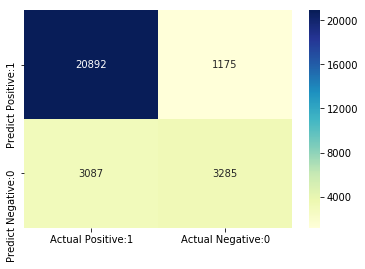

In [114]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## 16. Classification metrices

### Classification Report


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:-

In [115]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22067
         Yes       0.74      0.52      0.61      6372

   micro avg       0.85      0.85      0.85     28439
   macro avg       0.80      0.73      0.76     28439
weighted avg       0.84      0.85      0.84     28439



### Classification accuracy

In [116]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [117]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


Classification accuracy : 0.8501


### Classification error

In [118]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))


Classification error : 0.1499


### Precision


**Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP). 


So, **Precision** identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.



Mathematically, precision can be defined as the ratio of `TP to (TP + FP).`




In [119]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))


Precision : 0.9468


### Recall


Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). **Recall** is also called **Sensitivity**.


**Recall** identifies the proportion of correctly predicted actual positives.


Mathematically, recall can be given as the ratio of `TP to (TP + FN).`





In [120]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8713


### True Positive Rate


**True Positive Rate** is synonymous with **Recall**.


In [121]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8713


### False Positive Rate

In [122]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.2635


### Specificity

In [123]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.7365


### f1-score


**f1-score** is the weighted harmonic mean of precision and recall. The best possible **f1-score** would be 1.0 and the worst 
would be 0.0.  **f1-score** is the harmonic mean of precision and recall. So, **f1-score** is always lower than accuracy measures as they embed precision and recall into their computation. The weighted average of `f1-score` should be used to 
compare classifier models, not global accuracy.



### Support


**Support** is the actual number of occurrences of the class in our dataset.

## 17. Adjusting the threshold level

In [124]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

array([[0.91387232, 0.08612768],
       [0.83563172, 0.16436828],
       [0.82035588, 0.17964412],
       [0.99025882, 0.00974118],
       [0.95726809, 0.04273191],
       [0.97994232, 0.02005768],
       [0.17838588, 0.82161412],
       [0.23482434, 0.76517566],
       [0.90050811, 0.09949189],
       [0.85480088, 0.14519912]])

### Observations


- In each row, the numbers sum to 1.


- There are 2 columns which correspond to 2 classes - 0 and 1.

    - Class 0 - predicted probability that there is no rain tomorrow.    
    
    - Class 1 - predicted probability that there is rain tomorrow.
        
    
- Importance of predicted probabilities

    - We can rank the observations by probability of rain or no rain.


- predict_proba process

    - Predicts the probabilities    
    
    - Choose the class with the highest probability    
    
    
- Classification threshold level

    - There is a classification threshold level of 0.5.    
    
    - Class 1 - probability of rain is predicted if probability > 0.5.    
    
    - Class 0 - probability of no rain is predicted if probability < 0.5.    
    


In [125]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])

y_pred_prob_df

,Prob of - No rain tomorrow (0),Prob of - Rain tomorrow (1)
0,0.913872,0.086128
1,0.835632,0.164368
2,0.820356,0.179644
3,0.990259,0.009741
4,0.957268,0.042732
5,0.979942,0.020058
6,0.178386,0.821614
7,0.234824,0.765176
8,0.900508,0.099492
9,0.854801,0.145199


In [126]:
# print the first 10 predicted probabilities for class 1 - Probability of rain

logreg.predict_proba(X_test)[0:10, 1]

array([0.08612768, 0.16436828, 0.17964412, 0.00974118, 0.04273191,
       0.02005768, 0.82161412, 0.76517566, 0.09949189, 0.14519912])

In [127]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = logreg.predict_proba(X_test)[:, 1]

Text(0,0.5,'Frequency')

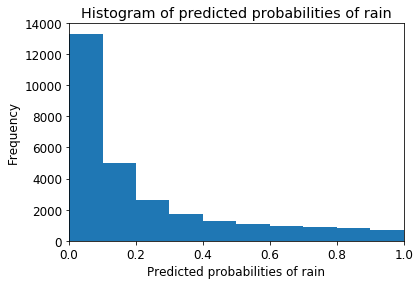

In [128]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of rain')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')

### Observations


- We can see that the above histogram is highly positive skewed.


- The first column tell us that there are approximately 15000 observations with probability between 0.0 and 0.1.


- There are small number of observations with probability > 0.5.


- So, these small number of observations predict that there will be rain tomorrow.


- Majority of observations predict that there will be no rain tomorrow.

### Lower the threshold

In [129]:
from sklearn.preprocessing import binarize

for i in range(1,5):
    
    cm1=0
    
    y_pred1 = logreg.predict_proba(X_test)[:,1]
    
    y_pred1 = y_pred1.reshape(-1,1)
    
    y_pred2 = binarize(y_pred1, i/10)
    
    y_pred2 = np.where(y_pred2 == 1, 'Yes', 'No')
    
    cm1 = confusion_matrix(y_test, y_pred2)
        
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           
            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n', 
           
            cm1[0,1],'Type I errors( False Positives), ','\n\n',
           
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',
           
           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',
           
           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',
          
            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[12726  9341]
 [  547  5825]] 

 with 18551 correct predictions,  

 9341 Type I errors( False Positives),  

 547 Type II errors( False Negatives),  

 Accuracy score:  0.6523084496641935 

 Sensitivity:  0.9141556811048337 

 Specificity:  0.5766982371867494 



With 0.2 threshold the Confusion Matrix is  

 [[17067  5000]
 [ 1233  5139]] 

 with 22206 correct predictions,  

 5000 Type I errors( False Positives),  

 1233 Type II errors( False Negatives),  

 Accuracy score:  0.7808291430781673 

 Sensitivity:  0.806497175141243 

 Specificity:  0.7734173199800607 



With 0.3 threshold the Confusion Matrix is  

 [[19080  2987]
 [ 1873  4499]] 

 with 23579 correct predictions,  

 2987 Type I errors( False Positives),  

 1873 Type II errors( False Negatives),  

 Accuracy score:  0.8291079151868912 

 Sensitivity:  0.7060577526679221 

 Specificity:  0.8646395069560883 



With 0.4 threshold the Confusion Matrix is  

 [[20191  1876

### Comments


- In binary problems, the threshold of 0.5 is used by default to convert predicted probabilities into class predictions.


- Threshold can be adjusted to increase sensitivity or specificity. 


- Sensitivity and specificity have an inverse relationship. Increasing one would always decrease the other and vice versa.


- We can see that increasing the threshold level results in increased accuracy.


- Adjusting the threshold level should be one of the last step you do in the model-building process.

## 18. ROC - AUC



### ROC Curve


Another tool to measure the classification model performance visually is **ROC Curve**. ROC Curve stands for **Receiver Operating Characteristic Curve**. An **ROC Curve** is a plot which shows the performance of a classification model at various 
classification threshold levels. 



The **ROC Curve** plots the **True Positive Rate (TPR)** against the **False Positive Rate (FPR)** at various threshold levels.



**True Positive Rate (TPR)** is also called **Recall**. It is defined as the ratio of `TP to (TP + FN).`



**False Positive Rate (FPR)** is defined as the ratio of `FP to (FP + TN).`







In the ROC Curve, we will focus on the TPR (True Positive Rate) and FPR (False Positive Rate) of a single point. This will give us the general performance of the ROC curve which consists of the TPR and FPR at various threshold levels. So, an ROC Curve plots TPR vs FPR at different classification threshold levels. If we lower the threshold levels, it may result in more items being classified as positve. It will increase both True Positives (TP) and False Positives (FP).






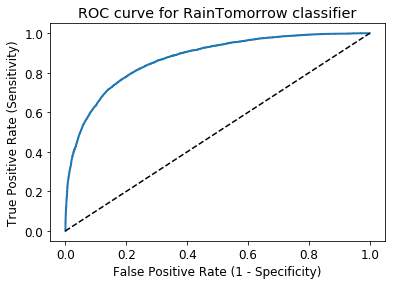

In [130]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()


ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

### ROC  AUC


**ROC AUC** stands for **Receiver Operating Characteristic - Area Under Curve**. It is a technique to compare classifier performance. In this technique, we measure the `area under the curve (AUC)`. A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5. 


So, **ROC AUC** is the percentage of the ROC plot that is underneath the curve.

In [131]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8729


### Comments


- ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

- ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

In [132]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8695


## Model evaluation and improvement



In this section, I will employ several techniques to improve the model performance. I will discuss 3 techniques which are used in practice for performance improvement. These are `recursive feature elimination`, `k-fold cross validation` and `hyperparameter optimization using GridSearchCV`.

## 19. Recursive Feature Elimination with Cross Validation


`Recursive feature elimination (RFE)` is a feature selection technique that helps us to select best features from the given number of features. At first, the model is built on all the given features. Then, it removes the least useful predictor and build the model again. This process is repeated until all the unimportant features are removed from the model.


`Recursive Feature Elimination with Cross-Validated (RFECV) feature selection` technique selects the best subset of features for the estimator by removing 0 to N features iteratively using recursive feature elimination. Then it selects the best subset based on the accuracy or cross-validation score or roc-auc of the model. Recursive feature elimination technique eliminates n features from a model by fitting the model multiple times and at each step, removing the weakest features.


I will use this technique to select best features from this model.

In [133]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator=logreg, step=1, cv=5, scoring='accuracy')

rfecv = rfecv.fit(X_train, y_train)

In [134]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 112


In [135]:
# transform the training data

X_train_rfecv = rfecv.transform(X_train)


# train classifier

logreg.fit(X_train_rfecv, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [136]:
# test classifier on test data

X_test_rfecv = rfecv.transform(X_test)

y_pred_rfecv = logreg.predict(X_test_rfecv)

In [137]:
# print mean accuracy on transformed test data and labels

print ("Classifier score: {:.4f}".format(logreg.score(X_test_rfecv,y_test)))

Classifier score: 0.8500


Our original model accuracy score is 0.8501 whereas accuracy score after RFECV is 0.8500. So, we can obtain approximately similar accuracy but with reduced or optimal set of features.

### Confusion-matrix revisited


I will again plot the confusion-matrix for this model to get an idea of errors our model is making.

In [138]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred_rfecv)

print('Confusion matrix\n\n', cm1)

print('\nTrue Positives(TP1) = ', cm1[0,0])

print('\nTrue Negatives(TN1) = ', cm1[1,1])

print('\nFalse Positives(FP1) = ', cm1[0,1])

print('\nFalse Negatives(FN1) = ', cm1[1,0])

Confusion matrix

 [[20893  1174]
 [ 3091  3281]]

True Positives(TP1) =  20893

True Negatives(TN1) =  3281

False Positives(FP1) =  1174

False Negatives(FN1) =  3091


We can see that in the original model, we have FP = 1175 whereas FP1 = 1174. So, we get approximately same number of false positives. Also, FN = 3087 whereas FN1 = 3091. So, we get slightly higher false negatives.

## 20. k-Fold Cross Validation

In [139]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.84690783 0.84624852 0.84633642 0.84958903 0.84773626]


We can summarize the cross-validation accuracy by calculating its mean.

In [140]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8474


Our, original model score is found to be 0.8476. The average cross-validation score is 0.8474. So, we can conclude that cross-validation does not result in performance improvement.

## 21. Hyperparameter Optimization using GridSearch CV

In [141]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [142]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8474


Parameters that give the best results : 

 {'penalty': 'l1'}


Estimator that was chosen by the search : 

 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)


In [143]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8507


### Comments


- Our original model test accuracy is 0.8501 while GridSearch CV accuracy is 0.8507.


- We can see that GridSearch CV improve the performance for this particular model.

## 22. Results and Conclusion

1.	The logistic regression model accuracy score is 0.8501. So, the model does a very good job in predicting whether or not it will rain tomorrow in Australia.

2.	Small number of observations predict that there will be rain tomorrow. Majority of observations predict that there will be no rain tomorrow.

3.	The model shows no signs of overfitting.

4.	Increasing the value of C results in higher test set accuracy and also a slightly increased training set accuracy. So, we can conclude that a more complex model should perform better.

5.	Increasing the threshold level results in increased accuracy.

6.	ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

7.	Our original model accuracy score is 0.8501 whereas accuracy score after RFECV is 0.8500. So, we can obtain approximately similar accuracy but with reduced set of features.

8.	In the original model, we have FP = 1175 whereas FP1 = 1174. So, we get approximately same number of false positives. Also, FN = 3087 whereas FN1 = 3091. So, we get slighly higher false negatives.

9.	Our, original model score is found to be 0.8476. The average cross-validation score is 0.8474. So, we can conclude that cross-validation does not result in performance improvement.

10.	Our original model test accuracy is 0.8501 while GridSearch CV accuracy is 0.8507. We can see that GridSearch CV improve the performance for this particular model.
